In [30]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib import ticker, cm
import matplotlib.cm as mcm
from matplotlib.ticker import MaxNLocator
jet = mcm.get_cmap('jet') if isinstance(mcm.get_cmap('jet'), str) else mcm.get_cmap('jet')
import netCDF4 as nc
import cartopy.crs as ccrs # CRS stands for "Coordinate reference systems" for map projection
from cartopy.crs import PlateCarree
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter 
import matplotlib.gridspec as gridspec
from scipy import stats
import glob

/tmp/ipykernel_174332/1491763626.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  jet = mcm.get_cmap('jet') if isinstance(mcm.get_cmap('jet'), str) else mcm.get_cmap('jet')


In [31]:
# WACCM_data_alt = '90-150km'
WACCM_UL = 150

# win_Monthfolderstr = 'Dec-Feb'
# win_ds_months = ['12','01','02']

# spr_Monthfolderstr = 'Mar-May'
# spr_ds_months = ['03','04','05']

# sum_Monthfolderstr = 'Jun-Aug'
# sum_ds_months = ['06','07','08']

# aut_Monthfolderstr = 'Sep-Nov'
# aut_ds_months = ['09','10','11']
   

win_file_cli = f'/nobackup/py21cb/es/cli_cha/cli_cha_SpE_Output_Dec-Feb_90-150km_0.25sigma_2xMpza_1xpeak.nc'
spr_file_cli = f'/nobackup/py21cb/es/cli_cha/cli_cha_SpE_Output_Mar-May_90-150km_0.25sigma_2xMpza_1xpeak.nc'
sum_file_cli = f'/nobackup/py21cb/es/cli_cha/cli_cha_SpE_Output_Jun-Aug_90-150km_0.25sigma_2xMpza_1xpeak.nc'
aut_file_cli = f'/nobackup/py21cb/es/cli_cha/cli_cha_SpE_Output_Sep-Nov_90-150km_0.25sigma_2xMpza_1xpeak.nc'

win_file_Smed = f'/resstore/b0243/Data/Sporadic_E/Solar_Med/SpE_Algorithm_Output_yr2000/Wuhu_IonTr_run_SpE_Output_Dec-Feb_90-150km_0.25sigma_2xMpza_1xpeak.nc'
spr_file_Smed = f'/resstore/b0243/Data/Sporadic_E/Solar_Med/SpE_Algorithm_Output_yr2000/Wuhu_IonTr_run_SpE_Output_Mar-May_90-150km_0.25sigma_2xMpza_1xpeak.nc'
sum_file_Smed = f'/resstore/b0243/Data/Sporadic_E/Solar_Med/SpE_Algorithm_Output_yr2000/Wuhu_IonTr_run_SpE_Output_Jun-Aug_90-150km_0.25sigma_2xMpza_1xpeak.nc'
aut_file_Smed = f'/resstore/b0243/Data/Sporadic_E/Solar_Med/SpE_Algorithm_Output_yr2000/Wuhu_IonTr_run_SpE_Output_Sep-Nov_90-150km_0.25sigma_2xMpza_1xpeak.nc'


ds_months_ar = np.arange(0,3)   

ds_win_cli = xr.open_dataset(win_file_cli, decode_times=False)
ds_spr_cli = xr.open_dataset(spr_file_cli, decode_times=False)
ds_sum_cli = xr.open_dataset(sum_file_cli, decode_times=False)
ds_aut_cli = xr.open_dataset(aut_file_cli, decode_times=False)

ds_win_Smed = xr.open_dataset(win_file_Smed, decode_times=False)
ds_spr_Smed = xr.open_dataset(spr_file_Smed, decode_times=False)
ds_sum_Smed = xr.open_dataset(sum_file_Smed, decode_times=False)
ds_aut_Smed = xr.open_dataset(aut_file_Smed, decode_times=False)

ds_spr_cli

<xarray.Dataset>
Dimensions:                    (lev: 126, lev_sl: 23, time: 336, lat: 96,
                                latsl: 36, lon: 144, LT: 48, LT_L: 144,
                                timesl: 2, mth: 3)
Coordinates:
  * lev                        (lev) float64 4.055e-10 5.207e-10 ... 970.6 992.6
  * lev_sl                     (lev_sl) float64 5.418e-06 6.956e-06 ... 0.001329
  * time                       (time) float64 0.0 1.0 2.0 ... 333.0 334.0 335.0
  * lat                        (lat) float64 -90.0 -88.11 -86.21 ... 88.11 90.0
  * latsl                      (latsl) float64 -87.5 -82.5 -77.5 ... 82.5 87.5
  * lon                        (lon) float64 0.0 2.5 5.0 ... 352.5 355.0 357.5
  * LT                         (LT) float64 0.0 0.5 1.0 1.5 ... 22.5 23.0 23.5
  * LT_L                       (LT_L) float64 0.0 0.1667 0.3333 ... 23.67 23.83
  * timesl                     (timesl) float64 0.0 1.0
  * mth                        (mth) float64 3.0 4.0 5.0
Data variables: (12/29)
    Zavg_sl                    (lev_sl) float64 ...
    altavg                     (lev) float64 ...
    altavg_sl                  (lev_sl) float64 ...
    times_str_min              (mth, timesl) object ...
    times_str_max              (mth, timesl) object ...
    SpEsns_Occ_Freq_lat        (lat) float64 ...
    ...                         ...
    Mptdens_nsavg              (lev_sl, lat, lon, timesl, mth) float64 ...
    Mptdens_avv1_b_5d          (lev_sl, latsl, timesl, mth) float64 ...
    Mptdens_std                (lev_sl, lat, LT_L, timesl, mth) float64 ...
    Mptdens_avg                (lev_sl, lat, LT_L, timesl, mth) float64 ...
    SpEs_freq_time             (lev_sl, lat, LT_L, timesl, mth) float64 ...
    SpEsns_freq_time           (lev_sl, lat, lon, timesl, mth) float64 ...

# Climate change varible creation

In [32]:

lev_sl = ds_win_cli.variables['lev_sl']
lat = ds_win_cli.variables['lat']
intlat = ds_win_cli.variables['latsl']
lon = ds_win_cli.variables['lon']
LT = ds_win_cli.variables['LT']

#Zavg_sl = ds_win_cli.variables['Zavg_sl']

altavg_sl_win_cli = ds_win_cli.variables['altavg_sl']
altavg_sl_spr_cli = ds_spr_cli.variables['altavg_sl']
altavg_sl_sum_cli = ds_sum_cli.variables['altavg_sl']
altavg_sl_aut_cli = ds_aut_cli.variables['altavg_sl']

times_str_min_cli = ds_win_cli.variables['times_str_min']
times_str_max_cli = ds_win_cli.variables['times_str_max']

#=====================================================================
# # # W I N T E R # # # 
win_SpEs_Occ_Freq_llbav_cli = ds_win_cli.variables['SpEs_Occ_Freq_llbav']  #lat,LT
win_SpEsns_Occ_Freq_llav_cli = ds_win_cli.variables['SpEsns_Occ_Freq_llav']  #lat,lon
win_SpEsns_Occ_Freq_lat_cli = ds_win_cli.variables['SpEsns_Occ_Freq_lat'] #lat only, avgd over lon

win_SpEsns_Occ_Fr_dsavg_cli = ds_win_cli.variables['SpEsns_Occ_Fr_dsavg']             # LAT - LON at specific height
win_SpEs_Occ_Fr_b_dsavg_cli = ds_win_cli.variables['SpEs_Occ_Fr_b_dsavg']             # LAT - LT at specific height 
win_alt_sl_sh_avg_b_dsavg_cli = ds_win_cli.variables['alt_sl_sh_avg_b_dsavg']
win_alt_sl_sh_avg_b_dsavgg_cli = win_alt_sl_sh_avg_b_dsavg_cli.mean(dim=['lat', 'LT'])

win_SpEs_Occ_Fr_b_dsavgLT_cli = ds_win_cli.variables['SpEs_Occ_Fr_b_dsavgLT']         # LEV - LAT 
win_alt_sl_sh_avg_b_dsavgLT_cli = ds_win_cli.variables['alt_sl_sh_avg_b_dsavgLT']
win_alt_sl_sh_avg_b_dsavgLTT_cli = win_alt_sl_sh_avg_b_dsavgLT_cli.mean(dim=['lat'])

win_SpEs_Occ_Fr_bb_5d_dsavg_cli = ds_win_cli.variables['SpEs_Occ_Fr_bb_5d_dsavg']     # LEV - LT
win_alt_sl_sh_avg_bb_5d_dsavg_cli = ds_win_cli.variables['alt_sl_sh_avg_bb_5d_dsavg']
win_alt_sl_sh_avg_bb_5d_dsavgg_cli = win_alt_sl_sh_avg_bb_5d_dsavg_cli.mean(dim=['LT'])

#=====================================================================
# # # S P R I N G # # # 
spr_SpEs_Occ_Freq_llbav_cli = ds_spr_cli.variables['SpEs_Occ_Freq_llbav']  #lat,LT
spr_SpEsns_Occ_Freq_llav_cli = ds_spr_cli.variables['SpEsns_Occ_Freq_llav']  #lat,lon
spr_SpEsns_Occ_Freq_lat_cli = ds_spr_cli.variables['SpEsns_Occ_Freq_lat'] #lat only, avgd over lon

spr_SpEsns_Occ_Fr_dsavg_cli = ds_spr_cli.variables['SpEsns_Occ_Fr_dsavg']             # LAT - LON at specific height 
spr_SpEs_Occ_Fr_b_dsavg_cli = ds_spr_cli.variables['SpEs_Occ_Fr_b_dsavg']             # LAT - LT at specific height
spr_alt_sl_sh_avg_b_dsavg_cli = ds_spr_cli.variables['alt_sl_sh_avg_b_dsavg']
spr_alt_sl_sh_avg_b_dsavgg_cli = spr_alt_sl_sh_avg_b_dsavg_cli.mean(dim=['lat', 'LT'])

spr_SpEs_Occ_Fr_b_dsavgLT_cli = ds_spr_cli.variables['SpEs_Occ_Fr_b_dsavgLT']         # LEV - LAT 
spr_alt_sl_sh_avg_b_dsavgLT_cli = ds_spr_cli.variables['alt_sl_sh_avg_b_dsavgLT']
spr_alt_sl_sh_avg_b_dsavgLTT_cli = spr_alt_sl_sh_avg_b_dsavgLT_cli.mean(dim=['lat'])

spr_SpEs_Occ_Fr_bb_5d_dsavg_cli = ds_spr_cli.variables['SpEs_Occ_Fr_bb_5d_dsavg']     # LEV - LT 
spr_alt_sl_sh_avg_bb_5d_dsavg_cli = ds_spr_cli.variables['alt_sl_sh_avg_bb_5d_dsavg']
spr_alt_sl_sh_avg_bb_5d_dsavgg_cli = spr_alt_sl_sh_avg_bb_5d_dsavg_cli.mean(dim=['LT'])

#=====================================================================
# # # S U M M E R # # # 
sum_SpEs_Occ_Freq_llbav_cli = ds_sum_cli.variables['SpEs_Occ_Freq_llbav']  #lat,LT
sum_SpEsns_Occ_Freq_llav_cli = ds_sum_cli.variables['SpEsns_Occ_Freq_llav']  #lat,lon
sum_SpEsns_Occ_Freq_lat_cli = ds_sum_cli.variables['SpEsns_Occ_Freq_lat'] #lat only, avgd over lon

sum_SpEsns_Occ_Fr_dsavg_cli = ds_sum_cli.variables['SpEsns_Occ_Fr_dsavg']             # LAT - LON at specific height
sum_SpEs_Occ_Fr_b_dsavg_cli = ds_sum_cli.variables['SpEs_Occ_Fr_b_dsavg']             # LAT - LT at specific height 
sum_alt_sl_sh_avg_b_dsavg_cli = ds_sum_cli.variables['alt_sl_sh_avg_b_dsavg']
sum_alt_sl_sh_avg_b_dsavgg_cli= sum_alt_sl_sh_avg_b_dsavg_cli.mean(dim=['lat', 'LT'])

sum_SpEs_Occ_Fr_b_dsavgLT_cli = ds_sum_cli.variables['SpEs_Occ_Fr_b_dsavgLT']         # LEV - LAT 
sum_alt_sl_sh_avg_b_dsavgLT_cli = ds_sum_cli.variables['alt_sl_sh_avg_b_dsavgLT']
sum_alt_sl_sh_avg_b_dsavgLTT_cli = sum_alt_sl_sh_avg_b_dsavgLT_cli.mean(dim=['lat'])

sum_SpEs_Occ_Fr_bb_5d_dsavg_cli = ds_sum_cli.variables['SpEs_Occ_Fr_bb_5d_dsavg']     # LEV - LT
sum_alt_sl_sh_avg_bb_5d_dsavg_cli = ds_sum_cli.variables['alt_sl_sh_avg_bb_5d_dsavg']
sum_alt_sl_sh_avg_bb_5d_dsavgg_cli = sum_alt_sl_sh_avg_bb_5d_dsavg_cli.mean(dim=['LT'])
                                  
sum_Mptdens_avv1_b_5d_cli = ds_sum_cli.variables['Mptdens_avv1_b_5d']

#=====================================================================
# # # A U T U M N # # # 
aut_SpEs_Occ_Freq_llbav_cli = ds_aut_cli.variables['SpEs_Occ_Freq_llbav']  #lat,LT
aut_SpEsns_Occ_Freq_llav_cli = ds_aut_cli.variables['SpEsns_Occ_Freq_llav']  #lat,lon
aut_SpEsns_Occ_Freq_lat_cli = ds_aut_cli.variables['SpEsns_Occ_Freq_lat'] #lat only, avgd over lon

aut_SpEsns_Occ_Fr_dsavg_cli = ds_aut_cli.variables['SpEsns_Occ_Fr_dsavg']             # LAT - LON at specific height
aut_SpEs_Occ_Fr_b_dsavg_cli = ds_aut_cli.variables['SpEs_Occ_Fr_b_dsavg']             # LAT - LT at specific height 
aut_alt_sl_sh_avg_b_dsavg_cli = ds_aut_cli.variables['alt_sl_sh_avg_b_dsavg']
aut_alt_sl_sh_avg_b_dsavgg_cli = aut_alt_sl_sh_avg_b_dsavg_cli.mean(dim=['lat', 'LT'])

aut_SpEs_Occ_Fr_b_dsavgLT_cli = ds_aut_cli.variables['SpEs_Occ_Fr_b_dsavgLT']         # LEV - LAT 
aut_alt_sl_sh_avg_b_dsavgLT_cli = ds_aut_cli.variables['alt_sl_sh_avg_b_dsavgLT']
aut_alt_sl_sh_avg_b_dsavgLTT_cli = aut_alt_sl_sh_avg_b_dsavgLT_cli.mean(dim=['lat'])

aut_SpEs_Occ_Fr_bb_5d_dsavg_cli = ds_aut_cli.variables['SpEs_Occ_Fr_bb_5d_dsavg']     # LEV - LT
aut_alt_sl_sh_avg_bb_5d_dsavg_cli = ds_aut_cli.variables['alt_sl_sh_avg_bb_5d_dsavg']
aut_alt_sl_sh_avg_bb_5d_dsavgg_cli = aut_alt_sl_sh_avg_bb_5d_dsavg_cli.mean(dim=['LT'])


In [33]:
# No of measurements (alt-lat-LT)

SpEs_freq_time_spr_cli = ds_spr_cli.variables['SpEs_freq_time']       #('lev_sl', 'lat', 'LT_L', 'timesl', 'mth')
SpEsns_freq_time_spr_cli = ds_spr_cli.variables['SpEsns_freq_time']   #('lev_sl', 'lat', 'lon', 'timesl', 'mth')

SpEs_freq_time_sum_cli = ds_sum_cli.variables['SpEs_freq_time']  
SpEsns_freq_time_sum_cli = ds_sum_cli.variables['SpEsns_freq_time'] 

SpEs_freq_time_aut_cli = ds_aut_cli.variables['SpEs_freq_time']  
SpEsns_freq_time_aut_cli = ds_aut_cli.variables['SpEsns_freq_time'] 

SpEs_freq_time_win_cli = ds_win_cli.variables['SpEs_freq_time']  
SpEsns_freq_time_win_cli = ds_win_cli.variables['SpEsns_freq_time'] 

#----------------------------------------

#On alt-lat-(LT) grid 
#No of measurements per month 
SpEs_mth_spr_cli = np.sum(SpEs_freq_time_spr_cli, axis=3)  # sum_cli along the 'timesl' dimension #(19, 96, 144, 3)
SpEs_mth_sum_cli = np.sum(SpEs_freq_time_sum_cli, axis=3)  
SpEs_mth_aut_cli = np.sum(SpEs_freq_time_aut_cli, axis=3)  
SpEs_mth_win_cli = np.sum(SpEs_freq_time_win_cli, axis=3)   
#No of measurements per season
tot_SpEs_spr_cli = np.sum(SpEs_mth_spr_cli, axis=3)  # sum_cli along the 'mth' dimension   #(19, 96, 144)
tot_SpEs_sum_cli = np.sum(SpEs_mth_sum_cli, axis=3)  
tot_SpEs_aut_cli = np.sum(SpEs_mth_aut_cli, axis=3)  
tot_SpEs_win_cli = np.sum(SpEs_mth_win_cli, axis=3)  


#for lat-(LT) plots
SpEs_spr_cli_lat_LT = np.sum(tot_SpEs_spr_cli, axis=0)
SpEs_sum_cli_lat_LT = np.sum(tot_SpEs_sum_cli, axis=0)
SpEs_aut_cli_lat_LT = np.sum(tot_SpEs_aut_cli, axis=0)
SpEs_win_cli_lat_LT = np.sum(tot_SpEs_win_cli, axis=0)

#For alt-lat plots
SpEs_spr_cli_alt_lat = np.sum(tot_SpEs_spr_cli, axis=2)
SpEs_sum_cli_alt_lat = np.sum(tot_SpEs_sum_cli, axis=2)
SpEs_aut_cli_alt_lat = np.sum(tot_SpEs_aut_cli, axis=2)
SpEs_win_cli_alt_lat = np.sum(tot_SpEs_win_cli, axis=2)


In [34]:
# Rebinning number of measurements into 5deg slices
#==================================================

bin_edges_5deg = np.arange(-90, 91, 5)

tot_SpEs_spr_cli_5deg = np.zeros((lev_sl.shape[0], len(bin_edges_5deg) - 1, 144))
tot_SpEs_sum_cli_5deg = np.zeros((lev_sl.shape[0], len(bin_edges_5deg) - 1, 144))
tot_SpEs_aut_cli_5deg = np.zeros((lev_sl.shape[0], len(bin_edges_5deg) - 1, 144))
tot_SpEs_win_cli_5deg = np.zeros((lev_sl.shape[0], len(bin_edges_5deg) - 1, 144))


for i in range(len(bin_edges_5deg) - 1):
    indices_in_bin = np.where((lat >= bin_edges_5deg[i] - 1.89473684) & (lat < bin_edges_5deg[i + 1] + 1.89473684))[0]

    fractional_overlap = np.zeros_like(indices_in_bin, dtype=float)

    for j, idx in enumerate(indices_in_bin):
        bin_start = lat[idx] - 1.89473684 / 2
        bin_end = lat[idx] + 1.89473684 / 2

        overlap_start = max(bin_start, bin_edges_5deg[i])
        overlap_end = min(bin_end, bin_edges_5deg[i + 1])
        
        overlap_length = max(overlap_end - overlap_start, 0)
        bin_length = bin_end - bin_start

        fractional_overlap[j] = overlap_length / bin_length
    if i == 0:
        fractional_overlap[0]=1
    if i == (len(bin_edges_5deg) - 2):
        fractional_overlap[-1]=1

    weighted_counts_spr_cli = tot_SpEs_spr_cli[:, indices_in_bin, :] * fractional_overlap[None, :, None]
    weighted_counts_sum_cli = tot_SpEs_sum_cli[:, indices_in_bin, :] * fractional_overlap[None, :, None]
    weighted_counts_aut_cli = tot_SpEs_aut_cli[:, indices_in_bin, :] * fractional_overlap[None, :, None]
    weighted_counts_win_cli = tot_SpEs_win_cli[:, indices_in_bin, :] * fractional_overlap[None, :, None]

    tot_SpEs_spr_cli_5deg[:, i, :] = np.sum(weighted_counts_spr_cli, axis=1)
    tot_SpEs_sum_cli_5deg[:, i, :] = np.sum(weighted_counts_sum_cli, axis=1)
    tot_SpEs_aut_cli_5deg[:, i, :] = np.sum(weighted_counts_aut_cli, axis=1)
    tot_SpEs_win_cli_5deg[:, i, :] = np.sum(weighted_counts_win_cli, axis=1)
    
original_sum_cli = np.sum(tot_SpEs_spr_cli)
rebinned_sum_cli = np.sum(tot_SpEs_spr_cli_5deg)
print(f"Original sum_cli tot_SpEs_spr_cli: {original_sum_cli}, Rebinned sum_cli: {rebinned_sum_cli}")


Original sum_cli tot_SpEs_spr_cli: <xarray.Variable ()>
array(38553141.), Rebinned sum_cli: 38553141.0


In [35]:
#Define magnetic latitude lines

filename='/resstore/b0243/Data/Sporadic_E/FX2100f19f19mg16NaFeMgiontransport_OUTPUT/hist/FX2100f19f19mg16NaFeMgiontransport.cam.h0.2100-01.nc'
ds_cli = xr.open_dataset(filename)
ALATM_cli = ds_cli.variables['ALATM'] #Magnetic latitude at each geographic coordinate
ALat_cli = ds_cli.variables['lat']
ALon_cli = ds_cli.variables['lon']

# Solar max varible creation

In [36]:

lev_sl = ds_win_Smed.variables['lev_sl']
lat = ds_win_Smed.variables['lat']
intlat = ds_win_Smed.variables['latsl']
lon = ds_win_Smed.variables['lon']
LT = ds_win_Smed.variables['LT']

#Zavg_sl = ds_win_Smed.variables['Zavg_sl']

altavg_sl_win_Smed = ds_win_Smed.variables['altavg_sl']
altavg_sl_spr_Smed = ds_spr_Smed.variables['altavg_sl']
altavg_sl_sum_Smed = ds_sum_Smed.variables['altavg_sl']
altavg_sl_aut_Smed = ds_aut_Smed.variables['altavg_sl']

times_str_min_Smed = ds_win_Smed.variables['times_str_min']
times_str_max_Smed = ds_win_Smed.variables['times_str_max']

#=====================================================================
# # # W I N T E R # # # 
win_SpEs_Occ_Freq_llbav_Smed = ds_win_Smed.variables['SpEs_Occ_Freq_llbav']  #lat,LT
win_SpEsns_Occ_Freq_llav_Smed = ds_win_Smed.variables['SpEsns_Occ_Freq_llav']  #lat,lon
win_SpEsns_Occ_Freq_lat_Smed = ds_win_Smed.variables['SpEsns_Occ_Freq_lat'] #lat only, avgd over lon

win_SpEsns_Occ_Fr_dsavg_Smed = ds_win_Smed.variables['SpEsns_Occ_Fr_dsavg']             # LAT - LON at specific height
win_SpEs_Occ_Fr_b_dsavg_Smed = ds_win_Smed.variables['SpEs_Occ_Fr_b_dsavg']             # LAT - LT at specific height 
win_alt_sl_sh_avg_b_dsavg_Smed = ds_win_Smed.variables['alt_sl_sh_avg_b_dsavg']
win_alt_sl_sh_avg_b_dsavgg_Smed = win_alt_sl_sh_avg_b_dsavg_Smed.mean(dim=['lat', 'LT'])

win_SpEs_Occ_Fr_b_dsavgLT_Smed = ds_win_Smed.variables['SpEs_Occ_Fr_b_dsavgLT']         # LEV - LAT 
win_alt_sl_sh_avg_b_dsavgLT_Smed = ds_win_Smed.variables['alt_sl_sh_avg_b_dsavgLT']
win_alt_sl_sh_avg_b_dsavgLTT_Smed = win_alt_sl_sh_avg_b_dsavgLT_Smed.mean(dim=['lat'])

win_SpEs_Occ_Fr_bb_5d_dsavg_Smed = ds_win_Smed.variables['SpEs_Occ_Fr_bb_5d_dsavg']     # LEV - LT
win_alt_sl_sh_avg_bb_5d_dsavg_Smed = ds_win_Smed.variables['alt_sl_sh_avg_bb_5d_dsavg']
win_alt_sl_sh_avg_bb_5d_dsavgg_Smed = win_alt_sl_sh_avg_bb_5d_dsavg_Smed.mean(dim=['LT'])

#=====================================================================
# # # S P R I N G # # # 
spr_SpEs_Occ_Freq_llbav_Smed = ds_spr_Smed.variables['SpEs_Occ_Freq_llbav']  #lat,LT
spr_SpEsns_Occ_Freq_llav_Smed = ds_spr_Smed.variables['SpEsns_Occ_Freq_llav']  #lat,lon
spr_SpEsns_Occ_Freq_lat_Smed = ds_spr_Smed.variables['SpEsns_Occ_Freq_lat'] #lat only, avgd over lon

spr_SpEsns_Occ_Fr_dsavg_Smed = ds_spr_Smed.variables['SpEsns_Occ_Fr_dsavg']             # LAT - LON at specific height 
spr_SpEs_Occ_Fr_b_dsavg_Smed = ds_spr_Smed.variables['SpEs_Occ_Fr_b_dsavg']             # LAT - LT at specific height
spr_alt_sl_sh_avg_b_dsavg_Smed = ds_spr_Smed.variables['alt_sl_sh_avg_b_dsavg']
spr_alt_sl_sh_avg_b_dsavgg_Smed = spr_alt_sl_sh_avg_b_dsavg_Smed.mean(dim=['lat', 'LT'])

spr_SpEs_Occ_Fr_b_dsavgLT_Smed = ds_spr_Smed.variables['SpEs_Occ_Fr_b_dsavgLT']         # LEV - LAT 
spr_alt_sl_sh_avg_b_dsavgLT_Smed = ds_spr_Smed.variables['alt_sl_sh_avg_b_dsavgLT']
spr_alt_sl_sh_avg_b_dsavgLTT_Smed = spr_alt_sl_sh_avg_b_dsavgLT_Smed.mean(dim=['lat'])

spr_SpEs_Occ_Fr_bb_5d_dsavg_Smed = ds_spr_Smed.variables['SpEs_Occ_Fr_bb_5d_dsavg']     # LEV - LT 
spr_alt_sl_sh_avg_bb_5d_dsavg_Smed = ds_spr_Smed.variables['alt_sl_sh_avg_bb_5d_dsavg']
spr_alt_sl_sh_avg_bb_5d_dsavgg_Smed = spr_alt_sl_sh_avg_bb_5d_dsavg_Smed.mean(dim=['LT'])

#=====================================================================
# # # S U M M E R # # # 
sum_SpEs_Occ_Freq_llbav_Smed = ds_sum_Smed.variables['SpEs_Occ_Freq_llbav']  #lat,LT
sum_SpEsns_Occ_Freq_llav_Smed = ds_sum_Smed.variables['SpEsns_Occ_Freq_llav']  #lat,lon
sum_SpEsns_Occ_Freq_lat_Smed = ds_sum_Smed.variables['SpEsns_Occ_Freq_lat'] #lat only, avgd over lon

sum_SpEsns_Occ_Fr_dsavg_Smed = ds_sum_Smed.variables['SpEsns_Occ_Fr_dsavg']             # LAT - LON at specific height
sum_SpEs_Occ_Fr_b_dsavg_Smed = ds_sum_Smed.variables['SpEs_Occ_Fr_b_dsavg']             # LAT - LT at specific height 
sum_alt_sl_sh_avg_b_dsavg_Smed = ds_sum_Smed.variables['alt_sl_sh_avg_b_dsavg']
sum_alt_sl_sh_avg_b_dsavgg_Smed= sum_alt_sl_sh_avg_b_dsavg_Smed.mean(dim=['lat', 'LT'])

sum_SpEs_Occ_Fr_b_dsavgLT_Smed = ds_sum_Smed.variables['SpEs_Occ_Fr_b_dsavgLT']         # LEV - LAT 
sum_alt_sl_sh_avg_b_dsavgLT_Smed = ds_sum_Smed.variables['alt_sl_sh_avg_b_dsavgLT']
sum_alt_sl_sh_avg_b_dsavgLTT_Smed = sum_alt_sl_sh_avg_b_dsavgLT_Smed.mean(dim=['lat'])

sum_SpEs_Occ_Fr_bb_5d_dsavg_Smed = ds_sum_Smed.variables['SpEs_Occ_Fr_bb_5d_dsavg']     # LEV - LT
sum_alt_sl_sh_avg_bb_5d_dsavg_Smed = ds_sum_Smed.variables['alt_sl_sh_avg_bb_5d_dsavg']
sum_alt_sl_sh_avg_bb_5d_dsavgg_Smed = sum_alt_sl_sh_avg_bb_5d_dsavg_Smed.mean(dim=['LT'])
                                  
sum_Mptdens_avv1_b_5d_Smed = ds_sum_Smed.variables['Mptdens_avv1_b_5d']

#=====================================================================
# # # A U T U M N # # # 
aut_SpEs_Occ_Freq_llbav_Smed = ds_aut_Smed.variables['SpEs_Occ_Freq_llbav']  #lat,LT
aut_SpEsns_Occ_Freq_llav_Smed = ds_aut_Smed.variables['SpEsns_Occ_Freq_llav']  #lat,lon
aut_SpEsns_Occ_Freq_lat_Smed = ds_aut_Smed.variables['SpEsns_Occ_Freq_lat'] #lat only, avgd over lon

aut_SpEsns_Occ_Fr_dsavg_Smed = ds_aut_Smed.variables['SpEsns_Occ_Fr_dsavg']             # LAT - LON at specific height
aut_SpEs_Occ_Fr_b_dsavg_Smed = ds_aut_Smed.variables['SpEs_Occ_Fr_b_dsavg']             # LAT - LT at specific height 
aut_alt_sl_sh_avg_b_dsavg_Smed = ds_aut_Smed.variables['alt_sl_sh_avg_b_dsavg']
aut_alt_sl_sh_avg_b_dsavgg_Smed = aut_alt_sl_sh_avg_b_dsavg_Smed.mean(dim=['lat', 'LT'])

aut_SpEs_Occ_Fr_b_dsavgLT_Smed = ds_aut_Smed.variables['SpEs_Occ_Fr_b_dsavgLT']         # LEV - LAT 
aut_alt_sl_sh_avg_b_dsavgLT_Smed = ds_aut_Smed.variables['alt_sl_sh_avg_b_dsavgLT']
aut_alt_sl_sh_avg_b_dsavgLTT_Smed = aut_alt_sl_sh_avg_b_dsavgLT_Smed.mean(dim=['lat'])

aut_SpEs_Occ_Fr_bb_5d_dsavg_Smed = ds_aut_Smed.variables['SpEs_Occ_Fr_bb_5d_dsavg']     # LEV - LT
aut_alt_sl_sh_avg_bb_5d_dsavg_Smed = ds_aut_Smed.variables['alt_sl_sh_avg_bb_5d_dsavg']
aut_alt_sl_sh_avg_bb_5d_dsavgg_Smed = aut_alt_sl_sh_avg_bb_5d_dsavg_Smed.mean(dim=['LT'])


In [37]:
# No of measurements (alt-lat-LT)

SpEs_freq_time_spr_Smed = ds_spr_Smed.variables['SpEs_freq_time']       #('lev_sl', 'lat', 'LT_L', 'timesl', 'mth')
SpEsns_freq_time_spr_Smed = ds_spr_Smed.variables['SpEsns_freq_time']   #('lev_sl', 'lat', 'lon', 'timesl', 'mth')

SpEs_freq_time_sum_Smed = ds_sum_Smed.variables['SpEs_freq_time']  
SpEsns_freq_time_sum_Smed = ds_sum_Smed.variables['SpEsns_freq_time'] 

SpEs_freq_time_aut_Smed = ds_aut_Smed.variables['SpEs_freq_time']  
SpEsns_freq_time_aut_Smed = ds_aut_Smed.variables['SpEsns_freq_time'] 

SpEs_freq_time_win_Smed = ds_win_Smed.variables['SpEs_freq_time']  
SpEsns_freq_time_win_Smed = ds_win_Smed.variables['SpEsns_freq_time'] 

#----------------------------------------

#On alt-lat-(LT) grid 
#No of measurements per month 
SpEs_mth_spr_Smed = np.sum(SpEs_freq_time_spr_Smed, axis=3)  # sum_Smed along the 'timesl' dimension #(19, 96, 144, 3)
SpEs_mth_sum_Smed = np.sum(SpEs_freq_time_sum_Smed, axis=3)  
SpEs_mth_aut_Smed = np.sum(SpEs_freq_time_aut_Smed, axis=3)  
SpEs_mth_win_Smed = np.sum(SpEs_freq_time_win_Smed, axis=3)   
#No of measurements per season
tot_SpEs_spr_Smed = np.sum(SpEs_mth_spr_Smed, axis=3)  # sum_Smed along the 'mth' dimension   #(19, 96, 144)
tot_SpEs_sum_Smed = np.sum(SpEs_mth_sum_Smed, axis=3)  
tot_SpEs_aut_Smed = np.sum(SpEs_mth_aut_Smed, axis=3)  
tot_SpEs_win_Smed = np.sum(SpEs_mth_win_Smed, axis=3)  


#for lat-(LT) plots
SpEs_spr_Smed_lat_LT = np.sum(tot_SpEs_spr_Smed, axis=0)
SpEs_sum_Smed_lat_LT = np.sum(tot_SpEs_sum_Smed, axis=0)
SpEs_aut_Smed_lat_LT = np.sum(tot_SpEs_aut_Smed, axis=0)
SpEs_win_Smed_lat_LT = np.sum(tot_SpEs_win_Smed, axis=0)

#For alt-lat plots
SpEs_spr_Smed_alt_lat = np.sum(tot_SpEs_spr_Smed, axis=2)
SpEs_sum_Smed_alt_lat = np.sum(tot_SpEs_sum_Smed, axis=2)
SpEs_aut_Smed_alt_lat = np.sum(tot_SpEs_aut_Smed, axis=2)
SpEs_win_Smed_alt_lat = np.sum(tot_SpEs_win_Smed, axis=2)


In [38]:
# Rebinning number of measurements into 5deg slices
#==================================================

bin_edges_5deg = np.arange(-90, 91, 5)

tot_SpEs_spr_Smed_5deg = np.zeros((lev_sl.shape[0], len(bin_edges_5deg) - 1, 144))
tot_SpEs_sum_Smed_5deg = np.zeros((lev_sl.shape[0], len(bin_edges_5deg) - 1, 144))
tot_SpEs_aut_Smed_5deg = np.zeros((lev_sl.shape[0], len(bin_edges_5deg) - 1, 144))
tot_SpEs_win_Smed_5deg = np.zeros((lev_sl.shape[0], len(bin_edges_5deg) - 1, 144))


for i in range(len(bin_edges_5deg) - 1):
    indices_in_bin = np.where((lat >= bin_edges_5deg[i] - 1.89473684) & (lat < bin_edges_5deg[i + 1] + 1.89473684))[0]

    fractional_overlap = np.zeros_like(indices_in_bin, dtype=float)

    for j, idx in enumerate(indices_in_bin):
        bin_start = lat[idx] - 1.89473684 / 2
        bin_end = lat[idx] + 1.89473684 / 2

        overlap_start = max(bin_start, bin_edges_5deg[i])
        overlap_end = min(bin_end, bin_edges_5deg[i + 1])
        
        overlap_length = max(overlap_end - overlap_start, 0)
        bin_length = bin_end - bin_start

        fractional_overlap[j] = overlap_length / bin_length
    if i == 0:
        fractional_overlap[0]=1
    if i == (len(bin_edges_5deg) - 2):
        fractional_overlap[-1]=1

    weighted_counts_spr_Smed = tot_SpEs_spr_Smed[:, indices_in_bin, :] * fractional_overlap[None, :, None]
    weighted_counts_sum_Smed = tot_SpEs_sum_Smed[:, indices_in_bin, :] * fractional_overlap[None, :, None]
    weighted_counts_aut_Smed = tot_SpEs_aut_Smed[:, indices_in_bin, :] * fractional_overlap[None, :, None]
    weighted_counts_win_Smed = tot_SpEs_win_Smed[:, indices_in_bin, :] * fractional_overlap[None, :, None]

    tot_SpEs_spr_Smed_5deg[:, i, :] = np.sum(weighted_counts_spr_Smed, axis=1)
    tot_SpEs_sum_Smed_5deg[:, i, :] = np.sum(weighted_counts_sum_Smed, axis=1)
    tot_SpEs_aut_Smed_5deg[:, i, :] = np.sum(weighted_counts_aut_Smed, axis=1)
    tot_SpEs_win_Smed_5deg[:, i, :] = np.sum(weighted_counts_win_Smed, axis=1)
    
original_sum_Smed = np.sum(tot_SpEs_spr_Smed)
rebinned_sum_Smed = np.sum(tot_SpEs_spr_Smed_5deg)
print(f"Original sum_Smed tot_SpEs_spr_Smed: {original_sum_Smed}, Rebinned sum_Smed: {rebinned_sum_Smed}")


Original sum_Smed tot_SpEs_spr_Smed: <xarray.Variable ()>
array(36579523.), Rebinned sum_Smed: 36579523.0


In [39]:
#Define magnetic latitude lines

filename='/resstore/b0243/Data/Sporadic_E/Solar_Med/archive_yr2000/ACP_CESM213_FX2000_f19_f19_mg16_Na_Fe_Mg_iontransport.cam.h0.0001-01.nc'
ds_Smed = xr.open_dataset(filename)
ALATM_Smed = ds_Smed.variables['ALATM'] #Magnetic latitude at each geographic coordinate
ALat_Smed = ds_Smed.variables['lat']
ALon_Smed = ds_Smed.variables['lon']

# Altitude weighted function

In [40]:
def wt_avg_alt(input_var, alt):
    """
    Compute weighted average over the altitude dimension of the input variable.

    Parameters:
    - input_var: Input data with dimensions e.g. (altitude, lat, LT) or (altitude, lat, lon).
    - alt: Array of altitudes with same dimensions

    Returns:
    - Weighted average result over the altitude dimension.
    """

    # Check if both input_var and alt have 3 dimensions
    if input_var.ndim != 3 or alt.ndim != 3:
        print("Error: Both input_var and alt should have 3 dimensions in total.")
        return None
    
    alt_shape = input_var.shape[0]
    lat_shape = input_var.shape[1]
    dim3_shape = input_var.shape[2]
    
    dz_tot = 0.
    var_mean_dz_tot = 0.
    
    for i in range(lat_shape):
        for j in range(dim3_shape):
            for z in range(alt_shape-1):
                # Process data for the (altitude, lat, LT) case
                alt2 = alt[z] #Upper altitude
                alt1 = alt[z+1] #Lower altitude
                dz = alt2 - alt1  
                dz_tot += dz

                var2 = input_var[z] #Value at upper level
                var1 = input_var[z+1] #Value at lower level

                #Calculate avg value at interfaces, and multiply by weight
                var_mean_dz = dz*0.5*(var1+var2)
                #Sum up 
                var_mean_dz_tot += var_mean_dz
            #Calculate final mean
            z_wt_mean = var_mean_dz_tot / dz_tot

    return z_wt_mean


# Five degree bin switch

In [41]:
fivedegbins = 0

# Lat - Lon -> Lat - LT conversion

In [42]:
#Lat-LT Plots
timeplot = np.linspace(0, 24, 49)
timeconv_plot_ticks = np.arange(0,25, dtype=float)

# Climate change detection criteria plot 

In [43]:
lev_sl_cli = ds_sum_cli.variables['lev_sl']
lat_cli = ds_sum_cli.variables['lat']
intlat_cli = ds_sum_cli.variables['latsl']
lon_cli = ds_sum_cli.variables['lon']
LT_cli = ds_sum_cli.variables['LT']
LT_L_cli = ds_sum_cli.variables['LT_L']

Zavg_sl_cli = ds_sum_cli.variables['Zavg_sl']
times_str_min_cli = ds_sum_cli.variables['times_str_min']
times_str_max_cli = ds_sum_cli.variables['times_str_max']

SpEs_cli = ds_sum_cli['SpEs'] #(19, 336, 96, 144, 2, 3)
Mptdens_sh_cli = ds_sum_cli['Mptdens_sh']

SpEsns_cli = ds_sum_cli['SpEsns']
Mptdensns_cli = ds_sum_cli['Mptdensns']

Mptdens_nsavg_cli = ds_sum_cli['Mptdens_nsavg'] #'lev_sl', 'lat', 'lon', 'timesl', 'mth'
Mptdens_nsstd_cli = ds_sum_cli['Mptdens_nsstd'] #('lev_sl', 'lat', 'lon', 'timesl', 'mth')
Mptdens_nsdiff_cli = ds_sum_cli['Mptdens_nsdiff'] #('lev_sl', 'time', 'lat', 'lon', 'timesl', 'mth')

#Locations
Mptdens_nsavg_sl_cli = Mptdens_nsavg_cli[:,:,:,0,0]
Mptdens_nsavg_sel1_cli = Mptdens_nsavg_sl_cli.sel(lat=12.5, lon=307.5, method='nearest')
Mptdens_nsavg_sel2_cli = Mptdens_nsavg_sl_cli.sel(lat=48.5, lon=45.0, method='nearest')
Mptdens_nsavg_sel3_cli = Mptdens_nsavg_sl_cli.sel(lat=-77.5, lon=150.0, method='nearest')


Mptdensns_sl_cli = Mptdensns_cli[:,7,:,:,0,0] #Choose UT & first timeslice
Mptdensns_sel1_cli = Mptdensns_sl_cli.sel(lat=12.5, lon=307.5, method='nearest')
Mptdensns_sel2_cli = Mptdensns_sl_cli.sel(lat=48.5, lon=45.0, method='nearest')

Mptdensns_sel3_cli = Mptdensns_cli[:,0,:,:,0,0].sel(lat=-77.5, lon=150.0, method='nearest')


Mptdens_nsstd_sl_cli = Mptdens_nsstd_cli[:,:,:,0,0] #select first timeslice
Mptdens_nsstd_sel1_cli = Mptdens_nsstd_sl_cli.sel(lat=12.5, lon=307.5, method='nearest')  
Mptdens_nsstd_sel2_cli = Mptdens_nsstd_sl_cli.sel(lat=48.5, lon=45.0, method='nearest')
Mptdens_nsstd_sel3_cli = Mptdens_nsstd_sl_cli.sel(lat=-77.5, lon=150.0, method='nearest')


Mptdens_nsdiff_sl_cli = Mptdens_nsdiff_cli[:,7,:,:,0,0] #Choose UT      #->('lev_sl', 'lat', 'lon')
Mptdens_nsdiff_sel1_cli = Mptdens_nsdiff_sl_cli.sel(lat=12.5, lon=307.5, method='nearest')
Mptdens_nsdiff_sel2_cli = Mptdens_nsdiff_sl_cli.sel(lat=48.5, lon=45.0, method='nearest')

Mptdens_nsdiff_sel3_cli = Mptdens_nsdiff_cli[:,0,:,:,0,0].sel(lat=-77.5, lon=150.0, method='nearest')

In [44]:
#zonal averages

#-75-80' location
ind = 2
intlat_sel3_cli = intlat_cli[ind]
print(intlat_sel3_cli.values)
alt_sel3_cli = sum_alt_sl_sh_avg_bb_5d_dsavgg_cli[:,ind]
Mptdens_sel3_cli = sum_Mptdens_avv1_b_5d_cli[:,ind,0,0]


#10-15' location
ind = 20
intlat_sel1_cli = intlat_cli[ind]
print(intlat_sel1_cli.values)
alt_sel1_cli = sum_alt_sl_sh_avg_bb_5d_dsavgg_cli[:,ind]
Mptdens_sel1_cli = sum_Mptdens_avv1_b_5d_cli[:,ind,0,0]


#45-50' location
ind = 27
intlat_sel2_cli = intlat_cli[ind]
print(intlat_sel2_cli.values)
alt_sel2_cli = sum_alt_sl_sh_avg_bb_5d_dsavgg_cli[:,ind]
Mptdens_sel2_cli = sum_Mptdens_avv1_b_5d_cli[:,ind,0,0]


-77.5
12.5
47.5


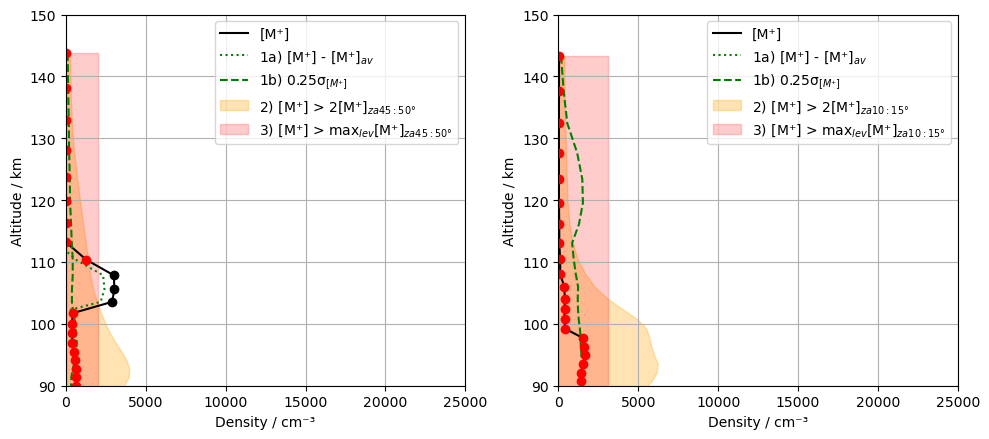

In [45]:

# Plotting code for the first subplot, 45-50' location 
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4.5))

# First subplot ==============================================================================

axes[0].plot(Mptdensns_sel2_cli, alt_sel2_cli, label='[M\u207A]', color='black')

axes[0].plot((Mptdensns_sel2_cli-Mptdens_nsavg_sel2_cli), alt_sel2_cli, color='green', linestyle='dotted', label='1a) [M\u207A] - [M\u207A]$_{av}$')

axes[0].plot(0.25*Mptdens_nsstd_sel2_cli, alt_sel2_cli, color='green', linestyle='dashed', label='1b) 0.25\u03C3$_{[M\u207A]}$')


axes[0].set_ylim(90, WACCM_UL)
axes[0].set_xlim(0, 25000)

# Shading under the line 3 * Mptdens_sel
axes[0].fill_betweenx(alt_sel2_cli, 0, 2 * Mptdens_sel2_cli, color='orange', alpha=0.3, label=f'2) [M\u207A] > 2[M\u207A]$_{{za {int(intlat_sel2_cli.values-2.5)}:{int(intlat_sel2_cli.values+2.5)}\u00B0}}$')

# Calculate maximum of Mptdens_sel over altitude
max_Mptdens_sel_cli = np.max(Mptdens_sel2_cli)

# Add a vertical line at the maximum value
axes[0].fill_betweenx(alt_sel2_cli, 0, max_Mptdens_sel_cli, color='red', alpha=0.2, label=f'3) [M\u207A] > max$_{{lev}}$[M\u207A]$_{{za {int(intlat_sel2_cli.values-2.5)}:{int(intlat_sel2_cli.values+2.5)}\u00B0}}$')

for i in range(len(alt_sel2_cli) - 1):
    if Mptdens_nsdiff_sel2_cli[i] < 0.25*Mptdens_nsstd_sel2_cli[i] or Mptdensns_sel2_cli[i] < max_Mptdens_sel_cli or Mptdensns_sel2_cli[i] < 2 * Mptdens_sel2_cli[i]:
        axes[0].plot(Mptdensns_sel2_cli[i], alt_sel2_cli[i], 'ro')  # Plot red circles
    else:
        axes[0].plot(Mptdensns_sel2_cli[i], alt_sel2_cli[i], 'ko')  # Plot black circles

axes[0].set_xlabel('Density / cm\u207B\u00B3')  
axes[0].set_ylabel('Altitude / km')
axes[0].legend()
axes[0].grid(True)

# Second subplot, 10-15' location =============================================================================

axes[1].plot(Mptdensns_sel1_cli, alt_sel1_cli, label='[M\u207A]', color='black')
axes[1].plot((Mptdensns_sel1_cli-Mptdens_nsavg_sel1_cli), alt_sel1_cli, color='green', linestyle='dotted', label='1a) [M\u207A] - [M\u207A]$_{av}$')

axes[1].plot(0.25*Mptdens_nsstd_sel1_cli, alt_sel1_cli, color='green', linestyle='dashed', label='1b) 0.25\u03C3$_{[M\u207A]}$')

axes[1].set_ylim(90, WACCM_UL)
axes[1].set_xlim(0, 25000)

# Shading under the line 3 * Mptdens_sel
axes[1].fill_betweenx(alt_sel1_cli, 0, 2 * Mptdens_sel1_cli, color='orange', alpha=0.3, label=f'2) [M\u207A] > 2[M\u207A]$_{{za {int(intlat_sel1_cli.values-2.5)}:{int(intlat_sel1_cli.values+2.5)}\u00B0}}$')

# Calculate maximum of Mptdens_sel over altitude
max_Mptdens_sel_cli = np.max(Mptdens_sel1_cli)

# Add a vertical line at the maximum value
axes[1].fill_betweenx(alt_sel1_cli, 0, max_Mptdens_sel_cli, color='red', alpha=0.2, label=f'3) [M\u207A] > max$_{{lev}}$[M\u207A]$_{{za {int(intlat_sel1_cli.values-2.5)}:{int(intlat_sel1_cli.values+2.5)}\u00B0}}$')

for i in range(len(alt_sel1_cli) - 1):
    if Mptdens_nsdiff_sel1_cli[i] < 0.25*Mptdens_nsstd_sel1_cli[i] or Mptdensns_sel1_cli[i] < max_Mptdens_sel_cli or Mptdensns_sel1_cli[i] < 2 * Mptdens_sel1_cli[i]:
        axes[1].plot(Mptdensns_sel1_cli[i], alt_sel1_cli[i], 'ro')  # Plot red circles
    else:
        axes[1].plot(Mptdensns_sel1_cli[i], alt_sel1_cli[i], 'ko')  # Plot black circles

axes[1].set_xlabel('Density / cm\u207B\u00B3')  
axes[1].set_ylabel('Altitude / km')

axes[1].legend()
axes[1].grid(True)


# ============================================================================================
plt.tight_layout()

figname = f'Climate_Change_Criteria_eg_Lat_{int(intlat_sel2_cli.values-2.5)}-{int(intlat_sel2_cli.values+2.5)}_and_{int(intlat_sel1_cli.values-2.5)}-{int(intlat_sel1_cli.values+2.5)}.png'
plt.savefig(f'Comparison_figs/' + str(figname), dpi=400, bbox_inches='tight')

plt.show()

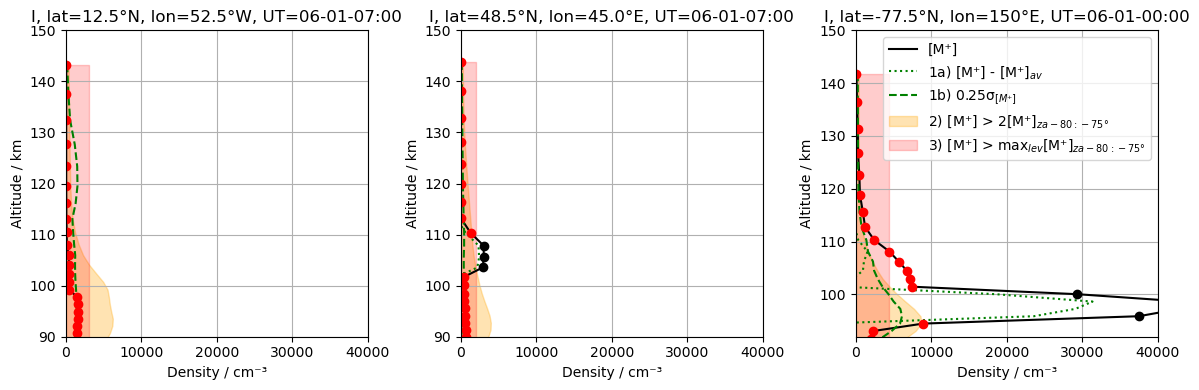

In [46]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

# First subplot ==============================================================================

axes[1].plot(Mptdensns_sel2_cli, alt_sel2_cli, label='[M\u207A]', color='black')
axes[1].plot((Mptdensns_sel2_cli - Mptdens_nsavg_sel2_cli), alt_sel2_cli, color='green', linestyle='dotted', label='1a) [M\u207A] - [M\u207A]$_{av}$')
axes[1].plot(0.25 * Mptdens_nsstd_sel2_cli, alt_sel2_cli, color='green', linestyle='dashed', label='1b) 0.25\u03C3$_{[M\u207A]}$')

axes[1].set_ylim(90, WACCM_UL)
axes[1].set_xlim(0, 40000)

# Shading under the line 3 * Mptdens_sel
axes[1].fill_betweenx(alt_sel2_cli, 0, 2 * Mptdens_sel2_cli, color='orange', alpha=0.3, label=f'2) [M\u207A] > 2[M\u207A]$_{{za {int(intlat_sel2_cli.values - 2.5)}:{int(intlat_sel2_cli.values + 2.5)}\u00B0}}$')

# Calculate maximum of Mptdens_sel over altitude
max_Mptdens_sel_cli = np.max(Mptdens_sel2_cli)

# Add a vertical line at the maximum value
axes[1].fill_betweenx(alt_sel2_cli, 0, max_Mptdens_sel_cli, color='red', alpha=0.2, label=f'3) [M\u207A] > max$_{{lev}}$[M\u207A]$_{{za {int(intlat_sel2_cli.values - 2.5)}:{int(intlat_sel2_cli.values + 2.5)}\u00B0}}$')

for i in range(len(alt_sel2_cli) - 1):
    if Mptdens_nsdiff_sel2_cli[i] < 0.25 * Mptdens_nsstd_sel2_cli[i] or Mptdensns_sel2_cli[i] < max_Mptdens_sel_cli or Mptdensns_sel2_cli[i] < 2 * Mptdens_sel2_cli[i]:
        axes[1].plot(Mptdensns_sel2_cli[i], alt_sel2_cli[i], 'ro')  # Plot red circles
    else:
        axes[1].plot(Mptdensns_sel2_cli[i], alt_sel2_cli[i], 'ko')  # Plot black circles

axes[1].set_xlabel('Density / cm\u207B\u00B3')
axes[1].set_ylabel('Altitude / km')
axes[1].grid(True)
axes[1].set_title('I, lat=48.5\u00b0N, lon=45.0\u00b0E, UT=06-01-07:00')

# Second subplot =============================================================================

axes[0].plot(Mptdensns_sel1_cli, alt_sel1_cli, label='[M\u207A]', color='black')
axes[0].plot((Mptdensns_sel1_cli - Mptdens_nsavg_sel1_cli), alt_sel1_cli, color='green', linestyle='dotted', label='1a) [M\u207A] - [M\u207A]$_{av}$')
axes[0].plot(0.25 * Mptdens_nsstd_sel1_cli, alt_sel1_cli, color='green', linestyle='dashed', label='1b) 0.25\u03C3$_{[M\u207A]}$')

axes[0].set_ylim(90, WACCM_UL)
axes[0].set_xlim(0, 40000)

# Shading under the line 3 * Mptdens_sel
axes[0].fill_betweenx(alt_sel1_cli, 0, 2 * Mptdens_sel1_cli, color='orange', alpha=0.3, label=f'2) [M\u207A] > 2[M\u207A]$_{{za {int(intlat_sel1_cli.values - 2.5)}:{int(intlat_sel1_cli.values + 2.5)}\u00B0}}$')

# Calculate maximum of Mptdens_sel over altitude
max_Mptdens_sel_cli = np.max(Mptdens_sel1_cli)

# Add a vertical line at the maximum value
axes[0].fill_betweenx(alt_sel1_cli, 0, max_Mptdens_sel_cli, color='red', alpha=0.2, label=f'3) [M\u207A] > max$_{{lev}}$[M\u207A]$_{{za {int(intlat_sel1_cli.values - 2.5)}:{int(intlat_sel1_cli.values + 2.5)}\u00B0}}$')

for i in range(len(alt_sel1_cli) - 1):
    if Mptdens_nsdiff_sel1_cli[i] < 0.25 * Mptdens_nsstd_sel1_cli[i] or Mptdensns_sel1_cli[i] < max_Mptdens_sel_cli or Mptdensns_sel1_cli[i] < 2 * Mptdens_sel1_cli[i]:
        axes[0].plot(Mptdensns_sel1_cli[i], alt_sel1_cli[i], 'ro')  # Plot red circles
    else:
        axes[0].plot(Mptdensns_sel1_cli[i], alt_sel1_cli[i], 'ko')  # Plot black circles

axes[0].set_xlabel('Density / cm\u207B\u00B3')
axes[0].set_ylabel('Altitude / km')
axes[0].grid(True)
axes[0].set_title('I, lat=12.5\u00b0N, lon=52.5\u00b0W, UT=06-01-07:00')

# Third subplot =============================================================================

axes[2].plot(Mptdensns_sel3_cli, alt_sel3_cli, label='[M\u207A]', color='black')
axes[2].plot((Mptdensns_sel3_cli - Mptdens_nsavg_sel3_cli), alt_sel3_cli, color='green', linestyle='dotted', label='1a) [M\u207A] - [M\u207A]$_{av}$')
axes[2].plot(0.25 * Mptdens_nsstd_sel3_cli, alt_sel3_cli, color='green', linestyle='dashed', label='1b) 0.25\u03C3$_{[M\u207A]}$')

axes[2].set_ylim(92, WACCM_UL)
axes[2].set_xlim(0, 40000)

# Shading under the line 3 * Mptdens_sel
axes[2].fill_betweenx(alt_sel3_cli, 0, 2 * Mptdens_sel3_cli, color='orange', alpha=0.3, label=f'2) [M\u207A] > 2[M\u207A]$_{{za {int(intlat_sel3_cli.values - 2.5)}:{int(intlat_sel3_cli.values + 2.5)}\u00B0}}$')

# Calculate maximum of Mptdens_sel over altitude
max_Mptdens_sel_cli = np.max(Mptdens_sel3_cli)

# Add a vertical line at the maximum value
axes[2].fill_betweenx(alt_sel3_cli, 0, max_Mptdens_sel_cli, color='red', alpha=0.2, label=f'3) [M\u207A] > max$_{{lev}}$[M\u207A]$_{{za {int(intlat_sel3_cli.values - 2.5)}:{int(intlat_sel3_cli.values + 2.5)}\u00B0}}$')

for i in range(len(alt_sel3_cli) - 1):
    if Mptdens_nsdiff_sel3_cli[i] < 0.25 * Mptdens_nsstd_sel3_cli[i] or Mptdensns_sel3_cli[i] < max_Mptdens_sel_cli or Mptdensns_sel3_cli[i] < 2 * Mptdens_sel3_cli[i]:
        axes[2].plot(Mptdensns_sel3_cli[i], alt_sel3_cli[i], 'ro')  # Plot red circles
    else:
        axes[2].plot(Mptdensns_sel3_cli[i], alt_sel3_cli[i], 'ko')  # Plot black circles

axes[2].set_xlabel('Density / cm\u207B\u00B3')
axes[2].set_ylabel('Altitude / km')
axes[2].legend()
axes[2].grid(True)
axes[2].set_title('I, lat=-77.5\u00b0N, lon=150\u00b0E, UT=06-01-00:00')
# ============================================================================================
plt.tight_layout()

figname = f'Climate_Change_Criteria_eg_Lat_{int(intlat_sel2_cli.values - 2.5)}-{int(intlat_sel2_cli.values + 2.5)}_and_{int(intlat_sel1_cli.values - 2.5)}-{int(intlat_sel1_cli.values + 2.5)}_and_{int(intlat_sel3_cli.values - 2.5)}-{int(intlat_sel3_cli.values + 2.5)}.png'
plt.savefig(f'Comparison_figs/' + str(figname), dpi=400, bbox_inches='tight')

plt.show()


# Solar max detection criteria plot 

In [47]:
lev_sl_Smed = ds_sum_Smed.variables['lev_sl']
lat_Smed = ds_sum_Smed.variables['lat']
intlat_Smed = ds_sum_Smed.variables['latsl']
lon_Smed = ds_sum_Smed.variables['lon']
LT_Smed = ds_sum_Smed.variables['LT']
LT_L_Smed = ds_sum_Smed.variables['LT_L']

Zavg_sl_Smed = ds_sum_Smed.variables['Zavg_sl']
times_str_min_Smed = ds_sum_Smed.variables['times_str_min']
times_str_max_Smed = ds_sum_Smed.variables['times_str_max']

SpEs_Smed = ds_sum_Smed['SpEs'] #(19, 336, 96, 144, 2, 3)
Mptdens_sh_Smed = ds_sum_Smed['Mptdens_sh']

SpEsns_Smed = ds_sum_Smed['SpEsns']
Mptdensns_Smed = ds_sum_Smed['Mptdensns']

Mptdens_nsavg_Smed = ds_sum_Smed['Mptdens_nsavg'] #'lev_sl', 'lat', 'lon', 'timesl', 'mth'
Mptdens_nsstd_Smed = ds_sum_Smed['Mptdens_nsstd'] #('lev_sl', 'lat', 'lon', 'timesl', 'mth')
Mptdens_nsdiff_Smed = ds_sum_Smed['Mptdens_nsdiff'] #('lev_sl', 'time', 'lat', 'lon', 'timesl', 'mth')

#Locations
Mptdens_nsavg_sl_Smed = Mptdens_nsavg_Smed[:,:,:,0,0]
Mptdens_nsavg_sel1_Smed = Mptdens_nsavg_sl_Smed.sel(lat=12.5, lon=307.5, method='nearest')
Mptdens_nsavg_sel2_Smed = Mptdens_nsavg_sl_Smed.sel(lat=48.5, lon=45.0, method='nearest')
Mptdens_nsavg_sel3_Smed = Mptdens_nsavg_sl_Smed.sel(lat=-77.5, lon=150.0, method='nearest')


Mptdensns_sl_Smed = Mptdensns_Smed[:,7,:,:,0,0] #Choose UT & first timeslice
Mptdensns_sel1_Smed = Mptdensns_sl_Smed.sel(lat=12.5, lon=307.5, method='nearest')
Mptdensns_sel2_Smed = Mptdensns_sl_Smed.sel(lat=48.5, lon=45.0, method='nearest')

Mptdensns_sel3_Smed = Mptdensns_Smed[:,0,:,:,0,0].sel(lat=-77.5, lon=150.0, method='nearest')


Mptdens_nsstd_sl_Smed = Mptdens_nsstd_Smed[:,:,:,0,0] #select first timeslice
Mptdens_nsstd_sel1_Smed = Mptdens_nsstd_sl_Smed.sel(lat=12.5, lon=307.5, method='nearest')  
Mptdens_nsstd_sel2_Smed = Mptdens_nsstd_sl_Smed.sel(lat=48.5, lon=45.0, method='nearest')
Mptdens_nsstd_sel3_Smed = Mptdens_nsstd_sl_Smed.sel(lat=-77.5, lon=150.0, method='nearest')


Mptdens_nsdiff_sl_Smed = Mptdens_nsdiff_Smed[:,7,:,:,0,0] #Choose UT      #->('lev_sl', 'lat', 'lon')
Mptdens_nsdiff_sel1_Smed = Mptdens_nsdiff_sl_Smed.sel(lat=12.5, lon=307.5, method='nearest')
Mptdens_nsdiff_sel2_Smed = Mptdens_nsdiff_sl_Smed.sel(lat=48.5, lon=45.0, method='nearest')

Mptdens_nsdiff_sel3_Smed = Mptdens_nsdiff_Smed[:,0,:,:,0,0].sel(lat=-77.5, lon=150.0, method='nearest')

In [48]:
#zonal averages

#-75-80' location
ind = 2
intlat_sel3_Smed = intlat_Smed[ind]
print(intlat_sel3_Smed.values)
alt_sel3_Smed = sum_alt_sl_sh_avg_bb_5d_dsavgg_Smed[:,ind]
Mptdens_sel3_Smed = sum_Mptdens_avv1_b_5d_Smed[:,ind,0,0]


#10-15' location
ind = 20
intlat_sel1_Smed = intlat_Smed[ind]
print(intlat_sel1_Smed.values)
alt_sel1_Smed = sum_alt_sl_sh_avg_bb_5d_dsavgg_Smed[:,ind]
Mptdens_sel1_Smed = sum_Mptdens_avv1_b_5d_Smed[:,ind,0,0]


#45-50' location
ind = 27
intlat_sel2_Smed = intlat_Smed[ind]
print(intlat_sel2_Smed.values)
alt_sel2_Smed = sum_alt_sl_sh_avg_bb_5d_dsavgg_Smed[:,ind]
Mptdens_sel2_Smed = sum_Mptdens_avv1_b_5d_Smed[:,ind,0,0]


-77.5
12.5
47.5


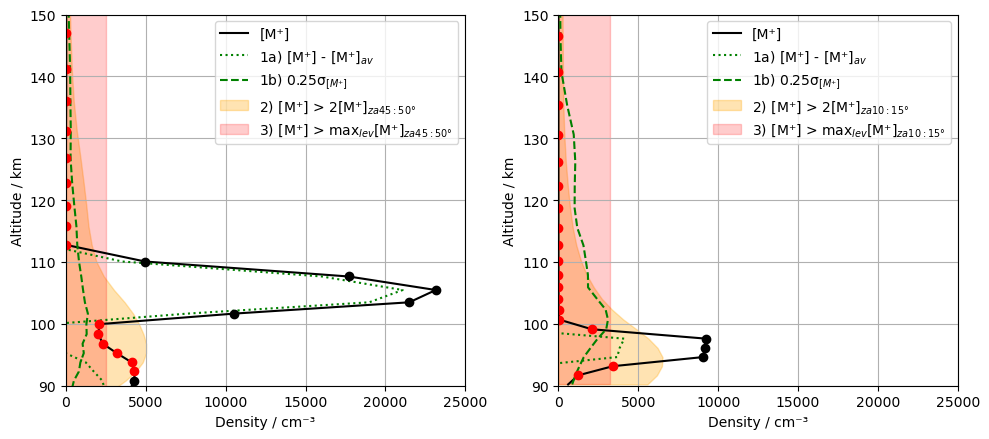

In [49]:

# Plotting code for the first subplot, 45-50' location 
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4.5))

# First subplot ==============================================================================

axes[0].plot(Mptdensns_sel2_Smed, alt_sel2_Smed, label='[M\u207A]', color='black')

axes[0].plot((Mptdensns_sel2_Smed-Mptdens_nsavg_sel2_Smed), alt_sel2_Smed, color='green', linestyle='dotted', label='1a) [M\u207A] - [M\u207A]$_{av}$')

axes[0].plot(0.25*Mptdens_nsstd_sel2_Smed, alt_sel2_Smed, color='green', linestyle='dashed', label='1b) 0.25\u03C3$_{[M\u207A]}$')


axes[0].set_ylim(90, WACCM_UL)
axes[0].set_xlim(0, 25000)

# Shading under the line 3 * Mptdens_sel
axes[0].fill_betweenx(alt_sel2_Smed, 0, 2 * Mptdens_sel2_Smed, color='orange', alpha=0.3, label=f'2) [M\u207A] > 2[M\u207A]$_{{za {int(intlat_sel2_Smed.values-2.5)}:{int(intlat_sel2_Smed.values+2.5)}\u00B0}}$')

# Calculate maximum of Mptdens_sel over altitude
max_Mptdens_sel_Smed = np.max(Mptdens_sel2_Smed)

# Add a vertical line at the maximum value
axes[0].fill_betweenx(alt_sel2_Smed, 0, max_Mptdens_sel_Smed, color='red', alpha=0.2, label=f'3) [M\u207A] > max$_{{lev}}$[M\u207A]$_{{za {int(intlat_sel2_Smed.values-2.5)}:{int(intlat_sel2_Smed.values+2.5)}\u00B0}}$')

for i in range(len(alt_sel2_Smed) - 1):
    if Mptdens_nsdiff_sel2_Smed[i] < 0.25*Mptdens_nsstd_sel2_Smed[i] or Mptdensns_sel2_Smed[i] < max_Mptdens_sel_Smed or Mptdensns_sel2_Smed[i] < 2 * Mptdens_sel2_Smed[i]:
        axes[0].plot(Mptdensns_sel2_Smed[i], alt_sel2_Smed[i], 'ro')  # Plot red circles
    else:
        axes[0].plot(Mptdensns_sel2_Smed[i], alt_sel2_Smed[i], 'ko')  # Plot black circles

axes[0].set_xlabel('Density / cm\u207B\u00B3')  
axes[0].set_ylabel('Altitude / km')
axes[0].legend()
axes[0].grid(True)

# Second subplot, 10-15' location =============================================================================

axes[1].plot(Mptdensns_sel1_Smed, alt_sel1_Smed, label='[M\u207A]', color='black')
axes[1].plot((Mptdensns_sel1_Smed-Mptdens_nsavg_sel1_Smed), alt_sel1_Smed, color='green', linestyle='dotted', label='1a) [M\u207A] - [M\u207A]$_{av}$')

axes[1].plot(0.25*Mptdens_nsstd_sel1_Smed, alt_sel1_Smed, color='green', linestyle='dashed', label='1b) 0.25\u03C3$_{[M\u207A]}$')

axes[1].set_ylim(90, WACCM_UL)
axes[1].set_xlim(0, 25000)

# Shading under the line 3 * Mptdens_sel
axes[1].fill_betweenx(alt_sel1_Smed, 0, 2 * Mptdens_sel1_Smed, color='orange', alpha=0.3, label=f'2) [M\u207A] > 2[M\u207A]$_{{za {int(intlat_sel1_Smed.values-2.5)}:{int(intlat_sel1_Smed.values+2.5)}\u00B0}}$')

# Calculate maximum of Mptdens_sel over altitude
max_Mptdens_sel_Smed = np.max(Mptdens_sel1_Smed)

# Add a vertical line at the maximum value
axes[1].fill_betweenx(alt_sel1_Smed, 0, max_Mptdens_sel_Smed, color='red', alpha=0.2, label=f'3) [M\u207A] > max$_{{lev}}$[M\u207A]$_{{za {int(intlat_sel1_Smed.values-2.5)}:{int(intlat_sel1_Smed.values+2.5)}\u00B0}}$')

for i in range(len(alt_sel1_Smed) - 1):
    if Mptdens_nsdiff_sel1_Smed[i] < 0.25*Mptdens_nsstd_sel1_Smed[i] or Mptdensns_sel1_Smed[i] < max_Mptdens_sel_Smed or Mptdensns_sel1_Smed[i] < 2 * Mptdens_sel1_Smed[i]:
        axes[1].plot(Mptdensns_sel1_Smed[i], alt_sel1_Smed[i], 'ro')  # Plot red circles
    else:
        axes[1].plot(Mptdensns_sel1_Smed[i], alt_sel1_Smed[i], 'ko')  # Plot black circles

axes[1].set_xlabel('Density / cm\u207B\u00B3')  
axes[1].set_ylabel('Altitude / km')

axes[1].legend()
axes[1].grid(True)


# ============================================================================================
plt.tight_layout()

figname = f'Smed_Criteria_eg_Lat_{int(intlat_sel2_Smed.values-2.5)}-{int(intlat_sel2_Smed.values+2.5)}_and_{int(intlat_sel1_Smed.values-2.5)}-{int(intlat_sel1_Smed.values+2.5)}.png'
plt.savefig(f'Comparison_figs/' + str(figname), dpi=400, bbox_inches='tight')

plt.show()

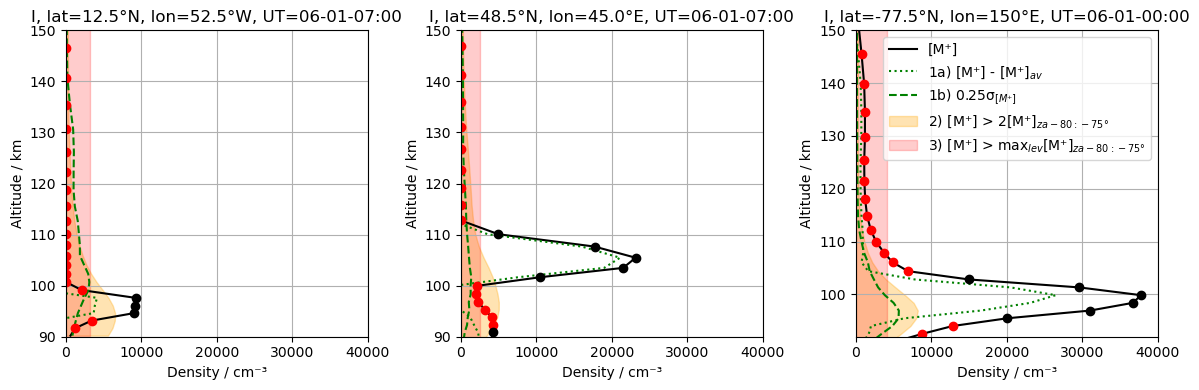

In [50]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

# First subplot ==============================================================================

axes[1].plot(Mptdensns_sel2_Smed, alt_sel2_Smed, label='[M\u207A]', color='black')
axes[1].plot((Mptdensns_sel2_Smed - Mptdens_nsavg_sel2_Smed), alt_sel2_Smed, color='green', linestyle='dotted', label='1a) [M\u207A] - [M\u207A]$_{av}$')
axes[1].plot(0.25 * Mptdens_nsstd_sel2_Smed, alt_sel2_Smed, color='green', linestyle='dashed', label='1b) 0.25\u03C3$_{[M\u207A]}$')

axes[1].set_ylim(90, WACCM_UL)
axes[1].set_xlim(0, 40000)

# Shading under the line 3 * Mptdens_sel
axes[1].fill_betweenx(alt_sel2_Smed, 0, 2 * Mptdens_sel2_Smed, color='orange', alpha=0.3, label=f'2) [M\u207A] > 2[M\u207A]$_{{za {int(intlat_sel2_Smed.values - 2.5)}:{int(intlat_sel2_Smed.values + 2.5)}\u00B0}}$')

# Calculate maximum of Mptdens_sel over altitude
max_Mptdens_sel_Smed = np.max(Mptdens_sel2_Smed)

# Add a vertical line at the maximum value
axes[1].fill_betweenx(alt_sel2_Smed, 0, max_Mptdens_sel_Smed, color='red', alpha=0.2, label=f'3) [M\u207A] > max$_{{lev}}$[M\u207A]$_{{za {int(intlat_sel2_Smed.values - 2.5)}:{int(intlat_sel2_Smed.values + 2.5)}\u00B0}}$')

for i in range(len(alt_sel2_Smed) - 1):
    if Mptdens_nsdiff_sel2_Smed[i] < 0.25 * Mptdens_nsstd_sel2_Smed[i] or Mptdensns_sel2_Smed[i] < max_Mptdens_sel_Smed or Mptdensns_sel2_Smed[i] < 2 * Mptdens_sel2_Smed[i]:
        axes[1].plot(Mptdensns_sel2_Smed[i], alt_sel2_Smed[i], 'ro')  # Plot red circles
    else:
        axes[1].plot(Mptdensns_sel2_Smed[i], alt_sel2_Smed[i], 'ko')  # Plot black circles

axes[1].set_xlabel('Density / cm\u207B\u00B3')
axes[1].set_ylabel('Altitude / km')
axes[1].grid(True)
axes[1].set_title('I, lat=48.5\u00b0N, lon=45.0\u00b0E, UT=06-01-07:00')

# Second subplot =============================================================================

axes[0].plot(Mptdensns_sel1_Smed, alt_sel1_Smed, label='[M\u207A]', color='black')
axes[0].plot((Mptdensns_sel1_Smed - Mptdens_nsavg_sel1_Smed), alt_sel1_Smed, color='green', linestyle='dotted', label='1a) [M\u207A] - [M\u207A]$_{av}$')
axes[0].plot(0.25 * Mptdens_nsstd_sel1_Smed, alt_sel1_Smed, color='green', linestyle='dashed', label='1b) 0.25\u03C3$_{[M\u207A]}$')

axes[0].set_ylim(90, WACCM_UL)
axes[0].set_xlim(0, 40000)

# Shading under the line 3 * Mptdens_sel
axes[0].fill_betweenx(alt_sel1_Smed, 0, 2 * Mptdens_sel1_Smed, color='orange', alpha=0.3, label=f'2) [M\u207A] > 2[M\u207A]$_{{za {int(intlat_sel1_Smed.values - 2.5)}:{int(intlat_sel1_Smed.values + 2.5)}\u00B0}}$')

# Calculate maximum of Mptdens_sel over altitude
max_Mptdens_sel_Smed = np.max(Mptdens_sel1_Smed)

# Add a vertical line at the maximum value
axes[0].fill_betweenx(alt_sel1_Smed, 0, max_Mptdens_sel_Smed, color='red', alpha=0.2, label=f'3) [M\u207A] > max$_{{lev}}$[M\u207A]$_{{za {int(intlat_sel1_Smed.values - 2.5)}:{int(intlat_sel1_Smed.values + 2.5)}\u00B0}}$')

for i in range(len(alt_sel1_Smed) - 1):
    if Mptdens_nsdiff_sel1_Smed[i] < 0.25 * Mptdens_nsstd_sel1_Smed[i] or Mptdensns_sel1_Smed[i] < max_Mptdens_sel_Smed or Mptdensns_sel1_Smed[i] < 2 * Mptdens_sel1_Smed[i]:
        axes[0].plot(Mptdensns_sel1_Smed[i], alt_sel1_Smed[i], 'ro')  # Plot red circles
    else:
        axes[0].plot(Mptdensns_sel1_Smed[i], alt_sel1_Smed[i], 'ko')  # Plot black circles

axes[0].set_xlabel('Density / cm\u207B\u00B3')
axes[0].set_ylabel('Altitude / km')
axes[0].grid(True)
axes[0].set_title('I, lat=12.5\u00b0N, lon=52.5\u00b0W, UT=06-01-07:00')

# Third subplot =============================================================================

axes[2].plot(Mptdensns_sel3_Smed, alt_sel3_Smed, label='[M\u207A]', color='black')
axes[2].plot((Mptdensns_sel3_Smed - Mptdens_nsavg_sel3_Smed), alt_sel3_Smed, color='green', linestyle='dotted', label='1a) [M\u207A] - [M\u207A]$_{av}$')
axes[2].plot(0.25 * Mptdens_nsstd_sel3_Smed, alt_sel3_Smed, color='green', linestyle='dashed', label='1b) 0.25\u03C3$_{[M\u207A]}$')

axes[2].set_ylim(92, WACCM_UL)
axes[2].set_xlim(0, 40000)

# Shading under the line 3 * Mptdens_sel
axes[2].fill_betweenx(alt_sel3_Smed, 0, 2 * Mptdens_sel3_Smed, color='orange', alpha=0.3, label=f'2) [M\u207A] > 2[M\u207A]$_{{za {int(intlat_sel3_Smed.values - 2.5)}:{int(intlat_sel3_Smed.values + 2.5)}\u00B0}}$')

# Calculate maximum of Mptdens_sel over altitude
max_Mptdens_sel_Smed = np.max(Mptdens_sel3_Smed)

# Add a vertical line at the maximum value
axes[2].fill_betweenx(alt_sel3_Smed, 0, max_Mptdens_sel_Smed, color='red', alpha=0.2, label=f'3) [M\u207A] > max$_{{lev}}$[M\u207A]$_{{za {int(intlat_sel3_Smed.values - 2.5)}:{int(intlat_sel3_Smed.values + 2.5)}\u00B0}}$')

for i in range(len(alt_sel3_Smed) - 1):
    if Mptdens_nsdiff_sel3_Smed[i] < 0.25 * Mptdens_nsstd_sel3_Smed[i] or Mptdensns_sel3_Smed[i] < max_Mptdens_sel_Smed or Mptdensns_sel3_Smed[i] < 2 * Mptdens_sel3_Smed[i]:
        axes[2].plot(Mptdensns_sel3_Smed[i], alt_sel3_Smed[i], 'ro')  # Plot red circles
    else:
        axes[2].plot(Mptdensns_sel3_Smed[i], alt_sel3_Smed[i], 'ko')  # Plot black circles

axes[2].set_xlabel('Density / cm\u207B\u00B3')
axes[2].set_ylabel('Altitude / km')
axes[2].legend()
axes[2].grid(True)
axes[2].set_title('I, lat=-77.5\u00b0N, lon=150\u00b0E, UT=06-01-00:00')
# ============================================================================================
plt.tight_layout()

figname = f'Smed_Criteria_eg_Lat_{int(intlat_sel2_Smed.values - 2.5)}-{int(intlat_sel2_Smed.values + 2.5)}_and_{int(intlat_sel1_Smed.values - 2.5)}-{int(intlat_sel1_Smed.values + 2.5)}_and_{int(intlat_sel3_Smed.values - 2.5)}-{int(intlat_sel3_Smed.values + 2.5)}.png'
plt.savefig(f'Comparison_figs/' + str(figname), dpi=400, bbox_inches='tight')

plt.show()


# Lat line plots

In [51]:
spr_cli_mean = np.mean(spr_SpEsns_Occ_Freq_lat_cli)
sum_cli_mean = np.mean(sum_SpEsns_Occ_Freq_lat_cli)
aut_cli_mean = np.mean(aut_SpEsns_Occ_Freq_lat_cli)
win_cli_mean = np.mean(win_SpEsns_Occ_Freq_lat_cli)

print(spr_SpEsns_Occ_Freq_lat_cli)

spr_cli_std = np.std(spr_SpEsns_Occ_Freq_lat_cli)
sum_cli_std = np.std(sum_SpEsns_Occ_Freq_lat_cli)
aut_cli_std = np.std(aut_SpEsns_Occ_Freq_lat_cli)
win_cli_std = np.std(win_SpEsns_Occ_Freq_lat_cli)

# For Smed data
spr_Smed_mean = np.mean(spr_SpEsns_Occ_Freq_lat_Smed)
sum_Smed_mean = np.mean(sum_SpEsns_Occ_Freq_lat_Smed)
aut_Smed_mean = np.mean(aut_SpEsns_Occ_Freq_lat_Smed)
win_Smed_mean = np.mean(win_SpEsns_Occ_Freq_lat_Smed)

spr_Smed_std = np.std(spr_SpEsns_Occ_Freq_lat_Smed)
sum_Smed_std = np.std(sum_SpEsns_Occ_Freq_lat_Smed)
aut_Smed_std = np.std(aut_SpEsns_Occ_Freq_lat_Smed)
win_Smed_std = np.std(win_SpEsns_Occ_Freq_lat_Smed)

<xarray.Variable (lat: 96)>
array([1.466529e-01, 5.169169e+00, 5.509562e+00, 4.593116e+00, 4.716974e+00,
       4.874396e+00, 4.328206e+00, 4.506625e+00, 4.558445e+00, 4.471999e+00,
       4.427637e+00, 4.800874e+00, 4.791963e+00, 4.920928e+00, 6.385450e+00,
       6.232522e+00, 6.914835e+00, 7.109728e+00, 7.235638e+00, 7.404816e+00,
       7.478787e+00, 7.409309e+00, 7.306044e+00, 6.946916e+00, 6.700652e+00,
       6.359076e+00, 6.026861e+00, 5.945836e+00, 5.742601e+00, 5.554627e+00,
       5.839516e+00, 5.678934e+00, 5.972495e+00, 5.949071e+00, 5.976374e+00,
       6.187187e+00, 6.118309e+00, 6.196757e+00, 6.215374e+00, 6.255511e+00,
       6.411105e+00, 6.404591e+00, 6.402239e+00, 6.324555e+00, 6.147738e+00,
       6.012603e+00, 5.764167e+00, 5.641897e+00, 5.667193e+00, 5.848756e+00,
       5.587142e+00, 5.814594e+00, 5.639366e+00, 6.038153e+00, 6.102643e+00,
       5.908529e+00, 6.133031e+00, 6.045731e+00, 6.169425e+00, 6.841419e+00,
       7.141884e+00, 7.483699e+00, 7.616154e+00,

<xarray.Variable (lat: 96)>
array([1.466529e-01, 5.169169e+00, 5.509562e+00, 4.593116e+00, 4.716974e+00,
       4.874396e+00, 4.328206e+00, 4.506625e+00, 4.558445e+00, 4.471999e+00,
       4.427637e+00, 4.800874e+00, 4.791963e+00, 4.920928e+00, 6.385450e+00,
       6.232522e+00, 6.914835e+00, 7.109728e+00, 7.235638e+00, 7.404816e+00,
       7.478787e+00, 7.409309e+00, 7.306044e+00, 6.946916e+00, 6.700652e+00,
       6.359076e+00, 6.026861e+00, 5.945836e+00, 5.742601e+00, 5.554627e+00,
       5.839516e+00, 5.678934e+00, 5.972495e+00, 5.949071e+00, 5.976374e+00,
       6.187187e+00, 6.118309e+00, 6.196757e+00, 6.215374e+00, 6.255511e+00,
       6.411105e+00, 6.404591e+00, 6.402239e+00, 6.324555e+00, 6.147738e+00,
       6.012603e+00, 5.764167e+00, 5.641897e+00, 5.667193e+00, 5.848756e+00,
       5.587142e+00, 5.814594e+00, 5.639366e+00, 6.038153e+00, 6.102643e+00,
       5.908529e+00, 6.133031e+00, 6.045731e+00, 6.169425e+00, 6.841419e+00,
       7.141884e+00, 7.483699e+00, 7.616154e+00,

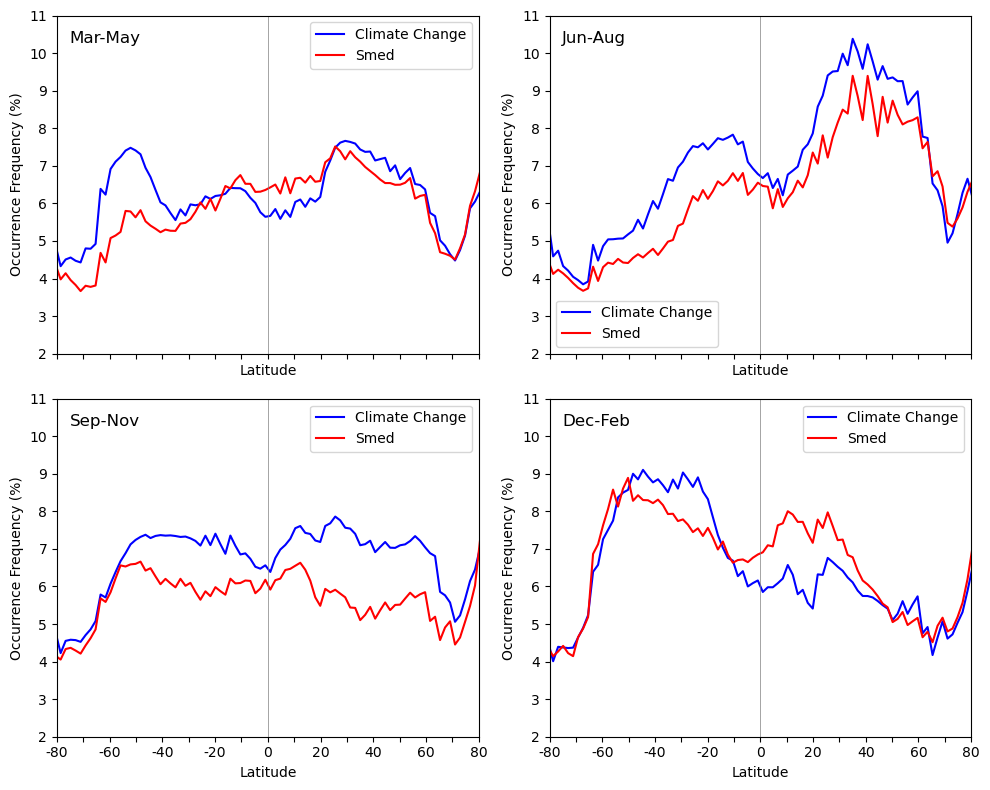

In [52]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8), sharex=True)

axes[0, 0].plot(lat, spr_SpEsns_Occ_Freq_lat_cli, color='blue', linestyle='solid', label='Climate Change')
axes[0, 1].plot(lat, sum_SpEsns_Occ_Freq_lat_cli, color='blue', linestyle='solid', label='Climate Change')
axes[1, 0].plot(lat, aut_SpEsns_Occ_Freq_lat_cli, color='blue', linestyle='solid', label='Climate Change')
axes[1, 1].plot(lat, win_SpEsns_Occ_Freq_lat_cli, color='blue', linestyle='solid', label='Climate Change')

axes[0, 0].plot(lat, spr_SpEsns_Occ_Freq_lat_Smed, color='red', linestyle='solid', label='Smed')
axes[0, 1].plot(lat, sum_SpEsns_Occ_Freq_lat_Smed, color='red', linestyle='solid', label='Smed')
axes[1, 0].plot(lat, aut_SpEsns_Occ_Freq_lat_Smed, color='red', linestyle='solid', label='Smed')
axes[1, 1].plot(lat, win_SpEsns_Occ_Freq_lat_Smed, color='red', linestyle='solid', label='Smed')

# Perform Student's t-test for each season
spr_ttest = stats.ttest_ind(spr_SpEsns_Occ_Freq_lat_cli, spr_SpEsns_Occ_Freq_lat_Smed, equal_var=False)
sum_ttest = stats.ttest_ind(sum_SpEsns_Occ_Freq_lat_cli, sum_SpEsns_Occ_Freq_lat_Smed, equal_var=False)
aut_ttest = stats.ttest_ind(aut_SpEsns_Occ_Freq_lat_cli, aut_SpEsns_Occ_Freq_lat_Smed, equal_var=False)
win_ttest = stats.ttest_ind(win_SpEsns_Occ_Freq_lat_cli, win_SpEsns_Occ_Freq_lat_Smed, equal_var=False)

print(spr_SpEsns_Occ_Freq_lat_cli)


# For Climate Change data
spr_cli_mean = np.mean(spr_SpEsns_Occ_Freq_lat_cli)
sum_cli_mean = np.mean(sum_SpEsns_Occ_Freq_lat_cli)
aut_cli_mean = np.mean(aut_SpEsns_Occ_Freq_lat_cli)
win_cli_mean = np.mean(win_SpEsns_Occ_Freq_lat_cli)

spr_cli_std = np.std(spr_SpEsns_Occ_Freq_lat_cli)
sum_cli_std = np.std(sum_SpEsns_Occ_Freq_lat_cli)
aut_cli_std = np.std(aut_SpEsns_Occ_Freq_lat_cli)
win_cli_std = np.std(win_SpEsns_Occ_Freq_lat_cli)

# For Smed data
spr_Smed_mean = np.mean(spr_SpEsns_Occ_Freq_lat_Smed)
sum_Smed_mean = np.mean(sum_SpEsns_Occ_Freq_lat_Smed)
aut_Smed_mean = np.mean(aut_SpEsns_Occ_Freq_lat_Smed)
win_Smed_mean = np.mean(win_SpEsns_Occ_Freq_lat_Smed)

spr_Smed_std = np.std(spr_SpEsns_Occ_Freq_lat_Smed)
sum_Smed_std = np.std(sum_SpEsns_Occ_Freq_lat_Smed)
aut_Smed_std = np.std(aut_SpEsns_Occ_Freq_lat_Smed)
win_Smed_std = np.std(win_SpEsns_Occ_Freq_lat_Smed)

ylim_min = 2
ylim_max = 11
nmeas_lim = 25

for ax in axes.flatten():
    ax.axvline(x=0, color='gray', linestyle='-', linewidth=0.5)
    ax.set_xlim(-80, 80)
    ax.set_xlabel('Latitude')
    ax.set_ylabel('Occurrence Frequency (%)')
    
    xticks = np.arange(-80, 81, 10)
    xticklabels = ['' if i % 2 != 0 else str(tick) for i, tick in enumerate(xticks)]
    ax.set_xticks(xticks)
    ax.set_xticklabels(xticklabels)
    ax.legend()
    ax.set_ylim(ylim_min, ylim_max)

seasons = ['Mar-May', 'Jun-Aug', 'Sep-Nov', 'Dec-Feb']
t_tests = [spr_ttest, sum_ttest, aut_ttest, win_ttest]
cli_means = [spr_cli_mean, sum_cli_mean, aut_cli_mean, win_cli_mean]
cli_stds = [spr_cli_std, sum_cli_std, aut_cli_std, win_cli_std]
smed_means = [spr_Smed_mean, sum_Smed_mean, aut_Smed_mean, win_Smed_mean]
smed_stds = [spr_Smed_std, sum_Smed_std, aut_Smed_std, win_Smed_std]

for i, (season, t_test, cli_mean, cli_std, smed_mean, smed_std) in enumerate(zip(
    seasons, t_tests, cli_means, cli_stds, smed_means, smed_stds)):
    row, col = i // 2, i % 2

    axes[row, col].text(0.03, 0.92, season, transform=axes[row, col].transAxes, fontsize=12)

    p_value = t_test.pvalue
    # significance = "significant" if p_value < 0.05 else "not significant"
    # stats_text = (f"Climate: μ={cli_mean:.2f}, σ={cli_std:.2f}\n"
    #               f"Smed: μ={smed_mean:.2f}, σ={smed_std:.2f}\n"
    #               f"t-test: p={p_value:.4f} ({significance})")
    
    # axes[row, col].text(0.03, 0.78, stats_text, transform=axes[row, col].transAxes, 
    #                     fontsize=8, bbox=dict(facecolor='white', alpha=0.7))

# axes[0, 0].legend(loc='lower right')
# axes[0, 1].legend(loc='lower right')
# axes[1, 0].legend(loc='lower right')
# axes[1, 1].legend(loc='lower right')
        
plt.tight_layout()
plt.show()

# print("\nStudent's t-test Results Summary:")
# print("=" * 50)
# print(f"{'Season':<10} {'Climate Mean':<15} {'Smed Mean':<15} {'t-statistic':<15} {'p-value':<15} {'Significant?':<15}")
# print("-" * 50)

# for i, (season, t_test, cli_mean, smed_mean) in enumerate(zip(seasons, t_tests, cli_means, smed_means)):
#     significant = "Yes" if t_test.pvalue < 0.05 else "No"

#     if t_test.pvalue < 0.0001:
#         p_value_str = f"<0.0001"
#     else:
#         p_value_str = f"{t_test.pvalue:.4f}"
    
#     print(f"{season:<10} {cli_mean:<15.4f} {smed_mean:<15.4f} {t_test.statistic:<15.4f} {p_value_str:<15} {significant:<15}")

In [149]:
cli_all = np.concatenate([spr_SpEsns_Occ_Freq_lat_cli, sum_SpEsns_Occ_Freq_lat_cli,
                          aut_SpEsns_Occ_Freq_lat_cli, win_SpEsns_Occ_Freq_lat_cli], axis=0)

smed_all = np.concatenate([spr_SpEsns_Occ_Freq_lat_Smed, sum_SpEsns_Occ_Freq_lat_Smed,
                           aut_SpEsns_Occ_Freq_lat_Smed, win_SpEsns_Occ_Freq_lat_Smed], axis=0)

overall_ttest = stats.ttest_ind(cli_all, smed_all)

cli_mean, cli_std = np.mean(cli_all), np.std(cli_all)
smed_mean, smed_std = np.mean(smed_all), np.std(smed_all)



p_value = overall_ttest.pvalue
df = overall_ttest.df

print('df =', + df)

significance = "significant" if p_value < 0.05 else "not significant"
stats_text = (f"Climate: μ={cli_mean:.2f}, σ={cli_std:.2f}\n"
              f"Smed: μ={smed_mean:.2f}, σ={smed_std:.2f}\n"
              f"Overall t-test: p={p_value:.4f} ({significance})")

print(stats_text)

print("\nOverall Student's t-test Result:")
print("=" * 50)
print(f"{'Climate Mean':<15} {'Smed Mean':<15} {'t-statistic':<15} {'p-value':<15}")
print("-" * 50)

p_value_str = f"<0.0001" if overall_ttest.pvalue < 0.0001 else f"{overall_ttest.pvalue:.4f}"

print(f"{cli_mean:<15.4f} {smed_mean:<15.4f} {overall_ttest.statistic:<15.4f} {p_value_str:<15}")

df = 766.0
Climate: μ=6.36, σ=1.61
Smed: μ=5.94, σ=1.51
Overall t-test: p=0.0002 (significant)

Overall Student's t-test Result:
Climate Mean    Smed Mean       t-statistic     p-value        
--------------------------------------------------
6.3603          5.9403          3.7190          0.0002         


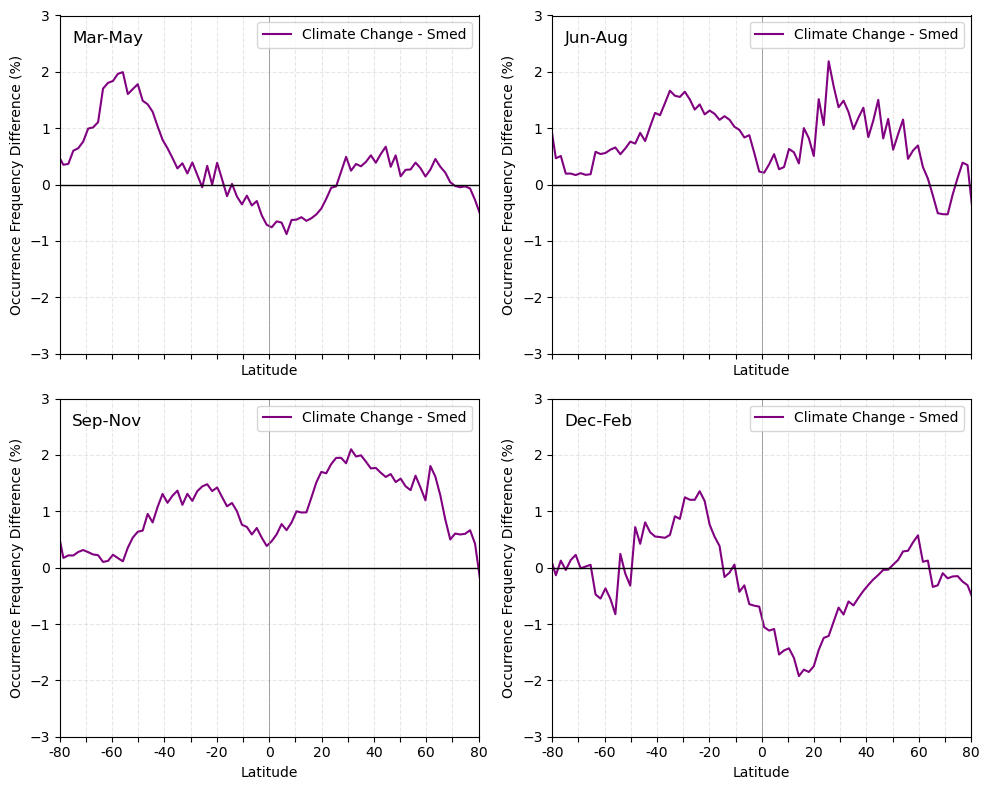

In [54]:
spr_diff = spr_SpEsns_Occ_Freq_lat_cli - spr_SpEsns_Occ_Freq_lat_Smed
sum_diff = sum_SpEsns_Occ_Freq_lat_cli - sum_SpEsns_Occ_Freq_lat_Smed
aut_diff = aut_SpEsns_Occ_Freq_lat_cli - aut_SpEsns_Occ_Freq_lat_Smed
win_diff = win_SpEsns_Occ_Freq_lat_cli - win_SpEsns_Occ_Freq_lat_Smed

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8), sharex=True)

# Plot differences
axes[0, 0].plot(lat, spr_diff, color='purple', linestyle='solid', label='Climate Change - Smed')
axes[0, 1].plot(lat, sum_diff, color='purple', linestyle='solid', label='Climate Change - Smed')
axes[1, 0].plot(lat, aut_diff, color='purple', linestyle='solid', label='Climate Change - Smed')
axes[1, 1].plot(lat, win_diff, color='purple', linestyle='solid', label='Climate Change - Smed')

ylim_min_diff = -3  
ylim_max_diff = 3

# Add zero line and formatting
for ax in axes.flatten():
    ax.axhline(y=0, color='black', linestyle='-', linewidth=1.0)
    ax.axvline(x=0, color='gray', linestyle='-', linewidth=0.5)
    ax.set_xlim(-80, 80)
    ax.set_xlabel('Latitude')
    ax.set_ylabel('Occurrence Frequency Difference (%)')
    
    xticks = np.arange(-80, 81, 10)
    xticklabels = ['' if i % 2 != 0 else str(tick) for i, tick in enumerate(xticks)]
    ax.set_xticks(xticks)
    ax.set_xticklabels(xticklabels)
    ax.legend()
    ax.set_ylim(ylim_min_diff, ylim_max_diff)
    ax.grid(True, linestyle='--', alpha=0.3)

# Add season labels
season_labels = ['Mar-May', 'Jun-Aug', 'Sep-Nov', 'Dec-Feb']
for i in range(2):
    for j in range(2):
        idx = i * 2 + j
        axes[i, j].text(0.03, 0.92, season_labels[idx], transform=axes[i, j].transAxes, fontsize=12)

for i in range(2):
    for j in range(2):
        axes[i, j].legend(loc='upper right')
        
plt.tight_layout()
plt.show()

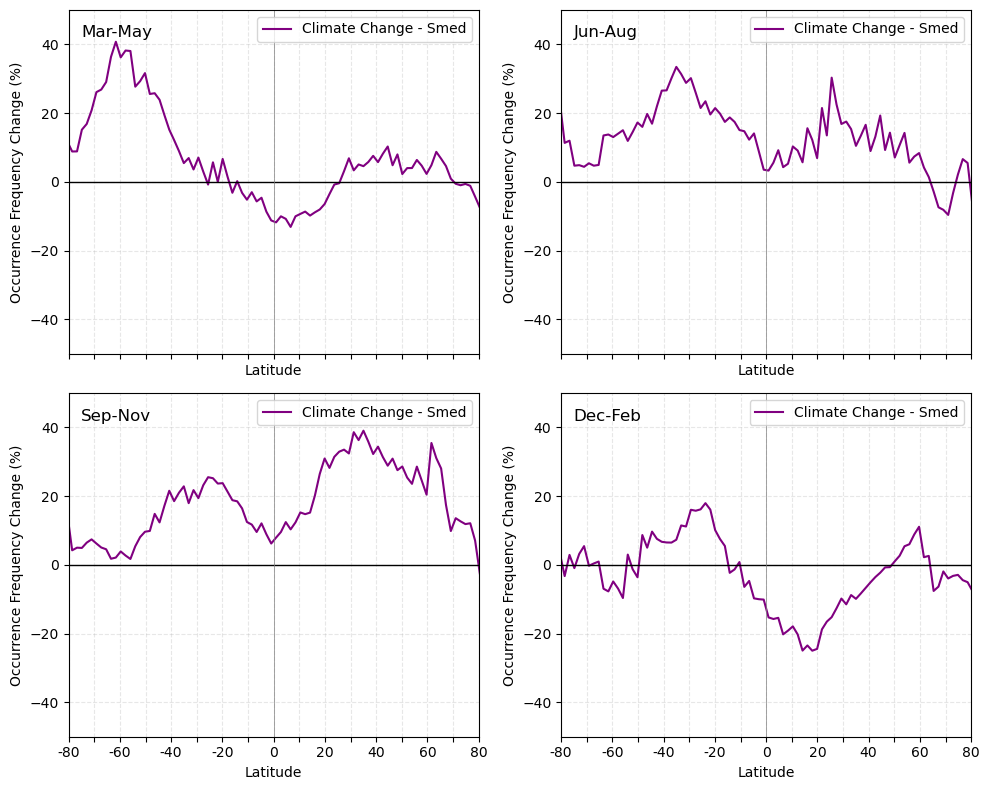

In [55]:
spr_diff = (spr_SpEsns_Occ_Freq_lat_cli - spr_SpEsns_Occ_Freq_lat_Smed) / spr_SpEsns_Occ_Freq_lat_Smed * 100
sum_diff = (sum_SpEsns_Occ_Freq_lat_cli - sum_SpEsns_Occ_Freq_lat_Smed) / sum_SpEsns_Occ_Freq_lat_Smed * 100
aut_diff = (aut_SpEsns_Occ_Freq_lat_cli - aut_SpEsns_Occ_Freq_lat_Smed) / aut_SpEsns_Occ_Freq_lat_Smed * 100
win_diff = (win_SpEsns_Occ_Freq_lat_cli - win_SpEsns_Occ_Freq_lat_Smed) / win_SpEsns_Occ_Freq_lat_Smed * 100

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8), sharex=True)

axes[0, 0].plot(lat, spr_diff, color='purple', linestyle='solid', label='Climate Change - Smed')
axes[0, 1].plot(lat, sum_diff, color='purple', linestyle='solid', label='Climate Change - Smed')
axes[1, 0].plot(lat, aut_diff, color='purple', linestyle='solid', label='Climate Change - Smed')
axes[1, 1].plot(lat, win_diff, color='purple', linestyle='solid', label='Climate Change - Smed')

ylim_min_diff = -50 
ylim_max_diff = 50   

for ax in axes.flatten():
    ax.axhline(y=0, color='black', linestyle='-', linewidth=1.0)
    ax.axvline(x=0, color='gray', linestyle='-', linewidth=0.5)
    ax.set_xlim(-80, 80)
    ax.set_xlabel('Latitude')
    ax.set_ylabel('Occurrence Frequency Change (%)')
    
    xticks = np.arange(-80, 81, 10)
    xticklabels = ['' if i % 2 != 0 else str(tick) for i, tick in enumerate(xticks)]
    ax.set_xticks(xticks)
    ax.set_xticklabels(xticklabels)
    ax.legend()
    ax.set_ylim(ylim_min_diff, ylim_max_diff)
    ax.grid(True, linestyle='--', alpha=0.3)

season_labels = ['Mar-May', 'Jun-Aug', 'Sep-Nov', 'Dec-Feb']
for i in range(2):
    for j in range(2):
        idx = i * 2 + j
        axes[i, j].text(0.03, 0.92, season_labels[idx], transform=axes[i, j].transAxes, fontsize=12)

for i in range(2):
    for j in range(2):
        axes[i, j].legend(loc='upper right')
        
plt.tight_layout()
plt.show()

In [56]:
# Test

spr_diff = spr_SpEs_Occ_Freq_lat_cli - spr_SpEs_Occ_Freq_lat_Smed
sum_diff = sum_SpEs_Occ_Freq_lat_cli - sum_SpEs_Occ_Freq_lat_Smed
aut_diff = aut_SpEs_Occ_Freq_lat_cli - aut_SpEs_Occ_Freq_lat_Smed
win_diff = win_SpEs_Occ_Freq_lat_cli - win_SpEs_Occ_Freq_lat_Smed

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8), sharex=True)

# Plot differences
axes[0, 0].plot(lat, spr_diff, color='purple', linestyle='solid', label='Climate Change - Smed')
axes[0, 1].plot(lat, sum_diff, color='purple', linestyle='solid', label='Climate Change - Smed')
axes[1, 0].plot(lat, aut_diff, color='purple', linestyle='solid', label='Climate Change - Smed')
axes[1, 1].plot(lat, win_diff, color='purple', linestyle='solid', label='Climate Change - Smed')

ylim_min_diff = -3  
ylim_max_diff = 3

# Add zero line and formatting
for ax in axes.flatten():
    ax.axhline(y=0, color='black', linestyle='-', linewidth=1.0)
    ax.axvline(x=0, color='gray', linestyle='-', linewidth=0.5)
    ax.set_xlim(-80, 80)
    ax.set_xlabel('Latitude')
    ax.set_ylabel('Occurrence Frequency Difference (%)')
    
    xticks = np.arange(-80, 81, 10)
    xticklabels = ['' if i % 2 != 0 else str(tick) for i, tick in enumerate(xticks)]
    ax.set_xticks(xticks)
    ax.set_xticklabels(xticklabels)
    ax.legend()
    ax.set_ylim(ylim_min_diff, ylim_max_diff)
    ax.grid(True, linestyle='--', alpha=0.3)

# Add season labels
season_labels = ['Mar-May', 'Jun-Aug', 'Sep-Nov', 'Dec-Feb']
for i in range(2):
    for j in range(2):
        idx = i * 2 + j
        axes[i, j].text(0.03, 0.92, season_labels[idx], transform=axes[i, j].transAxes, fontsize=12)

for i in range(2):
    for j in range(2):
        axes[i, j].legend(loc='upper right')
        
plt.tight_layout()
plt.show()

NameError: name 'spr_SpEs_Occ_Freq_lat_cli' is not defined

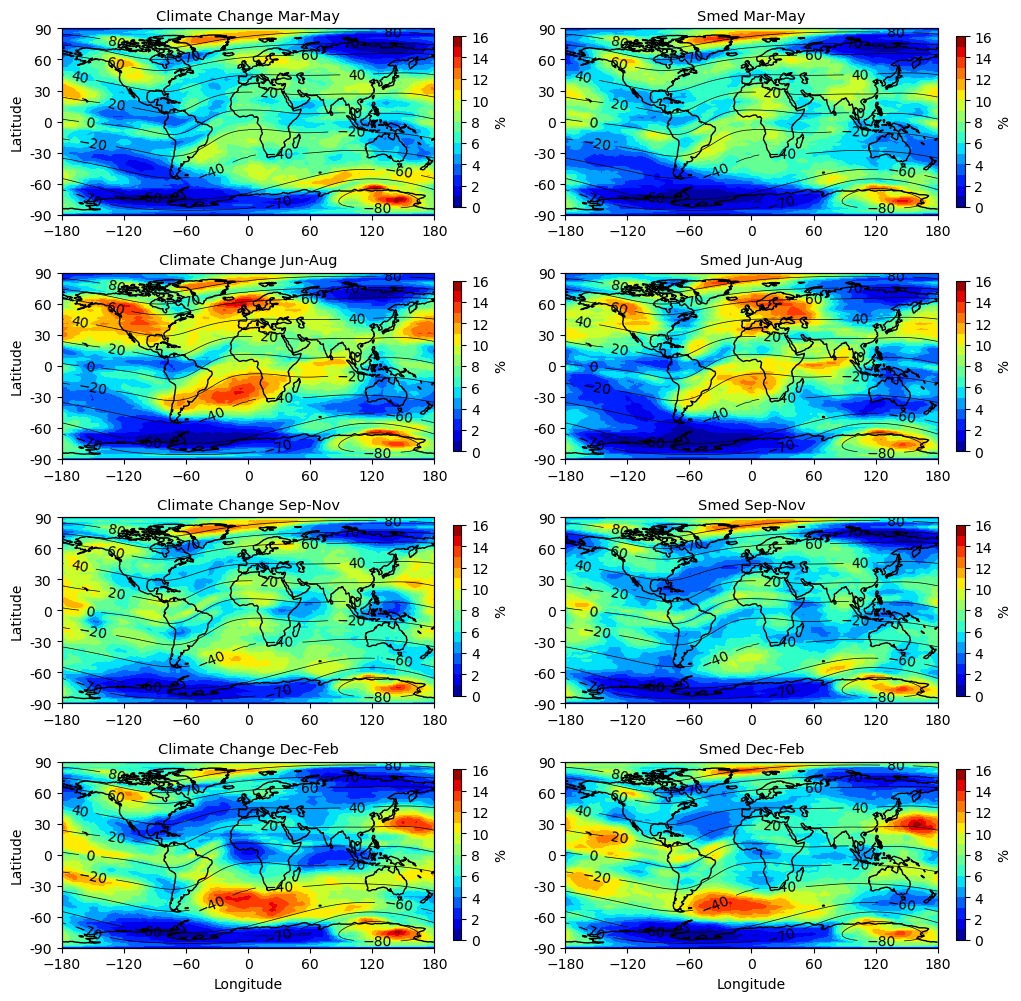

In [57]:
lon_plot = lon.values
lon_plot[-1] = 360.


fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(11, 11),
                         sharex=True, sharey=True, 
                         subplot_kw={'projection': ccrs.PlateCarree(central_longitude=0)})

cmap = plt.get_cmap('jet')

subplots_cli = [spr_SpEsns_Occ_Freq_llav_cli , sum_SpEsns_Occ_Freq_llav_cli
                  , aut_SpEsns_Occ_Freq_llav_cli, win_SpEsns_Occ_Freq_llav_cli]

titles_cli = ['Mar-May', 'Jun-Aug', 'Sep-Nov', 'Dec-Feb']

vmin_cli = 0
vmax_cli = 16
nolevs_cli = (vmax_cli-vmin_cli) +1

for i, data in enumerate(subplots_cli):
    row_cli = i
    col_cli = 0
    
    ax_cli = axes[i, 0]

    C = ax_cli.contourf(lon_plot, lat, data, cmap=cmap,
                    levels=np.linspace(vmin_cli, vmax_cli, nolevs_cli), vmin=vmin_cli, vmax=vmax_cli
                         )

    
    if row_cli == 3:
        ax_cli.set_xlabel('Longitude')
    if col_cli == 0:
        ax_cli.set_xticks([-180, -120, -60, 0, 60, 120, 180], crs=ccrs.PlateCarree())
 
    ax_cli.set_ylabel('Latitude')
    ax_cli.set_yticks(np.linspace(-90, 90, 7))
    ax_cli.set_yticklabels((-90, -60, -30, 0, 30, 60, 90))
        


    
    cbar = fig.colorbar(C, ax=ax_cli, pad=0.04, shrink=0.8)
    cbar.set_label(r'%') 

    ax_cli.coastlines() 

    ax2 = fig.add_subplot(axes[i, 0].get_subplotspec(), projection=ccrs.PlateCarree())

    ax2.set_global()
    contour_levels = [-80, -70, -60, -40, -20, 0, 20, 40, 60, 70, 80]
    contour = ax2.contour(lon, lat, ALATM_cli[0, :, :],
                          transform=ccrs.PlateCarree(),
                          colors='black',
                          levels=contour_levels,# vmin=-90, vmax=90,
                          linestyles='solid',
                          linewidths=0.5
                          )

    ax2.patch.set_facecolor('none')
    clabels = ax2.clabel(contour, inline=True, fontsize=10)
    ax2.set_title(f'Climate Change {titles_cli[i]}', fontsize=10.5)

subplots_Smed = [spr_SpEsns_Occ_Freq_llav_Smed , sum_SpEsns_Occ_Freq_llav_Smed
                  , aut_SpEsns_Occ_Freq_llav_Smed, win_SpEsns_Occ_Freq_llav_Smed]

titles_Smed = ['Mar-May', 'Jun-Aug', 'Sep-Nov', 'Dec-Feb']

vmin_Smed = 0
vmax_Smed = 16
nolevs_Smed = (vmax_Smed-vmin_Smed) +1

for i, data in enumerate(subplots_Smed):
    ax_Smed = axes[i, 1]
    

    C = ax_Smed.contourf(lon_plot, lat, data, cmap=cmap,
                    levels=np.linspace(vmin_Smed, vmax_Smed, nolevs_Smed), vmin=vmin_Smed, vmax=vmax_Smed
                         )

    ax_Smed.set_xticks([-180, -120, -60, 0, 60, 120, 180], crs=ccrs.PlateCarree())
    if i == 3:
        ax_Smed.set_xlabel('Longitude')

    ax_Smed.set_yticks(np.linspace(-90, 90, 7))


    cbar = fig.colorbar(C, ax=ax_Smed, pad=0.04, shrink=0.8)
    cbar.set_label(r'%') 

    ax_Smed.coastlines() 

    ax2_Smed = fig.add_subplot(axes[i, 1].get_subplotspec(), projection=ccrs.PlateCarree())

    ax2_Smed.set_global()
    contour_levels = [-80, -70, -60, -40, -20, 0, 20, 40, 60, 70, 80]
    contour = ax2_Smed.contour(lon, lat, ALATM_Smed[0, :, :],
                          transform=ccrs.PlateCarree(),
                          colors='black',
                          levels=contour_levels, vmin=-90, vmax=90,
                          linestyles='solid',
                          linewidths=0.5
                          )

    ax2_Smed.patch.set_facecolor('none')
    clabels = ax2_Smed.clabel(contour, inline=True, fontsize=10)
    ax2_Smed.set_title(f'Smed {titles_Smed[i]}', fontsize=10.5)


plt.tight_layout(rect=[0.05, 0.03, 1, 0.95])

# figname = None
# if fivedegbins == 1:
#     figname = f'{run_name}_Daviddata_LatLon_5d_f-{factor}.png'
# else:
#     figname = f'{run_name}_Daviddata_LatLon_f-{factor}.png'
    
# plt.savefig(f'Figures/Combined/{filename_append}/' + str(figname), dpi=400, bbox_inches='tight')

plt.show()


# Lat - LT all levels

NameError: name 'cbar_Smed' is not defined

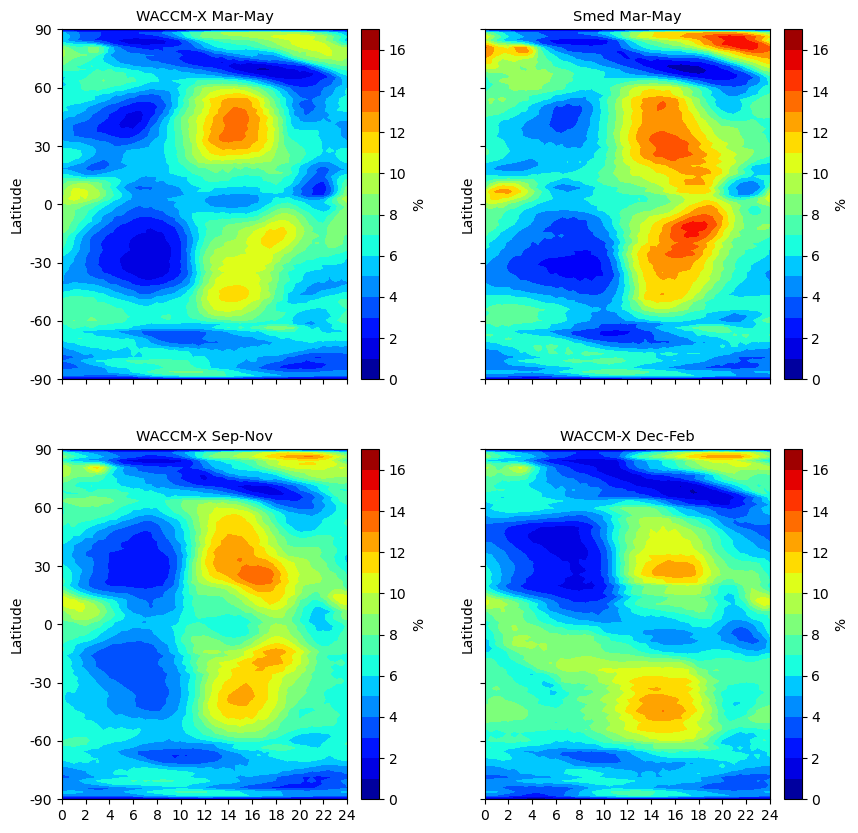

In [58]:
# Lat - LT - all levs

 #Whole Dataset avg over all heights (96, 48) lat,LT
win_SpEs_Occ_Freq_llbav_plot_cli = np.concatenate((win_SpEs_Occ_Freq_llbav_cli, win_SpEs_Occ_Freq_llbav_cli[:, :1]), axis=1)
spr_SpEs_Occ_Freq_llbav_plot_cli = np.concatenate((spr_SpEs_Occ_Freq_llbav_cli, spr_SpEs_Occ_Freq_llbav_cli[:, :1]), axis=1)
sum_SpEs_Occ_Freq_llbav_plot_cli = np.concatenate((sum_SpEs_Occ_Freq_llbav_cli, sum_SpEs_Occ_Freq_llbav_cli[:, :1]), axis=1)
aut_SpEs_Occ_Freq_llbav_plot_cli = np.concatenate((aut_SpEs_Occ_Freq_llbav_cli, aut_SpEs_Occ_Freq_llbav_cli[:, :1]), axis=1)

win_SpEs_Occ_Freq_llbav_plot_Smed = np.concatenate((win_SpEs_Occ_Freq_llbav_Smed, win_SpEs_Occ_Freq_llbav_Smed[:, :1]), axis=1)
spr_SpEs_Occ_Freq_llbav_plot_Smed = np.concatenate((spr_SpEs_Occ_Freq_llbav_Smed, spr_SpEs_Occ_Freq_llbav_Smed[:, :1]), axis=1)
sum_SpEs_Occ_Freq_llbav_plot_Smed = np.concatenate((sum_SpEs_Occ_Freq_llbav_Smed, sum_SpEs_Occ_Freq_llbav_Smed[:, :1]), axis=1)
aut_SpEs_Occ_Freq_llbav_plot_Smed = np.concatenate((aut_SpEs_Occ_Freq_llbav_Smed, aut_SpEs_Occ_Freq_llbav_Smed[:, :1]), axis=1)


fig_combined, axes_combined = plt.subplots(nrows=2, ncols=2, figsize=(10, 10),
                                           sharex=True, sharey=True)

vmin_Smed = 0
vmax_Smed = 14
nolevs_Smed = (vmax_Smed - vmin_Smed ) +1
cmap_Smed = plt.get_cmap('jet')

vmin_cli = 0
vmax_cli = 17
nolevs_cli = (vmax_cli - vmin_cli ) +1
cmap_cli = plt.get_cmap('jet')


subplots_cli = [spr_SpEs_Occ_Freq_llbav_plot_cli, sum_SpEs_Occ_Freq_llbav_plot_cli,
                  aut_SpEs_Occ_Freq_llbav_plot_cli, win_SpEs_Occ_Freq_llbav_plot_cli]

titles_cli = ['Mar-May', 'Jun-Aug', 'Sep-Nov', 'Dec-Feb']


for i, data_cli in enumerate(subplots_cli):
    row_cli = i // 2
    col_cli = i % 2
    ax_cli = axes_combined[row_cli, col_cli]

    C_cli = ax_cli.contourf(timeplot, lat, data_cli, cmap=jet,
                                levels=np.linspace(vmin_cli, vmax_cli, nolevs_cli),
                                vmin=vmin_cli, vmax=vmax_cli
                               )

    if row_cli == 2:
        ax_cli.set_xlabel('Local Time / hrs')
    if col_cli == 0:
        xticks_cli = np.linspace(0, 24, 13)
        ax_cli.set_xticks(xticks_cli)
        ax_cli.set_xticklabels(xticks_cli.astype(int))  
    
    ax_cli.set_ylabel('Latitude')
    ax_cli.set_yticks(np.linspace(-90, 90, 7))
    ax_cli.set_yticklabels((-90, -60, -30, 0, 30, 60, 90))
        
    ax_cli.set_title(f'WACCM-X {titles_cli[i]}', fontsize=10.5)


    cbar_cli = fig_combined.colorbar(C_cli, ax=ax_cli, pad=0.04)#, shrink=0.8)
    cbar_cli.set_label(r'%')

    
    
subplots_Smed = [spr_SpEs_Occ_Freq_llbav_plot_Smed, sum_SpEs_Occ_Freq_llbav_plot_Smed,
                  aut_SpEs_Occ_Freq_llbav_plot_Smed, win_SpEs_Occ_Freq_llbav_plot_Smed]

titles_Smed = ['Mar-May', 'Jun-Aug', 'Sep-Nov', 'Dec-Feb']

for i, data_Smed in enumerate(subplots_Smed):
    row_Smed = i
    col_Smed = 1
    ax_Smed = axes_combined[row_Smed, col_Smed]

    C_Smed = ax_Smed.contourf(timeplot, lat, data_Smed, cmap=jet,
                                levels=np.linspace(vmin_Smed, vmax_Smed, nolevs_Smed),
                                vmin=vmin_Smed, vmax=vmax_Smed
                               )

    if col_Smed == 0:
        ax_Smed.set_ylabel('Latitude')
    ax_Smed.set_yticks(np.linspace(-90, 90, 7))
    ax_Smed.set_yticklabels((-90, -60, -30, 0, 30, 60, 90))   
    
    if row_Smed == 3:
        ax_Smed.set_xlabel('Local Time / hrs')
    xticks_Smed = np.linspace(0, 24, 13)
    ax_Smed.set_xticks(xticks_Smed)
    ax_Smed.set_xticklabels(xticks_Smed.astype(int))
    
    ax_Smed.set_title(f'Smed {titles_Smed[i]}', fontsize=10.5)

    # cbar_Smed = fig_combined.colorbar(C_Smed, ax=ax_Smed, pad=0.04)#, shrink=0.8)
    cbar_Smed.set_label(r'%')

plt.tight_layout()


# figname = None
# if fivedegbins == 1:
#     figname = f'{run_name}_Daviddata_LatLT_5d_f-{factor}.png'
# else:
#     figname = f'{run_name}_Daviddata_LatLT_f-{factor}.png'
    
# plt.savefig(f'Figures/Combined/{filename_append}/' + str(figname), dpi=400, bbox_inches='tight')


plt.show()

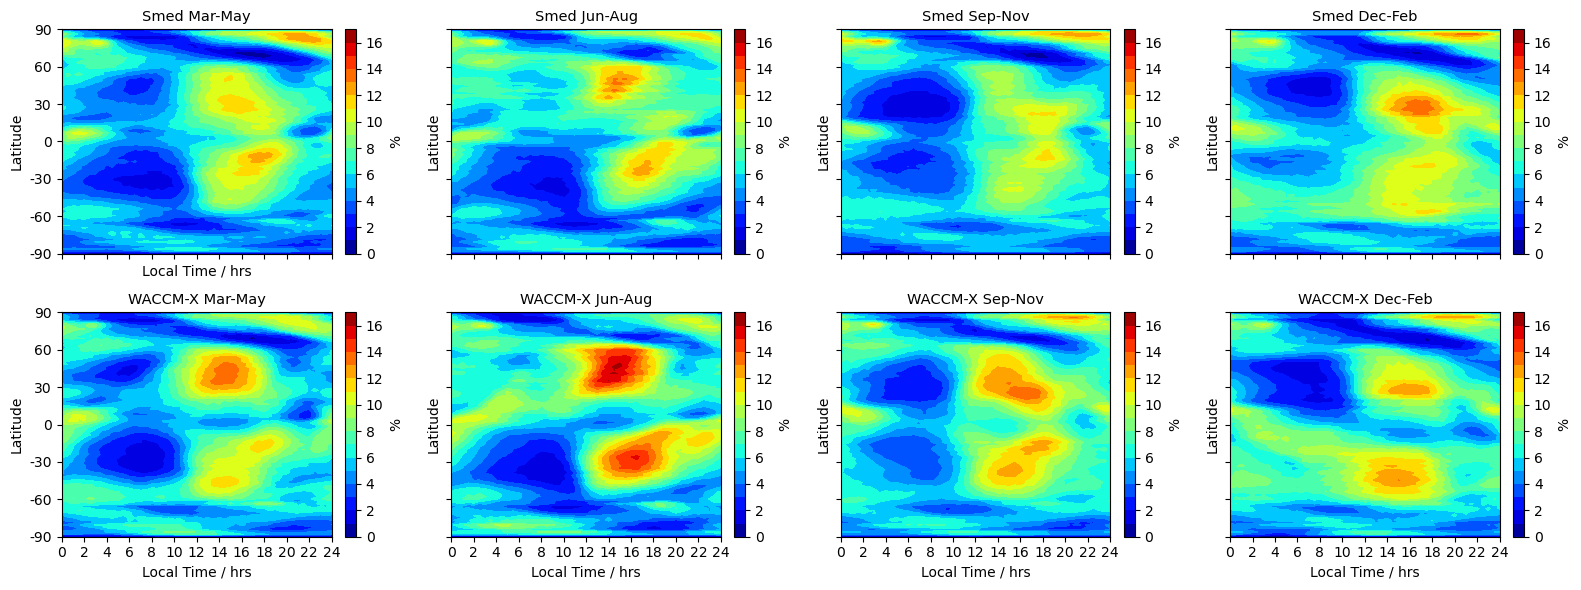

In [59]:
# Latitude - Local Time Plots
# Landscape 

fig_combined, axes_combined = plt.subplots(nrows=2, ncols=4, figsize=(16, 6),
                                           sharex=True, sharey=True)

vmin_Smed = 0
vmax_Smed = 17
nolevs_Smed = (vmax_Smed - vmin_Smed) + 1
cmap_Smed = plt.get_cmap('jet')

vmin_cli = 0
vmax_cli = 17
nolevs_cli = (vmax_cli - vmin_cli) + 1
cmap_cli = plt.get_cmap('jet')

subplots_Smed = [spr_SpEs_Occ_Freq_llbav_plot_Smed, sum_SpEs_Occ_Freq_llbav_plot_Smed,
                  aut_SpEs_Occ_Freq_llbav_plot_Smed, win_SpEs_Occ_Freq_llbav_plot_Smed]

titles_Smed = ['Mar-May', 'Jun-Aug', 'Sep-Nov', 'Dec-Feb']

for i, data_Smed in enumerate(subplots_Smed):
    row_Smed = 0
    col_Smed = i
    ax_Smed = axes_combined[row_Smed, col_Smed]

    C_Smed = ax_Smed.contourf(timeplot, lat, data_Smed, cmap=jet,
                            levels=np.linspace(vmin_Smed, vmax_Smed, nolevs_Smed),
                            vmin=vmin_Smed, vmax=vmax_Smed
                           )

    if row_Smed == 0:
        ax_Smed.set_ylabel('Latitude')
    ax_Smed.set_yticks(np.linspace(-90, 90, 7))
    ax_Smed.set_yticklabels((-90, -60, -30, 0, 30, 60, 90))

    if col_Smed == 0:
        ax_Smed.set_xlabel('Local Time / hrs')
    xticks_Smed = np.linspace(0, 24, 13)
    ax_Smed.set_xticks(xticks_Smed)
    ax_Smed.set_xticklabels(xticks_Smed.astype(int))

    ax_Smed.set_title(f'Smed {titles_Smed[i]}', fontsize=10.5)

    cbar_Smed = fig_combined.colorbar(C_Smed, ax=ax_Smed, pad=0.04)  # , shrink=0.8)
    cbar_Smed.set_label(r'%')

    
    

subplots_cli = [spr_SpEs_Occ_Freq_llbav_plot_cli, sum_SpEs_Occ_Freq_llbav_plot_cli,
                  aut_SpEs_Occ_Freq_llbav_plot_cli, win_SpEs_Occ_Freq_llbav_plot_cli]

titles_cli = ['Mar-May', 'Jun-Aug', 'Sep-Nov', 'Dec-Feb']

for i, data_cli in enumerate(subplots_cli):
    row_cli = 1
    col_cli = i
    ax_cli = axes_combined[row_cli, col_cli]

    C_cli = ax_cli.contourf(timeplot, lat, data_cli, cmap=jet,
                                 levels=np.linspace(vmin_cli, vmax_cli, nolevs_cli),
                                 vmin=vmin_cli, vmax=vmax_cli
                                 )

    if row_cli == 1:
        ax_cli.set_xlabel('Local Time / hrs')
    if col_cli == 0:
        xticks_cli = np.linspace(0, 24, 13)
        ax_cli.set_xticks(xticks_cli)
        ax_cli.set_xticklabels(xticks_cli.astype(int))

    ax_cli.set_ylabel('Latitude')
    ax_cli.set_yticks(np.linspace(-90, 90, 7))
    ax_cli.set_yticklabels((-90, -60, -30, 0, 30, 60, 90))

    ax_cli.set_title(f'WACCM-X {titles_cli[i]}', fontsize=10.5)

    cbar_cli = fig_combined.colorbar(C_cli, ax=ax_cli, pad=0.04)  # , shrink=0.8)
    cbar_cli.set_label(r'%')

plt.tight_layout()  

# figname = None
# if fivedegbins == 1:
#     figname = f'{run_name}_Daviddata_LatLT_5d_f-{factor}_landscape.png'
# else:
#     figname = f'{run_name}_Daviddata_LatLT_f-{factor}_landscape.png'

# plt.savefig(f'Figures/Combined/{filename_append}/' + str(figname), dpi=400, bbox_inches='tight')

plt.show()


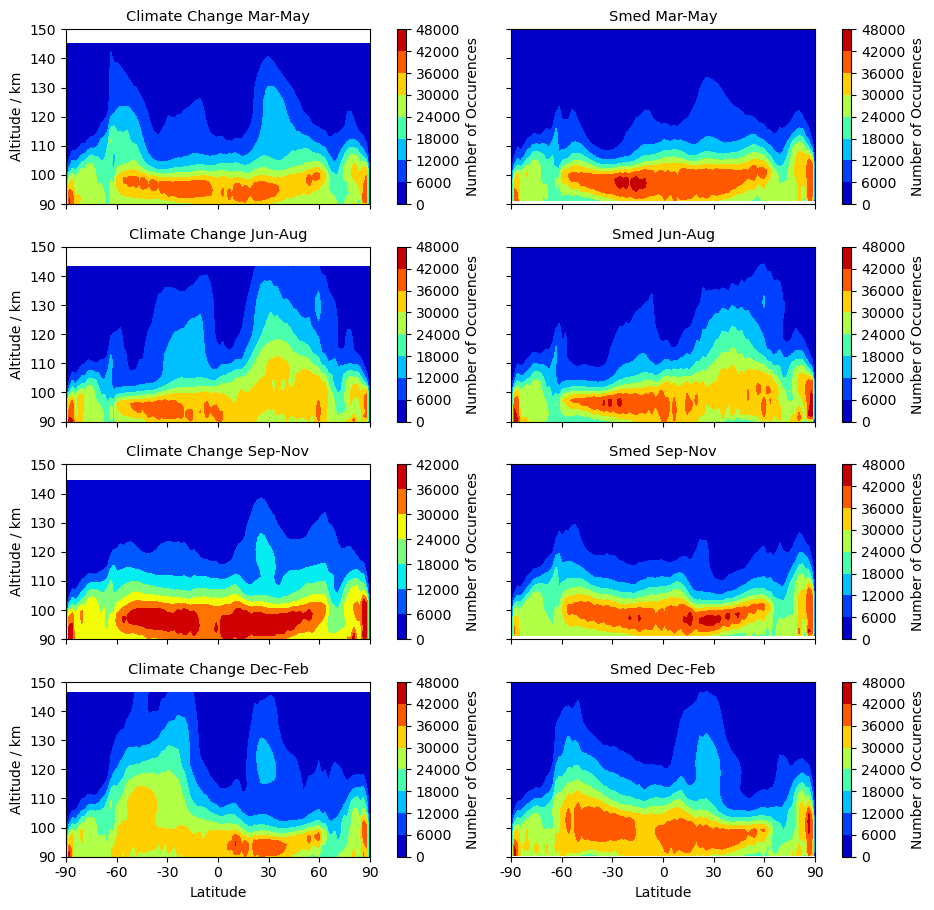

In [60]:
# Plotting number of occurences rather than occurence frequency, since no altitude information available if there is no Es layer present

vmin_Smed = 0
vmax_Smed = 14
nolevs_Smed = (vmax_Smed - vmin_Smed )+ 1

vmin_cli = 0
vmax_cli = 14
nolevs_cli = (vmax_cli - vmin_cli )+ 1 

cmap = plt.get_cmap('jet')

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(10, 10), sharex=True, sharey=True)



subplots_cli = [SpEs_spr_cli_alt_lat, SpEs_sum_cli_alt_lat, SpEs_aut_cli_alt_lat, SpEs_win_cli_alt_lat] #tot_SpEsns_spr

alts_cli = [altavg_sl_spr_cli, altavg_sl_sum_cli, altavg_sl_aut_cli, altavg_sl_win_cli]


titles_cli = ['Mar-May', 'Jun-Aug', 'Sep-Nov', 'Dec-Feb']

for i, data_cli in enumerate(subplots_cli):
    ax = axes[i, 0]

    alts_plot = alts_cli[i]
    
    C = ax.contourf(lat, alts_plot, data_cli, cmap=cmap, 
                   # levels=np.linspace(vmin_cli, vmax_cli, nolevs_cli), vmin=vmin_cli, vmax=vmax_cli
                   )

    if i == 3:
        ax.set_xlabel('Latitude')
        ax.set_xticks(np.linspace(-90, 90, 7))
        ax.set_xticklabels((-90, -60, -30, 0, 30, 60, 90))
    else:
        ax.set_xticks([])  # Remove xticks for intermediate WACCM plots

    ax.set_ylabel('Altitude / km')


    cbar = fig.colorbar(C, ax=ax, pad=0.07)
    cbar.set_label(r'Number of Occurences')

    ax.set_title(f'Climate Change {titles_cli[i]}', fontsize=10.5)
    
    

subplots_Smed = [SpEs_spr_Smed_alt_lat, SpEs_sum_Smed_alt_lat, SpEs_aut_Smed_alt_lat, SpEs_win_Smed_alt_lat]

alts_Smed = [altavg_sl_spr_Smed, altavg_sl_sum_Smed, altavg_sl_aut_Smed, altavg_sl_win_Smed]

titles_Smed = ['Mar-May', 'Jun-Aug', 'Sep-Nov', 'Dec-Feb']

for i, data_Smed in enumerate(subplots_Smed):
    ax = axes[i, 1]

    alts_plot = alts_Smed[i]

    C = ax.contourf(lat, alts_plot, data_Smed, cmap=cmap, 
                   # levels=np.linspace(vmin_cli, vmax_cli, nolevs_cli), vmin=vmin_cli, vmax=vmax_cli
                   )

    if i == 3:
        ax.set_xlabel('Latitude')
        ax.set_xticks(np.linspace(-90, 90, 7))
        ax.set_xticklabels((-90, -60, -30, 0, 30, 60, 90))
    else:
        ax.set_xticks([])  # Remove xticks for intermediate COSMIC plots

    cbar = fig.colorbar(C, ax=ax, pad=0.07)
    cbar.set_label(r'Number of Occurences')

    ax.set_title(f'Smed {titles_Smed[i]}', fontsize=10.5)
    
ax.set_ylim(90,150)

plt.tight_layout(rect=[0.05, 0.03, 1, 0.95])

# Save the figure
# figname = f'{run_name}_Daviddata_AltLat.png'
# plt.savefig(f'Figures/Combined/{filename_append}/' + str(figname), dpi=400, bbox_inches='tight')

plt.show()


# Alt - Lat 

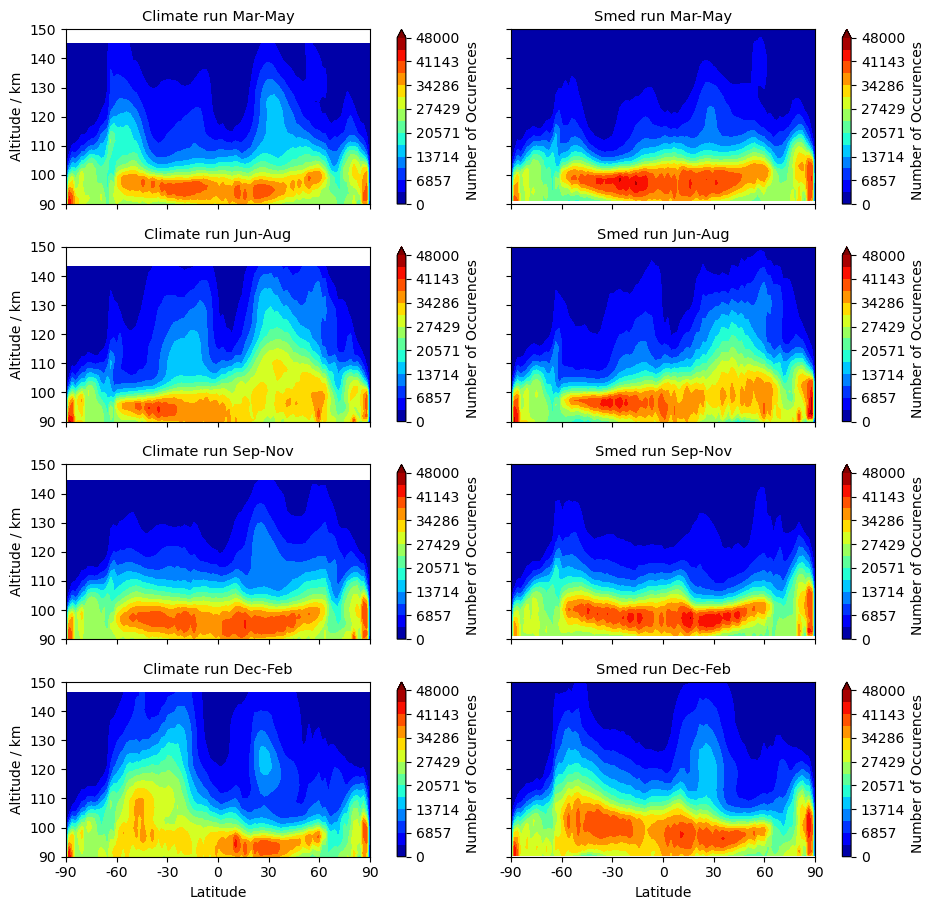

In [61]:
# Plotting number of occurences rather than occurence frequency, since no altitude information available if there is no Es layer present

vmin_Smed= 0
vmax_Smed= 48000
nolevs_Smed= 15

vmin_cli = 0
vmax_cli = 48000
nolevs_cli = 15

cmap = plt.get_cmap('jet')

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(10, 10), sharex=True, sharey=True)



subplots_cli = [SpEs_spr_cli_alt_lat, SpEs_sum_cli_alt_lat, SpEs_aut_cli_alt_lat, SpEs_win_cli_alt_lat] 

alts_cli = [altavg_sl_spr_cli, altavg_sl_sum_cli, altavg_sl_aut_cli, altavg_sl_win_cli]


titles_cli = ['Mar-May', 'Jun-Aug', 'Sep-Nov', 'Dec-Feb']

for i, data_cli in enumerate(subplots_cli):
    ax = axes[i, 0]

    alts_plot = alts_cli[i]
    
    C = ax.contourf(lat, alts_plot, data_cli, cmap=cmap, 
                    levels=np.linspace(vmin_cli, vmax_cli, nolevs_cli), 
                    vmin=vmin_cli, vmax=vmax_cli,
                    extend='max')

    if i == 3:
        ax.set_xlabel('Latitude')
        ax.set_xticks(np.linspace(-90, 90, 7))
        ax.set_xticklabels((-90, -60, -30, 0, 30, 60, 90))
    else:
        ax.set_xticks([])  # Remove xticks for intermediate cli plots

    ax.set_ylabel('Altitude / km')


    cbar = fig.colorbar(C, ax=ax, pad=0.07)
    cbar.set_label(r'Number of Occurences')

    ax.set_title(f'Climate run {titles_cli[i]}', fontsize=10.5)
    
    

subplots_Smed= [SpEs_spr_Smed_alt_lat, SpEs_sum_Smed_alt_lat, SpEs_aut_Smed_alt_lat, SpEs_win_Smed_alt_lat]

alts_Smed = [altavg_sl_spr_Smed, altavg_sl_sum_Smed, altavg_sl_aut_Smed, altavg_sl_win_Smed]

titles_Smed= ['Mar-May', 'Jun-Aug', 'Sep-Nov', 'Dec-Feb']

for i, data_Smed in enumerate(subplots_Smed):
    ax = axes[i, 1]

    alts_plot = alts_Smed[i]

    C = ax.contourf(lat, alts_plot, data_Smed, cmap=cmap, 
                    levels=np.linspace(vmin_Smed, vmax_Smed, nolevs_Smed), 
                    vmin=vmin_Smed, vmax=vmax_Smed,
                    extend='max')

    if i == 3:
        ax.set_xlabel('Latitude')
        ax.set_xticks(np.linspace(-90, 90, 7))
        ax.set_xticklabels((-90, -60, -30, 0, 30, 60, 90))
    else:
        ax.set_xticks([])  # Remove xticks for intermediate Smedplots

    cbar = fig.colorbar(C, ax=ax, pad=0.07)
    cbar.set_label(r'Number of Occurences')

    ax.set_title(f'Smed run {titles_Smed[i]}', fontsize=10.5)
    
ax.set_ylim(90,150)

plt.tight_layout(rect=[0.05, 0.03, 1, 0.95])

# Save the figure
# figname = f'{run_name}_Daviddata_AltLat.png'
# plt.savefig(f'Figures/Combined/{filename_append}/' + str(figname), dpi=400, bbox_inches='tight')

plt.show()


In [62]:
def output_occurrences(da, altitude_data, output_file, lat_min=None, lat_max=None):
    data = da.values
    
    # Convert altitude_data to numpy array if needed
    if hasattr(altitude_data, 'values'):
        altitude_values = altitude_data.values
    else:
        altitude_values = altitude_data
    
    # Get dimensions
    n_levels = data.shape[0]  # First dimension (lev_sl)
    n_lats = data.shape[1]    # Second dimension (lat)
    
    # Determine latitude indices
    lat_start = lat_min if lat_min is not None else 0
    lat_end = lat_max if lat_max is not None else n_lats - 1
    
    # Slice the data
    if lat_min is not None or lat_max is not None:
        # Add 1 to lat_end for proper slicing
        subset = data[:, lat_start:lat_end+1]
    else:
        subset = data
    
    # Ensure we have the correct number of altitude values
    if len(altitude_values) != n_levels:
        raise ValueError(f"Number of altitude values ({len(altitude_values)}) does not match number of levels ({n_levels})")
    
    # Open the output file
    with open(output_file, 'w') as f:
        f.write("number_of_occurrences, lev_sl, altitude_km\n")
        
        # For each level, write the values with corresponding altitude
        for i in range(n_levels):
            # Get the values for this level across all latitudes in the range
            values = subset[i, :]
            altitude = altitude_values[i]
            
            # Format each value and write to file
            for value in values:
                f.write(f"{value}, {i}, {altitude:.6f}\n")
                
    print(f"Data has been written to {output_file}")
    print(f"Selected latitude indices: {lat_start} to {lat_end}")
    print(f"Number of levels: {n_levels}, Number of latitude points: {subset.shape[1]}")

In [ ]:
output_occurrences(SpEs_spr_cli_alt_lat, altavg_sl_spr_cli, lat_min=15, lat_max=25, output_file="no_occ_cli_spr.txt")
output_occurrences(SpEs_spr_Smed_alt_lat, altavg_sl_spr_Smed, lat_min=15, lat_max=25, output_file="no_occ_Smed_spr.txt")

# Data normalisation

In [63]:
# Climate change data normalisation

stddevF = 1

SpEs_spr_cli_alt_lat = xr.DataArray(SpEs_spr_cli_alt_lat, dims=('lev_sl', 'lat'), coords={'season': 'spring'})
SpEs_sum_cli_alt_lat = xr.DataArray(SpEs_sum_cli_alt_lat, dims=('lev_sl', 'lat'), coords={'season': 'summer'})
SpEs_aut_cli_alt_lat = xr.DataArray(SpEs_aut_cli_alt_lat, dims=('lev_sl', 'lat'), coords={'season': 'autumn'})
SpEs_win_cli_alt_lat = xr.DataArray(SpEs_win_cli_alt_lat, dims=('lev_sl', 'lat'), coords={'season': 'winter'})

combined_cli = xr.concat([SpEs_spr_cli_alt_lat, SpEs_sum_cli_alt_lat, SpEs_aut_cli_alt_lat, SpEs_win_cli_alt_lat], dim='season')

#======================================
# Normalise Data by Min-Max
#======================================

overall_min_cli = combined_cli.min(dim=['season', 'lev_sl', 'lat'])
overall_max_cli = combined_cli.max(dim=['season', 'lev_sl', 'lat'])

SpEs_spr_alt_lat_norm_cli = (SpEs_spr_cli_alt_lat - overall_min_cli) / (overall_max_cli - overall_min_cli)
SpEs_sum_alt_lat_norm_cli = (SpEs_sum_cli_alt_lat - overall_min_cli) / (overall_max_cli - overall_min_cli)
SpEs_aut_alt_lat_norm_cli = (SpEs_aut_cli_alt_lat - overall_min_cli) / (overall_max_cli - overall_min_cli)
SpEs_win_alt_lat_norm_cli = (SpEs_win_cli_alt_lat - overall_min_cli) / (overall_max_cli - overall_min_cli)


In [64]:
# Smed data normalisation

stddevF = 1

SpEs_spr_Smed_alt_lat = xr.DataArray(SpEs_spr_Smed_alt_lat, dims=('lev_sl', 'lat'), coords={'season': 'spring'})
SpEs_sum_Smed_alt_lat = xr.DataArray(SpEs_sum_Smed_alt_lat, dims=('lev_sl', 'lat'), coords={'season': 'summer'})
SpEs_aut_Smed_alt_lat = xr.DataArray(SpEs_aut_Smed_alt_lat, dims=('lev_sl', 'lat'), coords={'season': 'autumn'})
SpEs_win_Smed_alt_lat = xr.DataArray(SpEs_win_Smed_alt_lat, dims=('lev_sl', 'lat'), coords={'season': 'winter'})

combined_Smed = xr.concat([SpEs_spr_Smed_alt_lat, SpEs_sum_Smed_alt_lat, SpEs_aut_Smed_alt_lat, SpEs_win_Smed_alt_lat], dim='season')

#======================================
# Normalise Data by Min-Max
#======================================

overall_min_Smed = combined_Smed.min(dim=['season', 'lev_sl', 'lat'])
overall_max_Smed = combined_Smed.max(dim=['season', 'lev_sl', 'lat'])

SpEs_spr_alt_lat_norm_Smed = (SpEs_spr_Smed_alt_lat - overall_min_Smed) / (overall_max_Smed - overall_min_Smed)
SpEs_sum_alt_lat_norm_Smed = (SpEs_sum_Smed_alt_lat - overall_min_Smed) / (overall_max_Smed - overall_min_Smed)
SpEs_aut_alt_lat_norm_Smed = (SpEs_aut_Smed_alt_lat - overall_min_Smed) / (overall_max_Smed - overall_min_Smed)
SpEs_win_alt_lat_norm_Smed = (SpEs_win_Smed_alt_lat - overall_min_Smed) / (overall_max_Smed - overall_min_Smed)


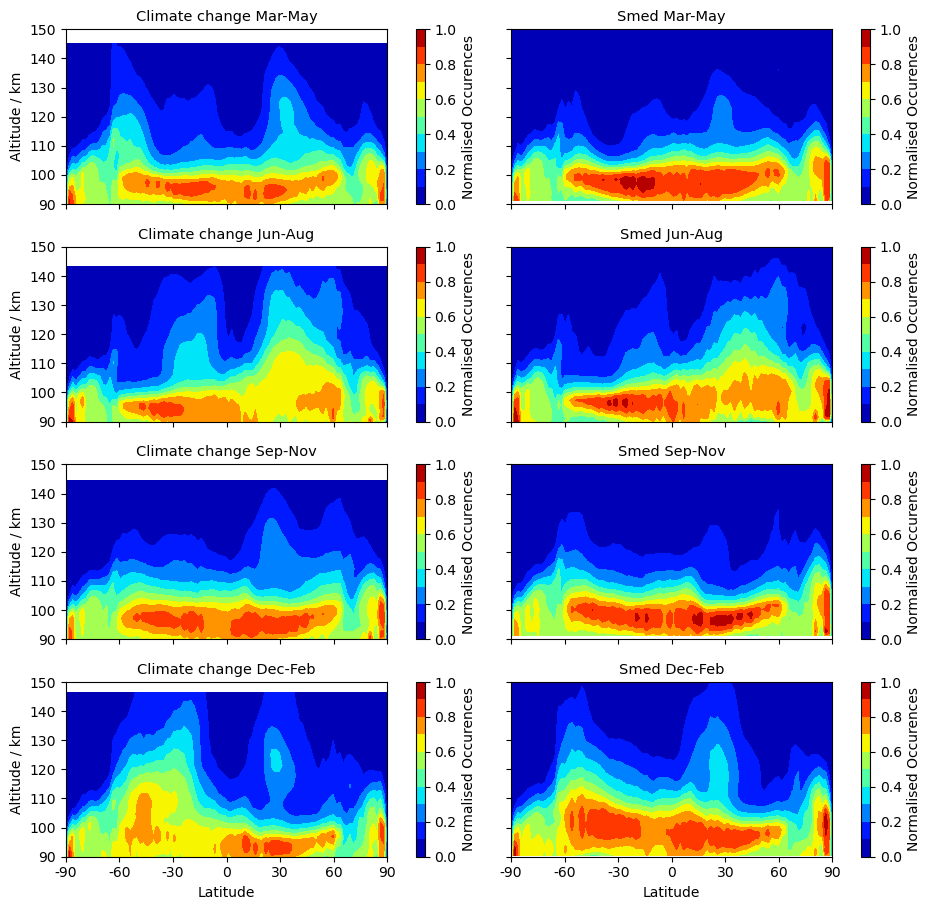

In [65]:
# Plotting NORMALISED number of occurences, so each of Smed and cli datasets are normalised to themselves (max/min values)


vmin_Smed = 0
vmax_Smed = 1 #12
nolevs_Smed = 11 #(vmax_Smed - vmin_Smed )+ 1

vmin_cli = 0
vmax_cli = 1 #12
nolevs_cli = 11 #(vmax_cli - vmin_cli )+ 1 

cmap = plt.get_cmap('jet')

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(10, 10), sharex=True, sharey=True)



subplots_cli = [SpEs_spr_alt_lat_norm_cli, SpEs_sum_alt_lat_norm_cli, SpEs_aut_alt_lat_norm_cli, SpEs_win_alt_lat_norm_cli]    #tot_SpEs_spr
alts_cli = [altavg_sl_spr_cli, altavg_sl_sum_cli, altavg_sl_aut_cli, altavg_sl_win_cli]


titles_cli = ['Mar-May', 'Jun-Aug', 'Sep-Nov', 'Dec-Feb']

for i, data_cli in enumerate(subplots_cli):
    ax = axes[i, 0]

    alts_plot = alts_cli[i]
    
    C = ax.contourf(lat, alts_plot, data_cli, cmap=cmap, 
                    levels=np.linspace(vmin_cli, vmax_cli, nolevs_cli), vmin=vmin_cli, vmax=vmax_cli
                   )

    if i == 3:
        ax.set_xlabel('Latitude')
        ax.set_xticks(np.linspace(-90, 90, 7))
        ax.set_xticklabels((-90, -60, -30, 0, 30, 60, 90))
    else:
        ax.set_xticks([])  

    ax.set_ylabel('Altitude / km')


    cbar = fig.colorbar(C, ax=ax, pad=0.07)
    cbar.set_label(r'Normalised Occurences')

    ax.set_title(f'Climate change {titles_cli[i]}', fontsize=10.5)
    
    

subplots_Smed = [SpEs_spr_alt_lat_norm_Smed, SpEs_sum_alt_lat_norm_Smed, SpEs_aut_alt_lat_norm_Smed, SpEs_win_alt_lat_norm_Smed] 

alts_Smed = [altavg_sl_spr_Smed, altavg_sl_sum_Smed, altavg_sl_aut_Smed, altavg_sl_win_Smed]

titles_Smed = ['Mar-May', 'Jun-Aug', 'Sep-Nov', 'Dec-Feb']

for i, data_Smed in enumerate(subplots_Smed):
    ax = axes[i, 1]

    alts_plot = alts_Smed[i]

    C = ax.contourf(lat, alts_plot, data_Smed, cmap=cmap, 
                    levels=np.linspace(vmin_Smed, vmax_Smed, nolevs_Smed), vmin=vmin_Smed, vmax=vmax_Smed
                   )

    if i == 3:
        ax.set_xlabel('Latitude')
        ax.set_xticks(np.linspace(-90, 90, 7))
        ax.set_xticklabels((-90, -60, -30, 0, 30, 60, 90))
    else:
        ax.set_xticks([])  

    cbar = fig.colorbar(C, ax=ax, pad=0.07)
    cbar.set_label(r'Normalised Occurences')

    ax.set_title(f'Smed {titles_Smed[i]}', fontsize=10.5)
    
ax.set_ylim(90,150)

plt.tight_layout(rect=[0.05, 0.03, 1, 0.95])

# figname = f'{run_name}_Daviddata_AltLat_norm.png'
# plt.savefig(f'Figures/Combined/{filename_append}/' + str(figname), dpi=400, bbox_inches='tight')

plt.show()


# Lat - LT - specific alt - SUMMER AND WINTER

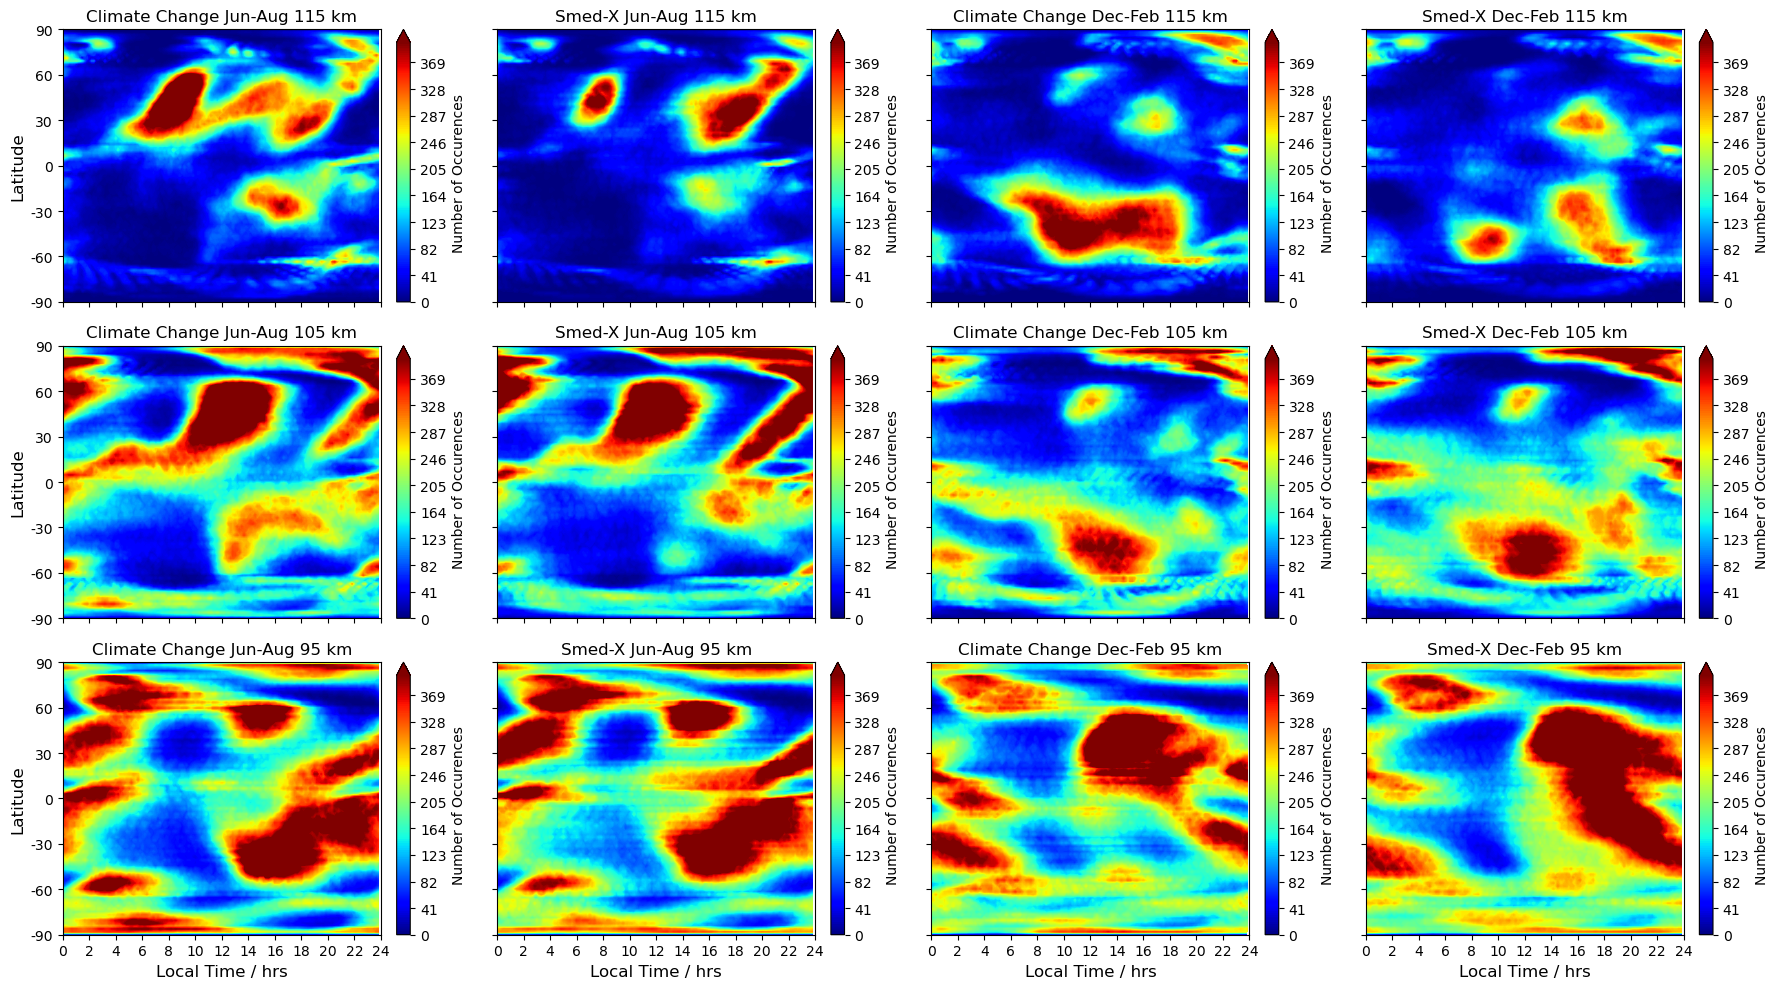

In [66]:
timeplot_144 = np.linspace(0, 24, 144, endpoint=False)

# cli
plot_alts = [115, 105, 95] #must be in reverse altitude order from high to low
winindices = np.argmin(np.abs(altavg_sl_win_cli.values - np.array(plot_alts)[:, None]), axis=1)
sumindices = np.argmin(np.abs(altavg_sl_sum_cli.values - np.array(plot_alts)[:, None]), axis=1)

# Smed
plot_alts = [115, 105, 95] #must be in reverse altitude order from high to low
winindices = np.argmin(np.abs(altavg_sl_win_Smed.values - np.array(plot_alts)[:, None]), axis=1)
sumindices = np.argmin(np.abs(altavg_sl_sum_Smed.values - np.array(plot_alts)[:, None]), axis=1)


fig_combined, axes_combined = plt.subplots(nrows=3, ncols=4, figsize=(18, 10),
                                           sharex=True, sharey=True)

vmin_Smed = 0
vmax_Smed = 400
nolevs_Smed = 401 #(vmax_Smed - vmin_Smed )+ 1 
cmap_Smed = plt.get_cmap('jet')

vmin_cli = 0
vmax_cli = 400
nolevs_cli = 401 #(vmax_cli - vmin_cli )+ 1 
cmap_cli = plt.get_cmap('jet')

for i, ialt in enumerate(plot_alts):
    altindex = winindices[i]
    tot_SpEs_sum_cli_plot = tot_SpEs_sum_cli[altindex, :, :]

    altindex = sumindices[i]
    tot_SpEs_win_cli_plot = tot_SpEs_win_cli[altindex, :, :]


    # cli
    subplots_cli = [tot_SpEs_sum_cli_plot, tot_SpEs_win_cli_plot]
    titles_cli = ['Jun-Aug', 'Dec-Feb']


    for j, data_cli in enumerate(subplots_cli):
        row_cli = i
        col_cli = j * 2
        ax_cli = axes_combined[row_cli, col_cli]

        C_cli = ax_cli.contourf(timeplot_144, lat, data_cli, cmap=cmap_cli
                                    ,levels=np.linspace(vmin_cli, vmax_cli, nolevs_cli),vmin=vmin_cli, vmax=vmax_cli
                                    ,extend='max'
                                    )

        if row_cli == 2:
            ax_cli.set_xlabel('Local Time / hrs',fontsize=12)
        if col_cli == 0:
            ax_cli.set_ylabel('Latitude',fontsize=12)
            ax_cli.set_yticks(np.linspace(-90, 90, 7))
            ax_cli.set_yticklabels((-90, -60, -30, 0, 30, 60, 90))
        xticks_cli = np.linspace(0, 24, 13)
        ax_cli.set_xticks(xticks_cli)
        ax_cli.set_xticklabels(xticks_cli.astype(int))
        ax_cli.set_title(f'Climate Change {titles_cli[j]} {plot_alts[i]} km')
        
        # Create individual colorbar for each subplot
        cbar_cli = fig_combined.colorbar(C_cli, ax=ax_cli, pad=0.04)
        cbar_cli.set_label(r'Number of Occurences')
        

for i, ialt in enumerate(plot_alts):
    altindex = winindices[i]
    tot_SpEs_sum_Smed_plot = tot_SpEs_sum_Smed[altindex, :, :]

    altindex = sumindices[i]
    tot_SpEs_win_Smed_plot = tot_SpEs_win_Smed[altindex, :, :]


    # Smed
    subplots_Smed = [tot_SpEs_sum_Smed_plot, tot_SpEs_win_Smed_plot]
    titles_Smed = ['Jun-Aug', 'Dec-Feb']


    for j, data_Smed in enumerate(subplots_Smed):
        row_Smed = i
        col_Smed = j * 2 + 1
        ax_Smed = axes_combined[row_Smed, col_Smed]

        C_Smed = ax_Smed.contourf(timeplot_144, lat, data_Smed, cmap=cmap_Smed
                                    ,levels=np.linspace(vmin_Smed, vmax_Smed, nolevs_Smed),vmin=vmin_Smed, vmax=vmax_Smed
                                    ,extend='max'
                                    )

        if row_Smed == 2:
            ax_Smed.set_xlabel('Local Time / hrs',fontsize=12)
        if col_Smed == 0:
            ax_Smed.set_ylabel('Latitude',fontsize=12)
            ax_Smed.set_yticks(np.linspace(-90, 90, 7))
            ax_Smed.set_yticklabels((-90, -60, -30, 0, 30, 60, 90))
        xticks_Smed = np.linspace(0, 24, 13)
        ax_Smed.set_xticks(xticks_Smed)
        ax_Smed.set_xticklabels(xticks_Smed.astype(int))
        ax_Smed.set_title(f'Smed-X {titles_Smed[j]} {plot_alts[i]} km')
        
        # Create individual colorbar for each subplot
        cbar_Smed = fig_combined.colorbar(C_Smed, ax=ax_Smed, pad=0.04)
        cbar_Smed.set_label(r'Number of Occurences')



plt.tight_layout()

# figname_combined = f'{run_name}_Daviddata_Lat_vs_LT_3xalt_sum_cli-win.png'
#plt.savefig(f'Figures/Combined/{filename_append}/' + str(figname_combined), dpi=400, bbox_inches='tight')

plt.show()


In [67]:
# Normalise Data - WACCM
#============================

plot_alts = [115, 105, 95] #must be in reverse altitude order from high to low

winindices_cli = np.argmin(np.abs(altavg_sl_win_cli.values - np.array(plot_alts)[:, None]), axis=1)
sumindices_cli = np.argmin(np.abs(altavg_sl_sum_cli.values - np.array(plot_alts)[:, None]), axis=1)
autindices_cli = np.argmin(np.abs(altavg_sl_aut_cli.values - np.array(plot_alts)[:, None]), axis=1)
sprindices_cli = np.argmin(np.abs(altavg_sl_spr_cli.values - np.array(plot_alts)[:, None]), axis=1)


cli_data_sum = xr.DataArray(tot_SpEs_sum_cli[sumindices_cli, :, :], dims=('alt','lat', 'LT_L'), coords={'season': 'summer'})
cli_data_win = xr.DataArray(tot_SpEs_win_cli[winindices_cli, :, :], dims=('alt','lat', 'LT_L'), coords={'season': 'winter'})
cli_data_spr = xr.DataArray(tot_SpEs_spr_cli[sprindices_cli, :, :], dims=('alt','lat', 'LT_L'), coords={'season': 'spring'})
cli_data_aut = xr.DataArray(tot_SpEs_aut_cli[autindices_cli, :, :], dims=('alt','lat', 'LT_L'), coords={'season': 'autumn'})

combined_w_cli = xr.concat([cli_data_sum, cli_data_win, cli_data_spr, cli_data_aut], dim='season')

#======================================
# Normalise Data by Min-Max
#======================================

overall_min_w_cli = combined_w_cli.min(dim=['season', 'alt', 'lat', 'LT_L'])
overall_max_w_cli = combined_w_cli.max(dim=['season', 'alt', 'lat', 'LT_L'])

tot_SpEs_sum_115_norm_cli = (tot_SpEs_sum_cli[sumindices_cli[0], :, :] - overall_min_w_cli) / (overall_max_w_cli - overall_min_w_cli)
tot_SpEs_sum_105_norm_cli = (tot_SpEs_sum_cli[sumindices_cli[1], :, :] - overall_min_w_cli) / (overall_max_w_cli - overall_min_w_cli)
tot_SpEs_sum_95_norm_cli =  (tot_SpEs_sum_cli[sumindices_cli[2], :, :] - overall_min_w_cli) / (overall_max_w_cli - overall_min_w_cli)

tot_SpEs_win_115_norm_cli = (tot_SpEs_win_cli[winindices_cli[0], :, :] - overall_min_w_cli) / (overall_max_w_cli - overall_min_w_cli)
tot_SpEs_win_105_norm_cli = (tot_SpEs_win_cli[winindices_cli[1], :, :] - overall_min_w_cli) / (overall_max_w_cli - overall_min_w_cli)
tot_SpEs_win_95_norm_cli =  (tot_SpEs_win_cli[winindices_cli[2], :, :] - overall_min_w_cli) / (overall_max_w_cli - overall_min_w_cli)

tot_SpEs_spr_115_norm_cli = (tot_SpEs_spr_cli[sprindices_cli[0], :, :] - overall_min_w_cli) / (overall_max_w_cli - overall_min_w_cli)
tot_SpEs_spr_105_norm_cli = (tot_SpEs_spr_cli[sprindices_cli[1], :, :] - overall_min_w_cli) / (overall_max_w_cli - overall_min_w_cli)
tot_SpEs_spr_95_norm_cli =  (tot_SpEs_spr_cli[sprindices_cli[2], :, :] - overall_min_w_cli) / (overall_max_w_cli - overall_min_w_cli)

tot_SpEs_aut_115_norm_cli = (tot_SpEs_aut_cli[autindices_cli[0], :, :] - overall_min_w_cli) / (overall_max_w_cli - overall_min_w_cli)
tot_SpEs_aut_105_norm_cli = (tot_SpEs_aut_cli[autindices_cli[1], :, :] - overall_min_w_cli) / (overall_max_w_cli - overall_min_w_cli)
tot_SpEs_aut_95_norm_cli =  (tot_SpEs_aut_cli[autindices_cli[2], :, :] - overall_min_w_cli) / (overall_max_w_cli - overall_min_w_cli)

In [68]:
# Normalise Data - WACCM
#============================

plot_alts = [115, 105, 95] #must be in reverse altitude order from high to low

winindices_Smed = np.argmin(np.abs(altavg_sl_win_Smed.values - np.array(plot_alts)[:, None]), axis=1)
sumindices_Smed = np.argmin(np.abs(altavg_sl_sum_Smed.values - np.array(plot_alts)[:, None]), axis=1)
autindices_Smed = np.argmin(np.abs(altavg_sl_aut_Smed.values - np.array(plot_alts)[:, None]), axis=1)
sprindices_Smed = np.argmin(np.abs(altavg_sl_spr_Smed.values - np.array(plot_alts)[:, None]), axis=1)


Smed_data_sum = xr.DataArray(tot_SpEs_sum_Smed[sumindices_Smed, :, :], dims=('alt','lat', 'LT_L'), coords={'season': 'summer'})
Smed_data_win = xr.DataArray(tot_SpEs_win_Smed[winindices_Smed, :, :], dims=('alt','lat', 'LT_L'), coords={'season': 'winter'})
Smed_data_spr = xr.DataArray(tot_SpEs_spr_Smed[sprindices_Smed, :, :], dims=('alt','lat', 'LT_L'), coords={'season': 'spring'})
Smed_data_aut = xr.DataArray(tot_SpEs_aut_Smed[autindices_Smed, :, :], dims=('alt','lat', 'LT_L'), coords={'season': 'autumn'})

combined_w_Smed = xr.concat([Smed_data_sum, Smed_data_win, Smed_data_spr, Smed_data_aut], dim='season')

#======================================
# Normalise Data by Min-Max
#======================================

overall_min_w_Smed = combined_w_Smed.min(dim=['season', 'alt', 'lat', 'LT_L'])
overall_max_w_Smed = combined_w_Smed.max(dim=['season', 'alt', 'lat', 'LT_L'])

tot_SpEs_sum_115_norm_Smed = (tot_SpEs_sum_Smed[sumindices_Smed[0], :, :] - overall_min_w_Smed) / (overall_max_w_Smed - overall_min_w_Smed)
tot_SpEs_sum_105_norm_Smed = (tot_SpEs_sum_Smed[sumindices_Smed[1], :, :] - overall_min_w_Smed) / (overall_max_w_Smed - overall_min_w_Smed)
tot_SpEs_sum_95_norm_Smed =  (tot_SpEs_sum_Smed[sumindices_Smed[2], :, :] - overall_min_w_Smed) / (overall_max_w_Smed - overall_min_w_Smed)

tot_SpEs_win_115_norm_Smed = (tot_SpEs_win_Smed[winindices_Smed[0], :, :] - overall_min_w_Smed) / (overall_max_w_Smed - overall_min_w_Smed)
tot_SpEs_win_105_norm_Smed = (tot_SpEs_win_Smed[winindices_Smed[1], :, :] - overall_min_w_Smed) / (overall_max_w_Smed - overall_min_w_Smed)
tot_SpEs_win_95_norm_Smed =  (tot_SpEs_win_Smed[winindices_Smed[2], :, :] - overall_min_w_Smed) / (overall_max_w_Smed - overall_min_w_Smed)

tot_SpEs_spr_115_norm_Smed = (tot_SpEs_spr_Smed[sprindices_Smed[0], :, :] - overall_min_w_Smed) / (overall_max_w_Smed - overall_min_w_Smed)
tot_SpEs_spr_105_norm_Smed = (tot_SpEs_spr_Smed[sprindices_Smed[1], :, :] - overall_min_w_Smed) / (overall_max_w_Smed - overall_min_w_Smed)
tot_SpEs_spr_95_norm_Smed =  (tot_SpEs_spr_Smed[sprindices_Smed[2], :, :] - overall_min_w_Smed) / (overall_max_w_Smed - overall_min_w_Smed)

tot_SpEs_aut_115_norm_Smed = (tot_SpEs_aut_Smed[autindices_Smed[0], :, :] - overall_min_w_Smed) / (overall_max_w_Smed - overall_min_w_Smed)
tot_SpEs_aut_105_norm_Smed = (tot_SpEs_aut_Smed[autindices_Smed[1], :, :] - overall_min_w_Smed) / (overall_max_w_Smed - overall_min_w_Smed)
tot_SpEs_aut_95_norm_Smed =  (tot_SpEs_aut_Smed[autindices_Smed[2], :, :] - overall_min_w_Smed) / (overall_max_w_Smed - overall_min_w_Smed)

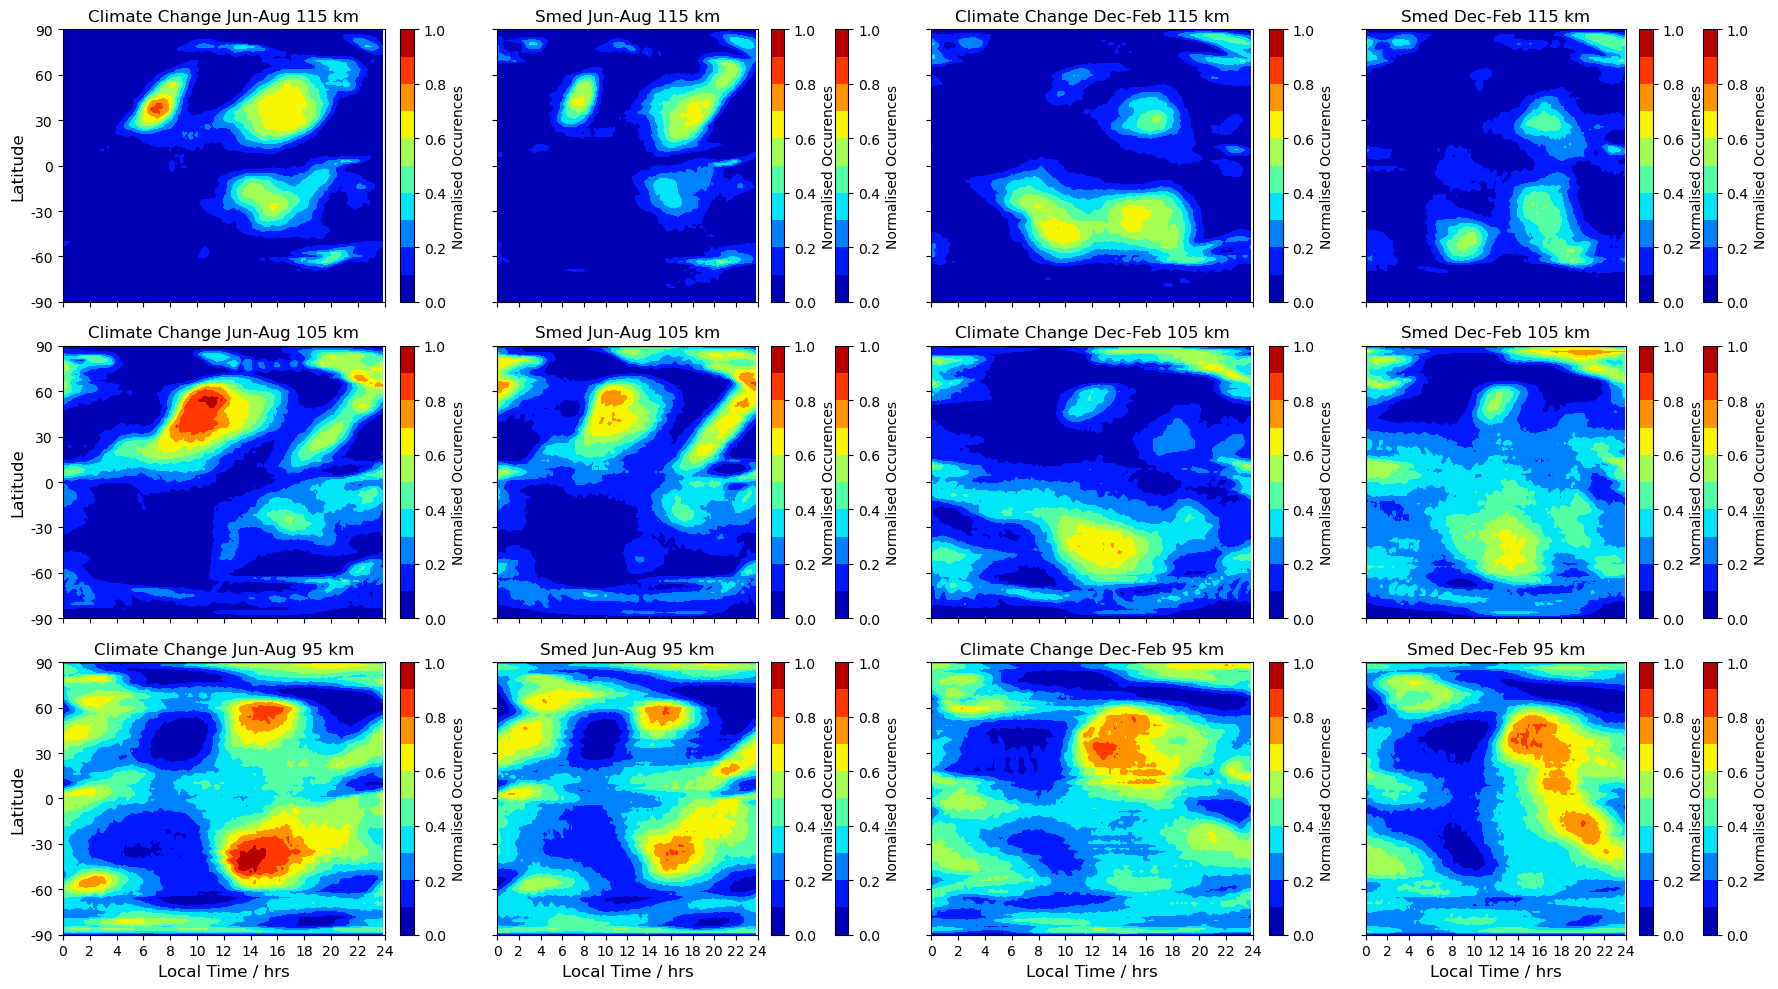

In [69]:
#==============================
# Plot Normalised Data 
#==============================

timeplot_144 = np.linspace(0, 24, 144, endpoint=False)

#cli
plot_alts = [115, 105, 95] #must be in reverse altitude order from high to low
win_cli_indices = np.argmin(np.abs(altavg_sl_win_cli.values - np.array(plot_alts)[:, None]), axis=1)
sum_cli_indices = np.argmin(np.abs(altavg_sl_sum_cli.values - np.array(plot_alts)[:, None]), axis=1)

#Smed


fig_combined, axes_combined = plt.subplots(nrows=3, ncols=4, figsize=(18, 10),
                                           sharex=True, sharey=True)

vmin_Smed = 0#
vmax_Smed = 1
nolevs_Smed = 11 #(vmax_Smed - vmin_Smed )+ 1 
cmap_Smed = plt.get_cmap('jet')

vmin_cli = 0#-1.5
vmax_cli = 1#4
nolevs_cli = 11 #(vmax_cli - vmin_cli )+ 1 
cmap_cli = plt.get_cmap('jet')

# Iterate over altitudes
for i, ialt in enumerate(plot_alts):

    if ialt == 115:
        sum_cli_data = tot_SpEs_sum_115_norm_cli 
        win_cli_data = tot_SpEs_win_115_norm_cli 
    elif ialt == 105:
        sum_cli_data = tot_SpEs_sum_105_norm_cli 
        win_cli_data = tot_SpEs_win_105_norm_cli 
    else:
        sum_cli_data = tot_SpEs_sum_95_norm_cli 
        win_cli_data = tot_SpEs_win_95_norm_cli 
        
    subplots_cli = [sum_cli_data, win_cli_data]
    titles_cli = ['Jun-Aug', 'Dec-Feb']

    for j, data_cli in enumerate(subplots_cli):
        row_cli = i
        col_cli = j * 2  
        ax_cli = axes_combined[row_cli, col_cli]

        C_cli = ax_cli.contourf(timeplot_144, lat, data_cli, cmap=cmap_cli
                                    ,levels=np.linspace(vmin_cli, vmax_cli, nolevs_cli),vmin=vmin_cli, vmax=vmax_cli
                                   # ,extend='max'
                                    )

        if row_cli == 2:
            ax_cli.set_xlabel('Local Time / hrs',fontsize=12)
        if col_cli == 0:
            ax_cli.set_ylabel('Latitude',fontsize=12)
            ax_cli.set_yticks(np.linspace(-90, 90, 7))
            ax_cli.set_yticklabels((-90, -60, -30, 0, 30, 60, 90))
        xticks_cli = np.linspace(0, 24, 13)
        ax_cli.set_xticks(xticks_cli)
        ax_cli.set_xticklabels(xticks_cli.astype(int))
        ax_cli.set_title(f'Climate Change {titles_cli[j]} {plot_alts[i]} km')
        

        cbar_cli = fig_combined.colorbar(C_cli, ax=ax_cli, pad=0.04)
        cbar_cli.set_label(r'Normalised Occurences')
        

        if ialt == 115:
            sum_Smed_data = tot_SpEs_sum_115_norm_Smed 
            win_Smed_data = tot_SpEs_win_115_norm_Smed 
        elif ialt == 105:
            sum_Smed_data = tot_SpEs_sum_105_norm_Smed 
            win_Smed_data = tot_SpEs_win_105_norm_Smed 
        else:
            sum_Smed_data = tot_SpEs_sum_95_norm_Smed 
            win_Smed_data = tot_SpEs_win_95_norm_Smed 
            
        subplots_Smed = [sum_Smed_data, win_Smed_data]
        titles_Smed = ['Jun-Aug', 'Dec-Feb']
    
        for j, data_Smed in enumerate(subplots_Smed):
            row_Smed = i
            col_Smed = j * 2 + 1
            ax_Smed = axes_combined[row_Smed, col_Smed]
    
            C_Smed = ax_Smed.contourf(timeplot_144, lat, data_Smed, cmap=cmap_Smed
                                        ,levels=np.linspace(vmin_Smed, vmax_Smed, nolevs_Smed),vmin=vmin_Smed, vmax=vmax_Smed
                                       # ,extend='max'
                                        )
    
            if row_Smed == 2:
                ax_Smed.set_xlabel('Local Time / hrs',fontsize=12)
            if col_Smed == 0:
                ax_Smed.set_ylabel('Latitude',fontsize=12)
                ax_Smed.set_yticks(np.linspace(-90, 90, 7))
                ax_Smed.set_yticklabels((-90, -60, -30, 0, 30, 60, 90))
            xticks_Smed = np.linspace(0, 24, 13)
            ax_Smed.set_xticks(xticks_Smed)
            ax_Smed.set_xticklabels(xticks_Smed.astype(int))
            ax_Smed.set_title(f'Smed {titles_Smed[j]} {plot_alts[i]} km')
            
    
            cbar_Smed = fig_combined.colorbar(C_Smed, ax=ax_Smed, pad=0.04)
            cbar_Smed.set_label(r'Normalised Occurences')



plt.tight_layout()

# figname_combined = f'{run_name}_Daviddata_Lat_vs_LT_3xalt_sum_cli-win_cli_norm.png'
# plt.savefig(f'./Figures/Combined/{filename_append}/' + str(figname_combined), dpi=400, bbox_inches='tight')

plt.show()

# Winds

In [95]:
#============================
# Climate Chnage data normalisation: 15-20
#============================

#-------------------------------------------------------------------------------------------------------------------------------------------
ind_15_20_cli = np.where((intlat >= 15) & (intlat <= 20))[0]

SpEs_spr_15_20_cli = np.squeeze(tot_SpEs_spr_cli_5deg[:, ind_15_20_cli, :])    #(19, 144)
SpEs_sum_15_20_cli = np.squeeze(tot_SpEs_sum_cli_5deg[:, ind_15_20_cli, :])
SpEs_aut_15_20_cli = np.squeeze(tot_SpEs_aut_cli_5deg[:, ind_15_20_cli, :])
SpEs_win_15_20_cli = np.squeeze(tot_SpEs_win_cli_5deg[:, ind_15_20_cli, :])

SpEs_spr_altLT_15_20_cli = xr.DataArray(SpEs_spr_15_20_cli, dims=('lev_sl', 'LT'), coords={'season': 'spring'})
SpEs_sum_altLT_15_20_cli = xr.DataArray(SpEs_sum_15_20_cli, dims=('lev_sl', 'LT'), coords={'season': 'summer'})
SpEs_aut_altLT_15_20_cli = xr.DataArray(SpEs_aut_15_20_cli, dims=('lev_sl', 'LT'), coords={'season': 'autumn'})
SpEs_win_altLT_15_20_cli = xr.DataArray(SpEs_win_15_20_cli, dims=('lev_sl', 'LT'), coords={'season': 'winter'})

combined_15_20_cli = xr.concat([SpEs_spr_altLT_15_20_cli, SpEs_sum_altLT_15_20_cli, SpEs_aut_altLT_15_20_cli, SpEs_win_altLT_15_20_cli], dim='season')

#======================================
# Normalise Data by Min-Max
#======================================

overall_min_15_20_cli = combined_15_20_cli.min(dim=['season', 'lev_sl', 'LT'])
overall_max_15_20_cli = combined_15_20_cli.max(dim=['season', 'lev_sl', 'LT'])

SpEs_spr_altLT_15_20_norm_cli = (SpEs_spr_altLT_15_20_cli - overall_min_15_20_cli) / (overall_max_15_20_cli - overall_min_15_20_cli)
SpEs_sum_altLT_15_20_norm_cli = (SpEs_sum_altLT_15_20_cli - overall_min_15_20_cli) / (overall_max_15_20_cli - overall_min_15_20_cli)
SpEs_aut_altLT_15_20_norm_cli = (SpEs_aut_altLT_15_20_cli - overall_min_15_20_cli) / (overall_max_15_20_cli - overall_min_15_20_cli)
SpEs_win_altLT_15_20_norm_cli = (SpEs_win_altLT_15_20_cli - overall_min_15_20_cli) / (overall_max_15_20_cli - overall_min_15_20_cli)

(23, 144)


In [117]:
#============================
# Climate Change Data Normalisation: -65 to -55
#============================

# Get indices where latitude is between -65 and -55
ind_65_55_cli = np.where((intlat >= -65) & (intlat <= -60))[0]

# Extract and squeeze data for the specified latitude range
SpEs_spr_65_55_cli = np.squeeze(tot_SpEs_spr_cli_5deg[:, ind_65_55_cli, :])
SpEs_sum_65_55_cli = np.squeeze(tot_SpEs_sum_cli_5deg[:, ind_65_55_cli, :])
SpEs_aut_65_55_cli = np.squeeze(tot_SpEs_aut_cli_5deg[:, ind_65_55_cli, :])
SpEs_win_65_55_cli = np.squeeze(tot_SpEs_win_cli_5deg[:, ind_65_55_cli, :])

# Create DataArrays for each season
SpEs_spr_altLT_65_55_cli = xr.DataArray(SpEs_spr_65_55_cli, dims=('lev_sl', 'LT'), coords={'season': 'spring'})
SpEs_sum_altLT_65_55_cli = xr.DataArray(SpEs_sum_65_55_cli, dims=('lev_sl', 'LT'), coords={'season': 'summer'})
SpEs_aut_altLT_65_55_cli = xr.DataArray(SpEs_aut_65_55_cli, dims=('lev_sl', 'LT'), coords={'season': 'autumn'})
SpEs_win_altLT_65_55_cli = xr.DataArray(SpEs_win_65_55_cli, dims=('lev_sl', 'LT'), coords={'season': 'winter'})

# Combine DataArrays across seasons
combined_65_55_cli = xr.concat([SpEs_spr_altLT_65_55_cli, SpEs_sum_altLT_65_55_cli, SpEs_aut_altLT_65_55_cli, SpEs_win_altLT_65_55_cli], dim='season')

#======================================
# Normalise Data by Min-Max
#======================================

# Get overall min and max across all dimensions
overall_min_65_55_cli = combined_65_55_cli.min(dim=['season', 'lev_sl', 'LT'])
overall_max_65_55_cli = combined_65_55_cli.max(dim=['season', 'lev_sl', 'LT'])

# Perform min-max normalisation
SpEs_spr_altLT_65_55_norm_cli = (SpEs_spr_altLT_65_55_cli - overall_min_65_55_cli) / (overall_max_65_55_cli - overall_min_65_55_cli)
SpEs_sum_altLT_65_55_norm_cli = (SpEs_sum_altLT_65_55_cli - overall_min_65_55_cli) / (overall_max_65_55_cli - overall_min_65_55_cli)
SpEs_aut_altLT_65_55_norm_cli = (SpEs_aut_altLT_65_55_cli - overall_min_65_55_cli) / (overall_max_65_55_cli - overall_min_65_55_cli)
SpEs_win_altLT_65_55_norm_cli = (SpEs_win_altLT_65_55_cli - overall_min_65_55_cli) / (overall_max_65_55_cli - overall_min_65_55_cli)

In [122]:
#============================
# Smed data normalisation: 15-20
#============================

#-------------------------------------------------------------------------------------------------------------------------------------------
ind_15_20_Smed = np.where((intlat >= 15) & (intlat <= 20))[0]

SpEs_spr_15_20_Smed = np.squeeze(tot_SpEs_spr_Smed_5deg[:, ind_15_20_Smed, :])    #(19, 144)
SpEs_sum_15_20_Smed = np.squeeze(tot_SpEs_sum_Smed_5deg[:, ind_15_20_Smed, :])
SpEs_aut_15_20_Smed = np.squeeze(tot_SpEs_aut_Smed_5deg[:, ind_15_20_Smed, :])
SpEs_win_15_20_Smed = np.squeeze(tot_SpEs_win_Smed_5deg[:, ind_15_20_Smed, :])

SpEs_spr_altLT_15_20_Smed = xr.DataArray(SpEs_spr_15_20_Smed, dims=('lev_sl', 'LT'), coords={'season': 'spring'})
SpEs_sum_altLT_15_20_Smed = xr.DataArray(SpEs_sum_15_20_Smed, dims=('lev_sl', 'LT'), coords={'season': 'summer'})
SpEs_aut_altLT_15_20_Smed = xr.DataArray(SpEs_aut_15_20_Smed, dims=('lev_sl', 'LT'), coords={'season': 'autumn'})
SpEs_win_altLT_15_20_Smed = xr.DataArray(SpEs_win_15_20_Smed, dims=('lev_sl', 'LT'), coords={'season': 'winter'})

combined_15_20_Smed = xr.concat([SpEs_spr_altLT_15_20_Smed, SpEs_sum_altLT_15_20_Smed, SpEs_aut_altLT_15_20_Smed, SpEs_win_altLT_15_20_Smed], dim='season')

#======================================
# Normalise Data by Min-Max
#======================================

overall_min_15_20_Smed = combined_15_20_Smed.min(dim=['season', 'lev_sl', 'LT'])
overall_max_15_20_Smed = combined_15_20_Smed.max(dim=['season', 'lev_sl', 'LT'])

SpEs_spr_altLT_15_20_norm_Smed = (SpEs_spr_altLT_15_20_Smed - overall_min_15_20_Smed) / (overall_max_15_20_Smed - overall_min_15_20_Smed)
SpEs_sum_altLT_15_20_norm_Smed = (SpEs_sum_altLT_15_20_Smed - overall_min_15_20_Smed) / (overall_max_15_20_Smed - overall_min_15_20_Smed)
SpEs_aut_altLT_15_20_norm_Smed = (SpEs_aut_altLT_15_20_Smed - overall_min_15_20_Smed) / (overall_max_15_20_Smed - overall_min_15_20_Smed)
SpEs_win_altLT_15_20_norm_Smed = (SpEs_win_altLT_15_20_Smed - overall_min_15_20_Smed) / (overall_max_15_20_Smed - overall_min_15_20_Smed)

In [123]:
#============================
# Smedmate Chnage data normalisation: 45-50
#============================

ind_65_55_Smed = np.where((intlat >= -65) & (intlat <= -60))[0]

SpEs_spr_65_55_Smed = np.squeeze(tot_SpEs_spr_Smed_5deg[:, ind_65_55_Smed, :])
SpEs_sum_65_55_Smed = np.squeeze(tot_SpEs_sum_Smed_5deg[:, ind_65_55_Smed, :])
SpEs_aut_65_55_Smed = np.squeeze(tot_SpEs_aut_Smed_5deg[:, ind_65_55_Smed, :])
SpEs_win_65_55_Smed = np.squeeze(tot_SpEs_win_Smed_5deg[:, ind_65_55_Smed, :])

SpEs_spr_altLT_65_55_Smed = xr.DataArray(SpEs_spr_65_55_Smed, dims=('lev_sl', 'LT'), coords={'season': 'spring'})
SpEs_sum_altLT_65_55_Smed = xr.DataArray(SpEs_sum_65_55_Smed, dims=('lev_sl', 'LT'), coords={'season': 'summer'})
SpEs_aut_altLT_65_55_Smed = xr.DataArray(SpEs_aut_65_55_Smed, dims=('lev_sl', 'LT'), coords={'season': 'autumn'})
SpEs_win_altLT_65_55_Smed = xr.DataArray(SpEs_win_65_55_Smed, dims=('lev_sl', 'LT'), coords={'season': 'winter'})

combined_65_55_Smed = xr.concat([SpEs_spr_altLT_65_55_Smed, SpEs_sum_altLT_65_55_Smed, SpEs_aut_altLT_65_55_Smed, SpEs_win_altLT_65_55_Smed], dim='season')

#======================================
# Normalise Data by Min-Max
#======================================

overall_min_65_55_Smed = combined_65_55_Smed.min(dim=['season', 'lev_sl', 'LT'])
overall_max_65_55_Smed = combined_65_55_Smed.max(dim=['season', 'lev_sl', 'LT'])

SpEs_spr_altLT_65_55_norm_Smed = (SpEs_spr_altLT_65_55_Smed - overall_min_65_55_Smed) / (overall_max_65_55_Smed - overall_min_65_55_Smed)
SpEs_sum_altLT_65_55_norm_Smed = (SpEs_sum_altLT_65_55_Smed - overall_min_65_55_Smed) / (overall_max_65_55_Smed - overall_min_65_55_Smed)
SpEs_aut_altLT_65_55_norm_Smed = (SpEs_aut_altLT_65_55_Smed - overall_min_65_55_Smed) / (overall_max_65_55_Smed - overall_min_65_55_Smed)
SpEs_win_altLT_65_55_norm_Smed = (SpEs_win_altLT_65_55_Smed - overall_min_65_55_Smed) / (overall_max_65_55_Smed - overall_min_65_55_Smed)

In [129]:
# Concatenate Climate and Smed data across a new dimension for joint normalization
combined_all = xr.concat([combined_15_20_cli, combined_15_20_Smed], dim='source')

#======================================
# Global Min-Max Normalization
#======================================

overall_min_all = combined_all.min(dim=['season', 'lev_sl', 'LT', 'source'])
overall_max_all = combined_all.max(dim=['season', 'lev_sl', 'LT', 'source'])

#============================
# Normalise Climate Data 
#============================

SpEs_spr_altLT_15_20_norm_cli = (SpEs_spr_altLT_15_20_cli - overall_min_all) / (overall_max_all - overall_min_all)
SpEs_sum_altLT_15_20_norm_cli = (SpEs_sum_altLT_15_20_cli - overall_min_all) / (overall_max_all - overall_min_all)
SpEs_aut_altLT_15_20_norm_cli = (SpEs_aut_altLT_15_20_cli - overall_min_all) / (overall_max_all - overall_min_all)
SpEs_win_altLT_15_20_norm_cli = (SpEs_win_altLT_15_20_cli - overall_min_all) / (overall_max_all - overall_min_all)

#============================
# Normalise Smed Data 
#============================

SpEs_spr_altLT_15_20_norm_Smed = (SpEs_spr_altLT_15_20_Smed - overall_min_all) / (overall_max_all - overall_min_all)
SpEs_sum_altLT_15_20_norm_Smed = (SpEs_sum_altLT_15_20_Smed - overall_min_all) / (overall_max_all - overall_min_all)
SpEs_aut_altLT_15_20_norm_Smed = (SpEs_aut_altLT_15_20_Smed - overall_min_all) / (overall_max_all - overall_min_all)
SpEs_win_altLT_15_20_norm_Smed = (SpEs_win_altLT_15_20_Smed - overall_min_all) / (overall_max_all - overall_min_all)

In [130]:
# Concatenate Climate and Smed data across a new dimension for joint normalization
combined_all_65_55 = xr.concat([combined_65_55_cli, combined_65_55_Smed], dim='source')

#======================================
# Global Min-Max Normalization (-65 to -55)
#======================================

overall_min_all_65_55 = combined_all_65_55.min(dim=['season', 'lev_sl', 'LT', 'source'])
overall_max_all_65_55 = combined_all_65_55.max(dim=['season', 'lev_sl', 'LT', 'source'])

#============================
# Normalise Climate Data 
#============================

SpEs_spr_altLT_65_55_norm_cli = (SpEs_spr_altLT_65_55_cli - overall_min_all_65_55) / (overall_max_all_65_55 - overall_min_all_65_55)
SpEs_sum_altLT_65_55_norm_cli = (SpEs_sum_altLT_65_55_cli - overall_min_all_65_55) / (overall_max_all_65_55 - overall_min_all_65_55)
SpEs_aut_altLT_65_55_norm_cli = (SpEs_aut_altLT_65_55_cli - overall_min_all_65_55) / (overall_max_all_65_55 - overall_min_all_65_55)
SpEs_win_altLT_65_55_norm_cli = (SpEs_win_altLT_65_55_cli - overall_min_all_65_55) / (overall_max_all_65_55 - overall_min_all_65_55)

#============================
# Normalise Smed Data 
#============================

SpEs_spr_altLT_65_55_norm_Smed = (SpEs_spr_altLT_65_55_Smed - overall_min_all_65_55) / (overall_max_all_65_55 - overall_min_all_65_55)
SpEs_sum_altLT_65_55_norm_Smed = (SpEs_sum_altLT_65_55_Smed - overall_min_all_65_55) / (overall_max_all_65_55 - overall_min_all_65_55)
SpEs_aut_altLT_65_55_norm_Smed = (SpEs_aut_altLT_65_55_Smed - overall_min_all_65_55) / (overall_max_all_65_55 - overall_min_all_65_55)
SpEs_win_altLT_65_55_norm_Smed = (SpEs_win_altLT_65_55_Smed - overall_min_all_65_55) / (overall_max_all_65_55 - overall_min_all_65_55)

In [112]:
# Open/create dataset for seasons, selecting only UT=00:00 each day

ds_months_sets = [['03', '04', '05'] , ['12', '01', '02']]
Monthstr_sets = [['Mar', 'Apr', 'May'] , ['Dec', 'Jan', 'Feb']]
season_set = ['summer', 'winter']

# run_name = 'Wuhu_IonTr_run'


plotdata = {}

for season_idx, months in enumerate(ds_months_sets):
    season_name = season_set[season_idx]
    Monthstr = Monthstr_sets[season_idx]
    
    file_paths = []
    for month in months:
        pattern = f'/resstore/b0243/Data/Sporadic_E/FX2100f19f19mg16NaFeMgiontransport_OUTPUT/hist/FX2100f19f19mg16NaFeMgiontransport.cam.h2.2100-{month}-*.nc'
        # Use glob to get all files matching the pattern
        file_paths.extend(glob.glob(pattern))
    
    ds = xr.open_mfdataset(file_paths, combine='by_coords')
    
    # Select only UT00:00 time steps
    ds = ds.isel(time=slice(None, None, 24))
    
    #----------------------------------------------------

    lon = ds['lon']
    lat = ds['lat']
    geopH = ds['Z3'] / 1000  # m -> km
    temp = ds['T']
    U = ds['U']
    
    Re = 6378  # Earth radius in km
    alt = (geopH * Re) / (Re - geopH)
    altav = alt.mean(dim='time')
    
    Uav = U.mean(dim='time')
    Tav = temp.mean(dim='time')
    
    alt_min, alt_max = 90, 155  # km
    
    #----------------------------------------------------
    # Calculate local time offset in hours (assuming 15 degrees = 1 hour difference)
    local_time_offset = lon / 15.0  

    # UT hour
    snapshot_utc_time = 0  # hours

    # Convert UTC time (12:00) to local time for each longitude
    local_times = (snapshot_utc_time + local_time_offset) % 24
    #----------------------------------------------------

    for lat_val in [-60, 20]:
        lat_idx = np.abs(lat - lat_val).argmin()
        
        altll = altav.sel(lat=lat[lat_idx]).mean(dim='lon')
        
        # alt_min_idx = np.abs(altll - alt_min).argmin().values
        # alt_max_idx = np.abs(altll - alt_max).argmin().values
        
        alt_min_idx = 59   
        alt_max_idx = 37 
        
        U_plot = Uav.sel(lat=lat[lat_idx]).isel(lev=slice(alt_max_idx, alt_min_idx + 1))
        T_plot = Tav.sel(lat=lat[lat_idx]).isel(lev=slice(alt_max_idx, alt_min_idx + 1))
        alt_plot = altll.isel(lev=slice(alt_max_idx, alt_min_idx + 1))
        
        plotdata[f'U_plot_{lat_val}_{season_name}'] = U_plot
        plotdata[f'T_plot_{lat_val}_{season_name}'] = T_plot
        plotdata[f'alt_plot_{lat_val}_{season_name}'] = alt_plot

print('done')
print(plotdata.keys())  # Check keys in the dictionary

done
dict_keys(['U_plot_-60_summer', 'T_plot_-60_summer', 'alt_plot_-60_summer', 'U_plot_20_summer', 'T_plot_20_summer', 'alt_plot_20_summer', 'U_plot_-60_winter', 'T_plot_-60_winter', 'alt_plot_-60_winter', 'U_plot_20_winter', 'T_plot_20_winter', 'alt_plot_20_winter'])


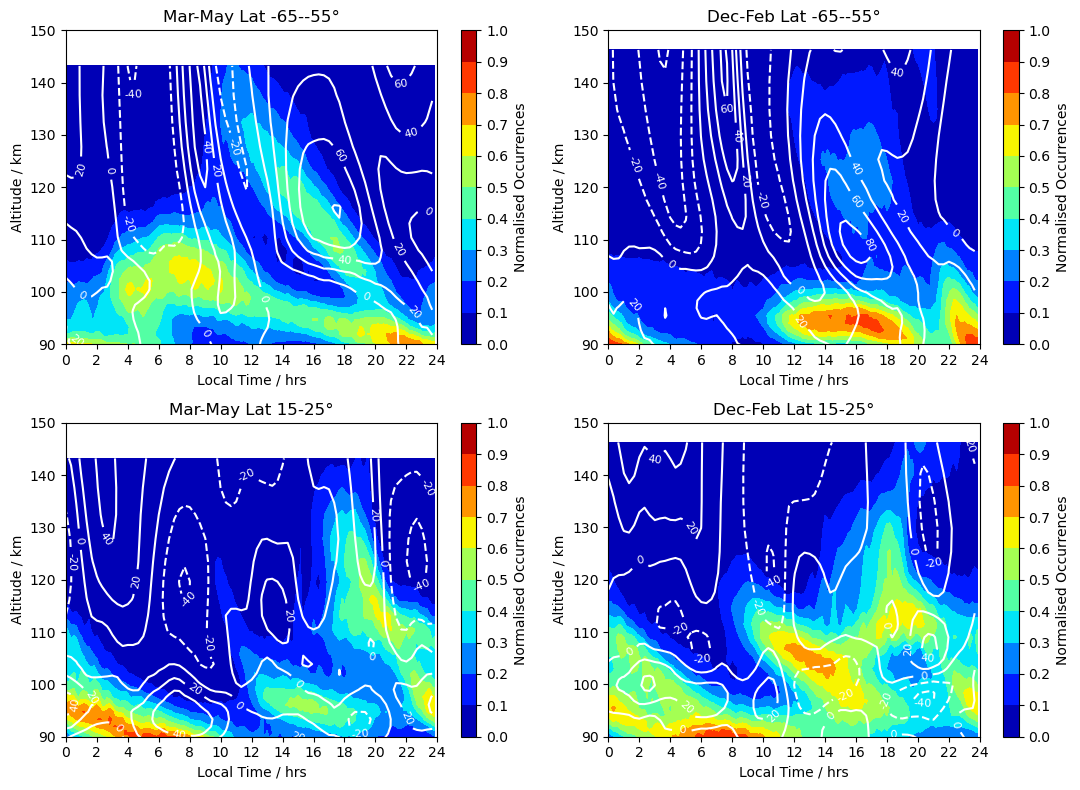

In [131]:
plot_data_U_summer = [plotdata['U_plot_-60_summer'][:, ::2], plotdata['U_plot_20_summer'][:, ::2]]
plot_data_U_winter = [plotdata['U_plot_-60_winter'][:, ::2], plotdata['U_plot_20_winter'][:, ::2]]

plot_data_alt_summer = [plotdata['alt_plot_-60_summer'], plotdata['alt_plot_20_summer']]
plot_data_alt_winter = [plotdata['alt_plot_-60_winter'], plotdata['alt_plot_20_winter']]

plot_data_SpEs_summer = [SpEs_sum_altLT_15_20_norm_cli, SpEs_sum_altLT_65_55_norm_cli]
plot_data_SpEs_winter = [SpEs_win_altLT_15_20_norm_cli, SpEs_win_altLT_65_55_norm_cli]

vmin_waccm = 0
vmax_waccm = 1  
nolevs_waccm = 11  

vmin_u = -80
vmax_u = 80
no_levels_u = 9

local_times = np.linspace(0, 24, 144, endpoint=False)
local_times_downsampled = local_times[::2]

latitude_slices = [(-65, -55), (15, 25)]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(11, 8)) 

for i, ax_row in enumerate(axes):
    lat_start, lat_end = latitude_slices[i]

    ax_s = axes[i, 0]
    contour_waccm_sum = ax_s.contourf(local_times, altavg_sl_sum_cli, plot_data_SpEs_summer[i], cmap='jet',
                                       levels=np.linspace(vmin_waccm, vmax_waccm, nolevs_waccm), vmin=vmin_waccm, vmax=vmax_waccm)
    
    contour_U_lines_sum = ax_s.contour(local_times_downsampled, altavg_sl_sum_cli, plot_data_U_summer[i], colors='white',
                                       levels=np.linspace(vmin_u, vmax_u, no_levels_u))
    
    ax_s.clabel(contour_U_lines_sum, fmt='%2.0f', colors='white', fontsize=8)

    cbar_waccm = fig.colorbar(contour_waccm_sum, ax=ax_s, orientation='vertical', ticks=np.linspace(vmin_waccm, vmax_waccm, nolevs_waccm))
    cbar_waccm.set_label(r'Normalised Occurrences')

    ax_s.set_ylim(90, 150)
    ax_s.set_xlabel('Local Time / hrs')
    ax_s.set_ylabel('Altitude / km')
    ax_s.set_title(f'Mar-May Lat {lat_start}-{lat_end}\u00b0')
    ax_s.set_xticks(np.linspace(0, 24, 13))

    
    
    ax_w = axes[i, 1]
    contour_waccm_win = ax_w.contourf(local_times, altavg_sl_win_cli, plot_data_SpEs_winter[i], cmap='jet',
                                       levels=np.linspace(vmin_waccm, vmax_waccm, nolevs_waccm), vmin=vmin_waccm, vmax=vmax_waccm)
    
    contour_U_lines_win = ax_w.contour(local_times_downsampled, altavg_sl_win_cli, plot_data_U_winter[i], colors='white',
                                       levels=np.linspace(vmin_u, vmax_u, no_levels_u))
    
    ax_w.clabel(contour_U_lines_win, fmt='%2.0f', colors='white', fontsize=8)

    cbar_waccm = fig.colorbar(contour_waccm_win, ax=ax_w, orientation='vertical', ticks=np.linspace(vmin_waccm, vmax_waccm, nolevs_waccm))
    cbar_waccm.set_label(r'Normalised Occurrences')
    
    ax_w.set_ylim(90, 150)
    ax_w.set_xlabel('Local Time / hrs')
    ax_w.set_ylabel('Altitude / km')
    ax_w.set_title(f'Dec-Feb Lat {lat_start}-{lat_end}\u00b0')
    ax_w.set_xticks(np.linspace(0, 24, 13))

plt.tight_layout()

# figname = f'{run_name}_Norm_Nocc_U_altLT_lats_seasons.png'
# plt.savefig('Figures/Wuhu_IonTr_run/Winds/' + str(figname), dpi=400, bbox_inches='tight')

plt.show()



In [114]:
# Open/create dataset for seasons, selecting only UT=00:00 each day

ds_months_sets = [['03', '04', '05'] , ['12', '01', '02']]
Monthstr_sets = [['Mar', 'Apr', 'May'] , ['Dec', 'Jan', 'Feb']]
season_set = ['summer', 'winter']

plotdata = {}

for season_idx, months in enumerate(ds_months_sets):
    season_name = season_set[season_idx]
    Monthstr = Monthstr_sets[season_idx]
    
    file_paths = []
    for month in months:
        pattern = f'/resstore/b0243/Data/Sporadic_E/Solar_Med/archive_yr2000/ACP_CESM213_FX2000_f19_f19_mg16_Na_Fe_Mg_iontransport.cam.h2.0001-{month}-*.nc'
        # Use glob to get all files matching the pattern
        file_paths.extend(glob.glob(pattern))
    
    ds = xr.open_mfdataset(file_paths, combine='by_coords')
    
    # Select only UT00:00 time steps
    ds = ds.isel(time=slice(None, None, 24))
    
    #----------------------------------------------------

    lon = ds['lon']
    lat = ds['lat']
    geopH = ds['Z3'] / 1000  # m -> km
    temp = ds['T']
    U = ds['U']
    
    Re = 6378  # Earth radius in km
    alt = (geopH * Re) / (Re - geopH)
    altav = alt.mean(dim='time')
    
    Uav = U.mean(dim='time')
    Tav = temp.mean(dim='time')
    
    alt_min, alt_max = 90, 155  # km
    
    #----------------------------------------------------
    # Calculate local time offset in hours (assuming 15 degrees = 1 hour difference)
    local_time_offset = lon / 15.0  

    # UT hour
    snapshot_utc_time = 0  # hours

    # Convert UTC time (12:00) to local time for each longitude
    local_times = (snapshot_utc_time + local_time_offset) % 24
    #----------------------------------------------------

    for lat_val in [-60, 20]:
        lat_idx = np.abs(lat - lat_val).argmin()
        
        altll = altav.sel(lat=lat[lat_idx]).mean(dim='lon')
        
        # alt_min_idx = np.abs(altll - alt_min).argmin().values
        # alt_max_idx = np.abs(altll - alt_max).argmin().values
        
        alt_min_idx = 60   
        alt_max_idx = 38 
        
        U_plot = Uav.sel(lat=lat[lat_idx]).isel(lev=slice(alt_max_idx, alt_min_idx + 1))
        T_plot = Tav.sel(lat=lat[lat_idx]).isel(lev=slice(alt_max_idx, alt_min_idx + 1))
        alt_plot = altll.isel(lev=slice(alt_max_idx, alt_min_idx + 1))
        
        plotdata[f'U_plot_{lat_val}_{season_name}'] = U_plot
        plotdata[f'T_plot_{lat_val}_{season_name}'] = T_plot
        plotdata[f'alt_plot_{lat_val}_{season_name}'] = alt_plot

print('done')
print(plotdata.keys())  # Check keys in the dictionary

done
dict_keys(['U_plot_-60_summer', 'T_plot_-60_summer', 'alt_plot_-60_summer', 'U_plot_20_summer', 'T_plot_20_summer', 'alt_plot_20_summer', 'U_plot_-60_winter', 'T_plot_-60_winter', 'alt_plot_-60_winter', 'U_plot_20_winter', 'T_plot_20_winter', 'alt_plot_20_winter'])


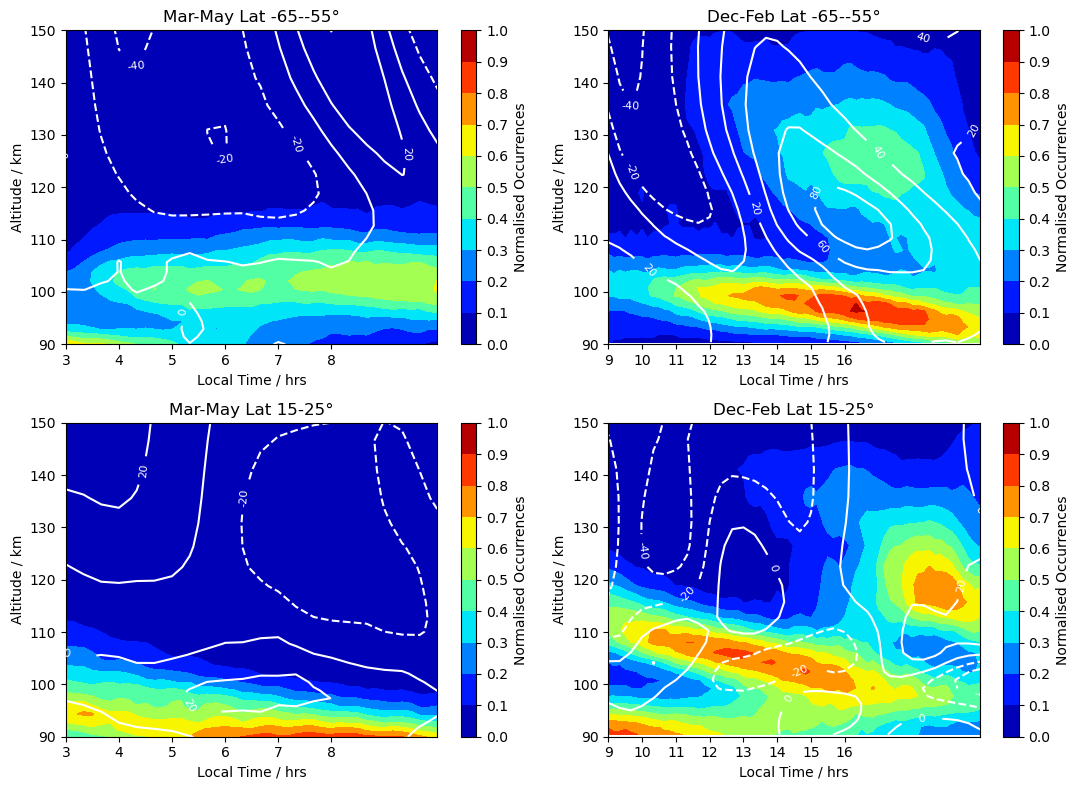

In [136]:
plot_data_U_summer = [plotdata['U_plot_-60_summer'][:, ::2], plotdata['U_plot_20_summer'][:, ::2]]
plot_data_U_winter = [plotdata['U_plot_-60_winter'][:, ::2], plotdata['U_plot_20_winter'][:, ::2]]

plot_data_alt_summer = [plotdata['alt_plot_-60_summer'], plotdata['alt_plot_20_summer']]
plot_data_alt_winter = [plotdata['alt_plot_-60_winter'], plotdata['alt_plot_20_winter']]

plot_data_SpEs_summer = [SpEs_sum_altLT_15_20_norm_Smed, SpEs_sum_altLT_65_55_norm_Smed]
plot_data_SpEs_winter = [SpEs_win_altLT_15_20_norm_Smed, SpEs_win_altLT_65_55_norm_Smed]

vmin_waccm = 0
vmax_waccm = 1  
nolevs_waccm = 11  

vmin_u = -80
vmax_u = 80
no_levels_u = 9

local_times = np.linspace(0, 24, 144, endpoint=False)
local_times_downsampled = local_times[::2]

latitude_slices = [(-65, -55), (15, 25)]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(11, 8)) 

for i, ax_row in enumerate(axes):
    lat_start, lat_end = latitude_slices[i]

    ax_s = axes[i, 0]
    contour_waccm_sum = ax_s.contourf(local_times, altavg_sl_sum_Smed, plot_data_SpEs_summer[i], cmap='jet',
                                       levels=np.linspace(vmin_waccm, vmax_waccm, nolevs_waccm), vmin=vmin_waccm, vmax=vmax_waccm)
    
    contour_U_lines_sum = ax_s.contour(local_times_downsampled, altavg_sl_sum_Smed, plot_data_U_summer[i], colors='white',
                                       levels=np.linspace(vmin_u, vmax_u, no_levels_u))
    
    ax_s.clabel(contour_U_lines_sum, fmt='%2.0f', colors='white', fontsize=8)

    cbar_waccm = fig.colorbar(contour_waccm_sum, ax=ax_s, orientation='vertical', ticks=np.linspace(vmin_waccm, vmax_waccm, nolevs_waccm))
    cbar_waccm.set_label(r'Normalised Occurrences')

    ax_s.set_ylim(90, 150)
    ax_s.set_xlabel('Local Time / hrs')
    ax_s.set_ylabel('Altitude / km')
    ax_s.set_title(f'Mar-May Lat {lat_start}-{lat_end}\u00b0')
    ax_s.set_xticks(np.linspace(0, 24, 13))

    
    
    ax_w = axes[i, 1]
    contour_waccm_win = ax_w.contourf(local_times, altavg_sl_win_Smed, plot_data_SpEs_winter[i], cmap='jet',
                                       levels=np.linspace(vmin_waccm, vmax_waccm, nolevs_waccm), vmin=vmin_waccm, vmax=vmax_waccm)
    
    contour_U_lines_win = ax_w.contour(local_times_downsampled, altavg_sl_win_Smed, plot_data_U_winter[i], colors='white',
                                       levels=np.linspace(vmin_u, vmax_u, no_levels_u))
    
    ax_w.clabel(contour_U_lines_win, fmt='%2.0f', colors='white', fontsize=8)

    cbar_waccm = fig.colorbar(contour_waccm_win, ax=ax_w, orientation='vertical', ticks=np.linspace(vmin_waccm, vmax_waccm, nolevs_waccm))
    cbar_waccm.set_label(r'Normalised Occurrences')
    
    ax_w.set_ylim(90, 150)
    ax_w.set_xlabel('Local Time / hrs')
    ax_w.set_ylabel('Altitude / km')
    ax_w.set_title(f'Dec-Feb Lat {lat_start}-{lat_end}\u00b0')
    ax_w.set_xticks(np.linspace(0, 24, 13))

for i, ax_row in enumerate(axes):
    axes[i, 0].set_xlim(4, 10)
    axes[i, 1].set_xlim(14, 20)

    axes[i, 0].set_xticks(np.arange(3, 9, 1))  # Summer: 10-16 hours
    axes[i, 1].set_xticks(np.arange(9, 17, 1))  # Winter: 14-20 hours


plt.tight_layout()

# figname = f'{run_name}_Norm_Nocc_U_altLT_lats_seasons.png'
# plt.savefig('Figures/Wuhu_IonTr_run/Winds/' + str(figname), dpi=400, bbox_inches='tight')

plt.show()



done


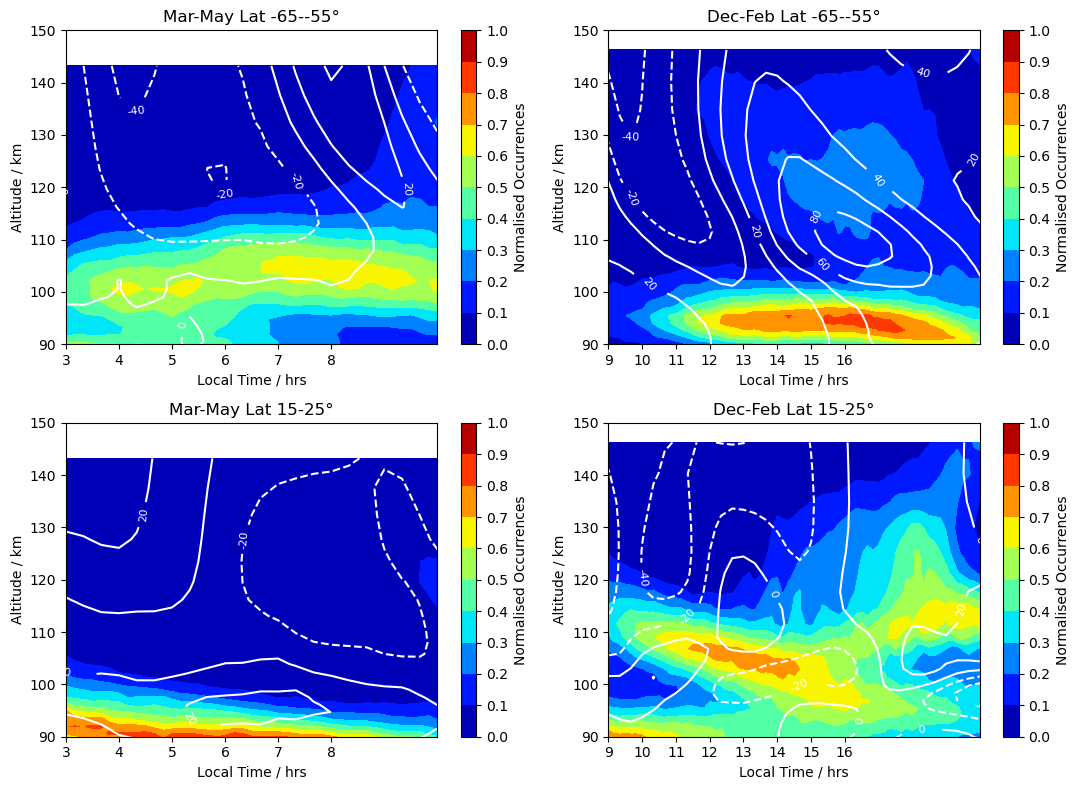

In [135]:
# Open/create dataset for seasons, selecting only UT=00:00 each day
ds_months_sets = [['03', '04', '05'], ['12', '01', '02']]
Monthstr_sets = [['Mar', 'Apr', 'May'], ['Dec', 'Jan', 'Feb']]
season_set = ['summer', 'winter']
# run_name = 'Wuhu_IonTr_run'
plotdata = {}

# Define paths for updated data
main_path = '/resstore/b0243/Data/Sporadic_E/FX2100f19f19mg16NaFeMgiontransport_OUTPUT/hist/FX2100f19f19mg16NaFeMgiontransport.cam.h2.2100-{month}-*.nc'
janfeb_path = '/resstore/b0243/Data/Sporadic_E/FX2101f19f19mg16NaFeMgiontransport_OUTPUT/atm/hist/FX2101f19f19mg16NaFeMgiontransport.cam.h2.2100-{month}-*.nc'

for season_idx, months in enumerate(ds_months_sets):
    season_name = season_set[season_idx]
    Monthstr = Monthstr_sets[season_idx]
    
    file_paths = []
    for month in months:
        # Use the janfeb_path for January and February, otherwise use the main path
        if month in ['01', '02']:
            pattern = janfeb_path.format(month=month)
        else:
            pattern = main_path.format(month=month)
            
        # Use glob to get all files matching the pattern
        file_paths.extend(glob.glob(pattern))
    
    ds = xr.open_mfdataset(file_paths, combine='by_coords')
    
    # Select only UT00:00 time steps
    ds = ds.isel(time=slice(None, None, 24))
    
    #----------------------------------------------------
    lon = ds['lon']
    lat = ds['lat']
    geopH = ds['Z3'] / 1000  # m -> km
    temp = ds['T']
    U = ds['U']
    
    Re = 6378  # Earth radius in km
    alt = (geopH * Re) / (Re - geopH)
    altav = alt.mean(dim='time')
    
    Uav = U.mean(dim='time')
    Tav = temp.mean(dim='time')
    
    alt_min, alt_max = 90, 155  # km
    
    #----------------------------------------------------
    # Calculate local time offset in hours (assuming 15 degrees = 1 hour difference)
    local_time_offset = lon / 15.0  
    # UT hour
    snapshot_utc_time = 0  # hours
    # Convert UTC time (12:00) to local time for each longitude
    local_times = (snapshot_utc_time + local_time_offset) % 24
    #----------------------------------------------------
    for lat_val in [-60, 20]:
        lat_idx = np.abs(lat - lat_val).argmin()
        
        altll = altav.sel(lat=lat[lat_idx]).mean(dim='lon')
        
        # alt_min_idx = np.abs(altll - alt_min).argmin().values
        # alt_max_idx = np.abs(altll - alt_max).argmin().values
        
        alt_min_idx = 60   
        alt_max_idx = 38 
        
        U_plot = Uav.sel(lat=lat[lat_idx]).isel(lev=slice(alt_max_idx, alt_min_idx + 1))
        T_plot = Tav.sel(lat=lat[lat_idx]).isel(lev=slice(alt_max_idx, alt_min_idx + 1))
        alt_plot = altll.isel(lev=slice(alt_max_idx, alt_min_idx + 1))
        
        plotdata[f'U_plot_{lat_val}_{season_name}'] = U_plot
        plotdata[f'T_plot_{lat_val}_{season_name}'] = T_plot
        plotdata[f'alt_plot_{lat_val}_{season_name}'] = alt_plot
        
print('done')

plot_data_U_summer = [plotdata['U_plot_-60_summer'][:, ::2], plotdata['U_plot_20_summer'][:, ::2]]
plot_data_U_winter = [plotdata['U_plot_-60_winter'][:, ::2], plotdata['U_plot_20_winter'][:, ::2]]

plot_data_alt_summer = [plotdata['alt_plot_-60_summer'], plotdata['alt_plot_20_summer']]
plot_data_alt_winter = [plotdata['alt_plot_-60_winter'], plotdata['alt_plot_20_winter']]
plot_data_SpEs_summer = [SpEs_sum_altLT_15_20_norm_cli, SpEs_sum_altLT_65_55_norm_cli]
plot_data_SpEs_winter = [SpEs_win_altLT_15_20_norm_cli, SpEs_win_altLT_65_55_norm_cli]

vmin_waccm = 0
vmax_waccm = 1  
nolevs_waccm = 11  
vmin_u = -80
vmax_u = 80
no_levels_u = 9

local_times = np.linspace(0, 24, 144, endpoint=False)
local_times_downsampled = local_times[::2]
latitude_slices = [(-65, -55), (15, 25)]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(11, 8)) 

for i, ax_row in enumerate(axes):
    lat_start, lat_end = latitude_slices[i]
    
    ax_s = axes[i, 0]
    contour_waccm_sum = ax_s.contourf(local_times, altavg_sl_sum_cli, plot_data_SpEs_summer[i], cmap='jet',
                                       levels=np.linspace(vmin_waccm, vmax_waccm, nolevs_waccm), vmin=vmin_waccm, vmax=vmax_waccm)
    
    contour_U_lines_sum = ax_s.contour(local_times_downsampled, altavg_sl_sum_cli, plot_data_U_summer[i], colors='white',
                                       levels=np.linspace(vmin_u, vmax_u, no_levels_u))
    
    ax_s.clabel(contour_U_lines_sum, fmt='%2.0f', colors='white', fontsize=8)
    cbar_waccm = fig.colorbar(contour_waccm_sum, ax=ax_s, orientation='vertical', ticks=np.linspace(vmin_waccm, vmax_waccm, nolevs_waccm))
    cbar_waccm.set_label(r'Normalised Occurrences')
    ax_s.set_ylim(90, 150)
    ax_s.set_xlabel('Local Time / hrs')
    ax_s.set_ylabel('Altitude / km')
    ax_s.set_title(f'Mar-May Lat {lat_start}-{lat_end}\u00b0')
    ax_s.set_xticks(np.linspace(0, 24, 13))
    
    
    ax_w = axes[i, 1]
    contour_waccm_win = ax_w.contourf(local_times, altavg_sl_win_cli, plot_data_SpEs_winter[i], cmap='jet',
                                       levels=np.linspace(vmin_waccm, vmax_waccm, nolevs_waccm), vmin=vmin_waccm, vmax=vmax_waccm)
    
    contour_U_lines_win = ax_w.contour(local_times_downsampled, altavg_sl_win_cli, plot_data_U_winter[i], colors='white',
                                       levels=np.linspace(vmin_u, vmax_u, no_levels_u))
    
    ax_w.clabel(contour_U_lines_win, fmt='%2.0f', colors='white', fontsize=8)
    cbar_waccm = fig.colorbar(contour_waccm_win, ax=ax_w, orientation='vertical', ticks=np.linspace(vmin_waccm, vmax_waccm, nolevs_waccm))
    cbar_waccm.set_label(r'Normalised Occurrences')
    
    ax_w.set_ylim(90, 150)
    ax_w.set_xlabel('Local Time / hrs')
    ax_w.set_ylabel('Altitude / km')
    ax_w.set_title(f'Dec-Feb Lat {lat_start}-{lat_end}\u00b0')
    ax_w.set_xticks(np.linspace(0, 24, 13))

for i, ax_row in enumerate(axes):
    axes[i, 0].set_xlim(4, 10)
    axes[i, 1].set_xlim(14, 20)

    axes[i, 0].set_xticks(np.arange(3, 9, 1))  # Summer: 10-16 hours
    axes[i, 1].set_xticks(np.arange(9, 17, 1))  # Winter: 14-20 hours

plt.tight_layout()
# figname = f'{run_name}_Norm_Nocc_U_altLT_lats_seasons.png'
# plt.savefig('Figures/Wuhu_IonTr_run/Winds/' + str(figname), dpi=400, bbox_inches='tight')
plt.show()